# ACC Aim 1: Description of Hit Exposure

The purpose of this notebook is to give a briefly explain the calculations behind a statistical description of the hit exposure of University of Tulsa's football team during the 2017 season.

The first step in the process was to compile the data from disperse tables into a single table. For the analysis program that we'll be using, we call this single table a data frame. The answer the proposed questions, we've actually put together three data frames. The first normalizes the number of hits by the number of players playing a given position. This will allow us to answer those questions which seek a "per position" answer. We'll call this first data frame `df_per_position`. The second data frame normalizes the hit data by the total number of active players involved in the given activity. This will allow us to answer the questions that seek an answer "across all positions." The second data frame will be called `df_per_activity`. The third data frame normalizes the data by the duration of the activity in minutes and the number of players participating in that activity. For hits that occurred during a game, the duration is defined by the number of minutes the offense or defense played during the game, depending on the position of the player who was hit. The third data frame will be called `df_per_time`. Snippets of the resulting data frames are shown below for reference.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

%matplotlib inline
plt.style.use('ggplot')

pd.options.display.max_rows = 100

def printmd(string):
    display(Markdown(string))

In [120]:
df_per_position = pd.read_csv('compiled_by_position.csv', index_col=0)
df_per_position.head()

,activity,before_break,date,event,h1,h2,h3,h4,h5,player,type
4361,pre,True,2017-07-31 19:05:00,fall camp practice #1,0.5,0.0,0.0,0.0,0.0,linebacker,camp
4360,pre,True,2017-07-31 19:05:00,fall camp practice #1,1.0,0.0,1.0,0.0,0.0,off guard,camp
4358,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.5,0.0,0.0,0.0,0.0,tight end,camp
4356,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.5,0.0,0.0,0.0,0.0,wide receiver,camp
4359,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,1.0,1.0,0.0,0.0,0.0,off guard,camp


In [121]:
df_per_activity = pd.read_csv('compiled_by_activity.csv', index_col=0)
df_per_activity.head()

,activity,before_break,date,event,h1,h2,h3,h4,h5,player,type
4361,pre,True,2017-07-31 19:05:00,fall camp practice #1,0.100000,0.000000,0.000000,0.0,0.0,linebacker,camp
4360,pre,True,2017-07-31 19:05:00,fall camp practice #1,0.111111,0.000000,0.111111,0.0,0.0,off guard,camp
4358,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.111111,0.000000,0.000000,0.0,0.0,tight end,camp
4356,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.111111,0.000000,0.000000,0.0,0.0,wide receiver,camp
4359,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.111111,0.111111,0.000000,0.0,0.0,off guard,camp


In [122]:
df_per_time = pd.read_csv('compiled_by_time_activity.csv', index_col=0)
df_per_time.head()

,activity,before_break,date,event,h1,h2,h3,h4,h5,player,type
4361,pre,True,2017-07-31 19:05:00,fall camp practice #1,0.005000,0.000000,0.000000,0.0,0.0,linebacker,camp
4360,pre,True,2017-07-31 19:05:00,fall camp practice #1,0.011111,0.000000,0.011111,0.0,0.0,off guard,camp
4358,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.022222,0.000000,0.000000,0.0,0.0,tight end,camp
4356,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.022222,0.000000,0.000000,0.0,0.0,wide receiver,camp
4359,pat/fg,True,2017-07-31 19:10:00,fall camp practice #1,0.022222,0.022222,0.000000,0.0,0.0,off guard,camp


Since many of the questions only ask for answers for "bin 5" hits and "the sum of bins 1-4" hits, we'll add a column to our data frame that is the summation of the bins 1-4. As you'll see in the following analyses, I've also done the analysis on the individual bins for reference.

In [123]:
df_per_position['sum14'] = (df_per_position.h1
                            + df_per_position.h2
                            + df_per_position.h3
                            + df_per_position.h4)

df_per_activity['sum14'] = (df_per_activity.h1
                           + df_per_activity.h2
                           + df_per_activity.h3
                           + df_per_activity.h4)

df_per_time['sum14'] = (df_per_time.h1
                        + df_per_time.h2
                        + df_per_time.h3
                        + df_per_time.h4)

### Question 1: What is the exposure to hits based on player position over all games?

To answer this question, we need two things: 1) hits normalized by player position and 2) the normalize hit data for just the games. We'll gather and show the first few lines of this data below.

In [124]:
games = df_per_position[df_per_position.type == 'game']
games.head()

,activity,before_break,date,event,h1,h2,h3,h4,h5,player,type,sum14
3197,pre,True,2017-08-31 17:50:00,Oklahoma State Game,0.5,0.0,0.0,0.0,0.0,wide receiver,game,0.5
3198,pre,True,2017-08-31 17:50:00,Oklahoma State Game,0.0,0.5,0.0,0.0,0.0,running back,game,0.5
3196,pre,True,2017-08-31 17:55:00,Oklahoma State Game,0.0,0.5,0.0,0.0,0.0,wide receiver,game,0.5
3194,pre,True,2017-08-31 18:00:00,Oklahoma State Game,0.5,0.0,0.0,0.0,0.0,linebacker,game,0.5
3193,pre,True,2017-08-31 18:00:00,Oklahoma State Game,1.0,0.0,0.0,0.0,0.0,def end,game,1.0


Now, we'll group the position normalized game data by game and by player. The grouped data is then summed, resulting in the average number of hits for a given position during the given game. A sampling of the resulting summation is shown. 

In [125]:
avg_hits = games.groupby(['event', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'sum14', 'h5']].sum()
avg_hits.sample(5)

,event,player,h1,h2,h3,h4,sum14,h5
31,Memphis Game,linebacker,5.5,7.0,4.0,0.5,17.0,2.0
46,Navy Game,wide receiver,5.0,4.0,1.0,0.0,10.0,0.0
110,Tulane Game,off tackle,4.5,3.0,5.0,0.5,13.0,0.0
52,New Mexico Game,off tackle,7.0,6.0,1.5,1.0,15.5,0.0
63,Oklahoma State Game,running back,8.5,8.5,8.0,4.0,29.0,2.0


Finally, considering each position, the median value of the average hits is taken. The final results are below.

In [126]:
avg_hits.groupby('player').aggregate(np.median)

,h1,h2,h3,h4,sum14,h5
player,,,,,,
cornerback,3.75,2.75,1.25,0.50,8.00,0.00
def end,8.75,8.25,4.50,2.00,23.75,1.00
def tackle,5.00,4.50,1.75,0.75,12.50,0.00
linebacker,5.75,6.75,4.50,1.50,19.50,1.25
off guard,7.00,4.00,2.00,0.50,15.00,0.00
off tackle,5.50,5.50,2.50,0.25,14.50,0.00
running back,9.50,10.75,8.00,4.50,33.00,2.00
safety,4.50,3.00,2.00,0.50,11.50,0.00
tight end,5.00,4.50,4.00,1.50,15.25,0.25


Here, we're presenting the interquartile and median values as well as box plots for all of the bins plus the sum of bins 1-4. The sum of bins 1-4 has been put on a separate subplot as to not overly compress the individual bin data, but please note the changes in y-axis values.

### Results for Cornerback

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.500,1.875,0.875,0.0,0.0,7.25
Median,3.750,2.750,1.250,0.5,0.0,8.00
75 Percentile,4.625,3.125,2.000,0.5,0.5,9.50


##### Box Plots

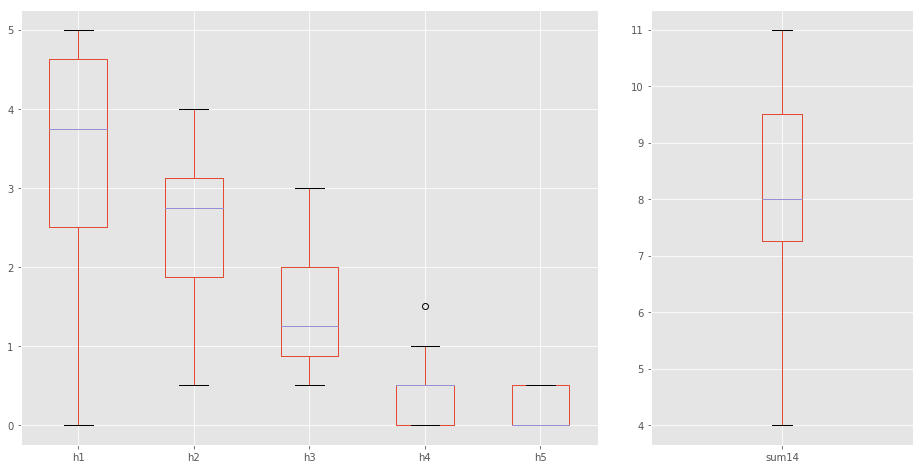

### Results for Def End

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,6.25,7.25,3.875,1.25,0.500,19.500
Median,8.75,8.25,4.500,2.00,1.000,23.750
75 Percentile,9.25,9.50,5.875,2.50,1.625,26.125


##### Box Plots

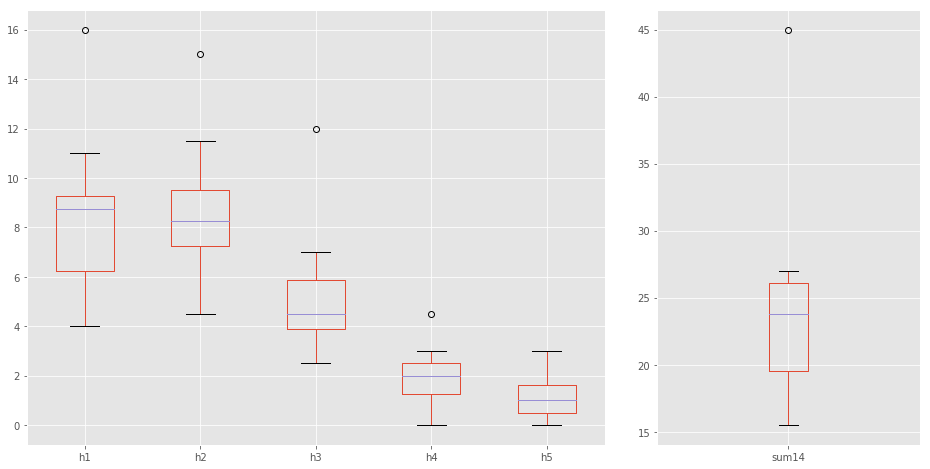

### Results for Def Tackle

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,4.00,2.125,0.375,0.00,0.0,10.125
Median,5.00,4.500,1.750,0.75,0.0,12.500
75 Percentile,8.25,6.250,8.250,1.00,0.0,20.500


##### Box Plots

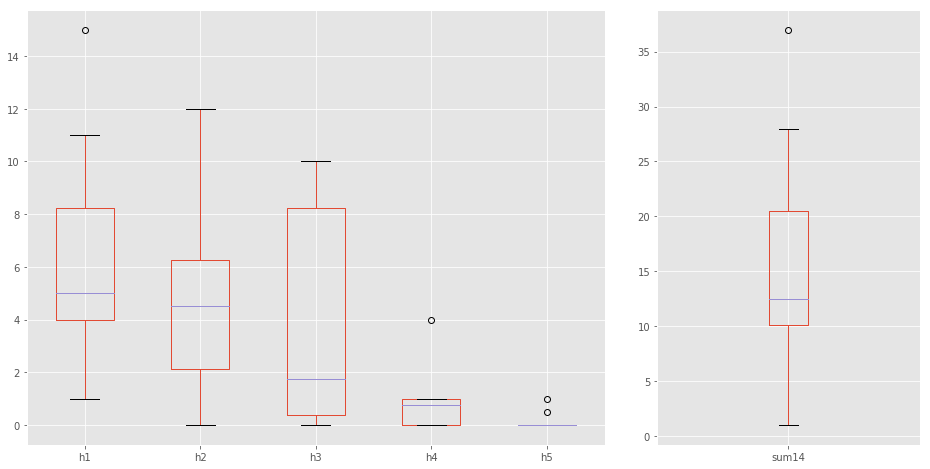

### Results for Linebacker

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,5.25,4.875,3.875,1.000,1.000,16.625
Median,5.75,6.750,4.500,1.500,1.250,19.500
75 Percentile,7.75,7.125,6.500,2.125,1.625,24.000


##### Box Plots

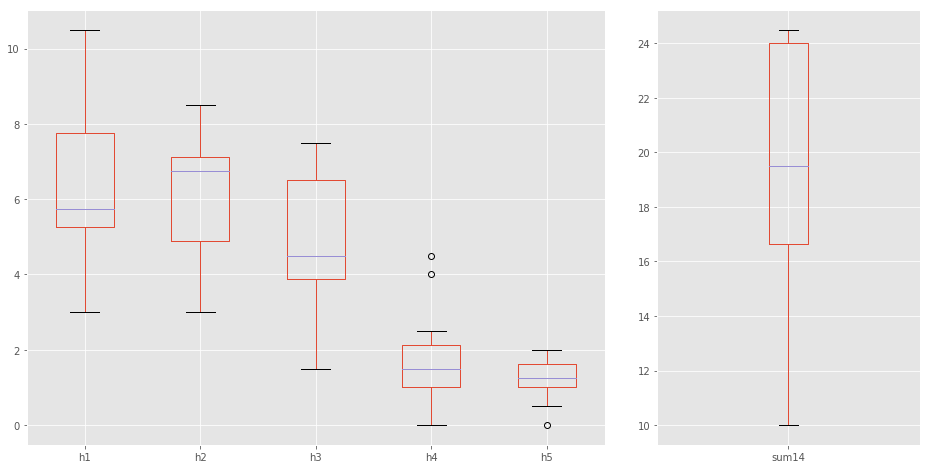

### Results for Off Guard

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,5.000,3.750,1.500,0.0,0.0,10.250
Median,7.000,4.000,2.000,0.5,0.0,15.000
75 Percentile,11.375,7.125,3.875,1.0,0.0,24.875


##### Box Plots

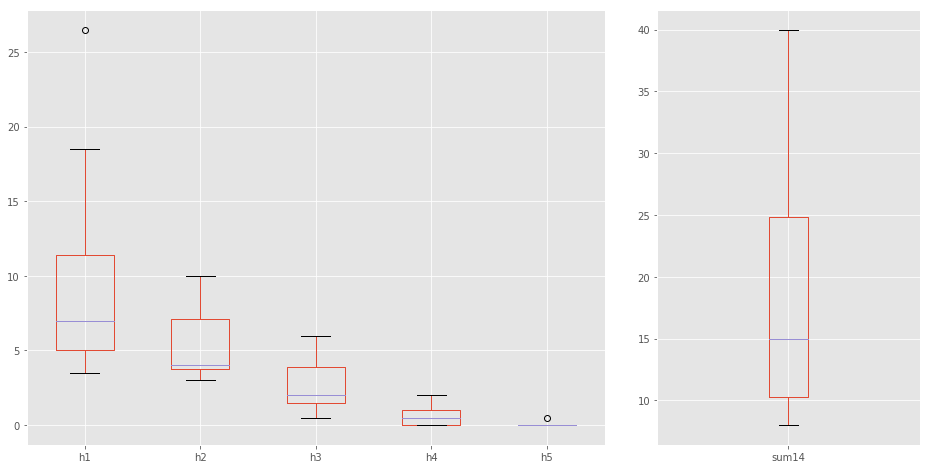

### Results for Off Tackle

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.875,1.75,1.000,0.00,0.0,6.625
Median,5.500,5.50,2.500,0.25,0.0,14.500
75 Percentile,7.500,7.25,3.875,0.50,0.0,20.500


##### Box Plots

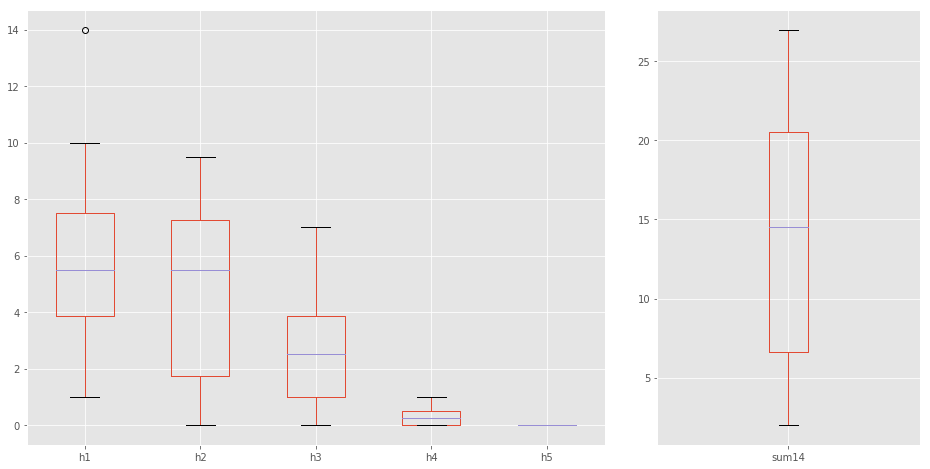

### Results for Running Back

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,8.375,8.375,5.5,1.625,1.0,29.75
Median,9.500,10.750,8.0,4.500,2.0,33.00
75 Percentile,17.250,12.500,13.0,5.250,2.0,47.00


##### Box Plots

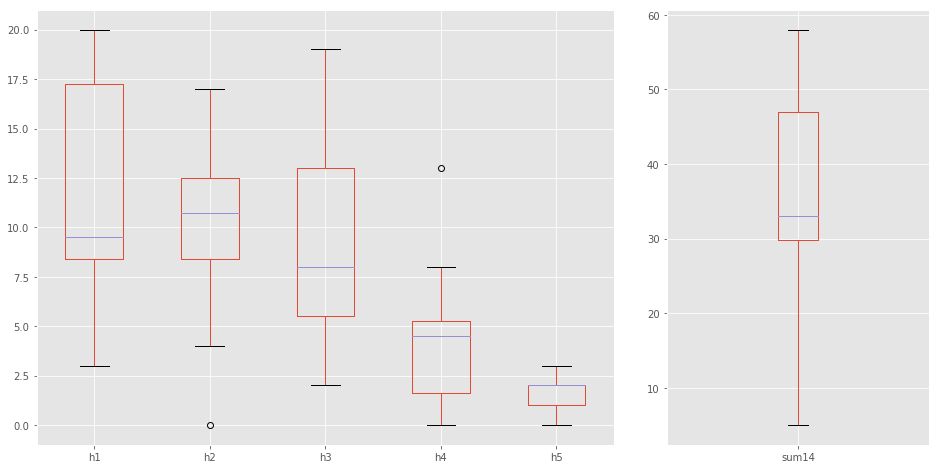

### Results for Safety

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.0,2.0,1.0,0.5,0.0,9.0
Median,4.5,3.0,2.0,0.5,0.0,11.5
75 Percentile,5.5,3.5,5.0,1.0,1.0,12.0


##### Box Plots

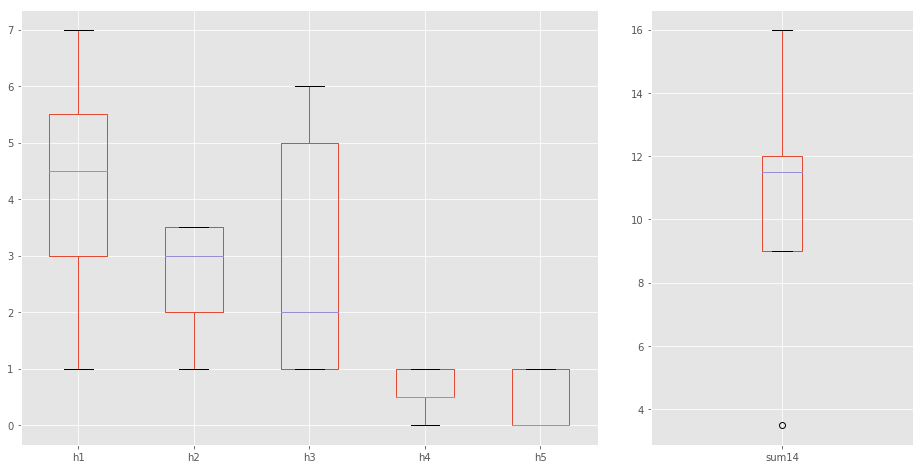

### Results for Tight End

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.375,3.375,2.875,1.000,0.00,11.875
Median,5.000,4.500,4.000,1.500,0.25,15.250
75 Percentile,6.625,5.375,5.875,2.625,1.00,24.000


##### Box Plots

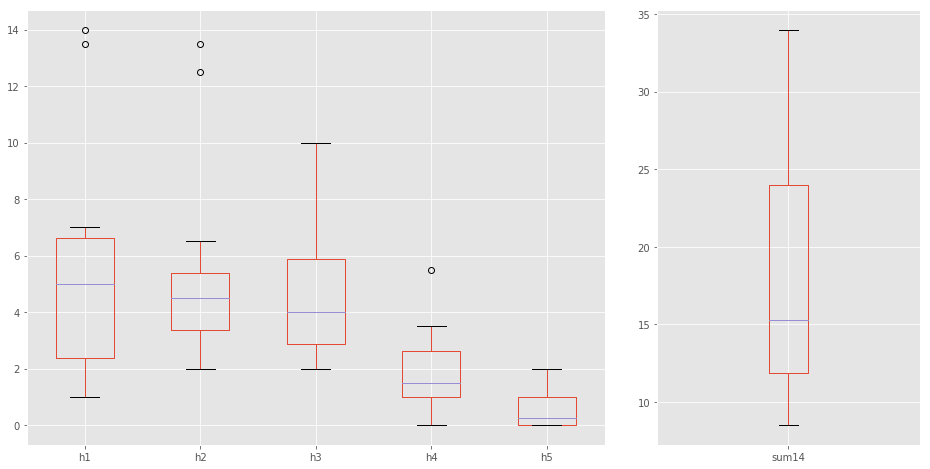

### Results for Wide Receiver

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.375,1.000,0.5,0.0,0.000,4.750
Median,5.000,3.250,1.0,0.0,0.000,9.250
75 Percentile,5.875,4.125,1.0,0.5,0.125,11.125


##### Box Plots

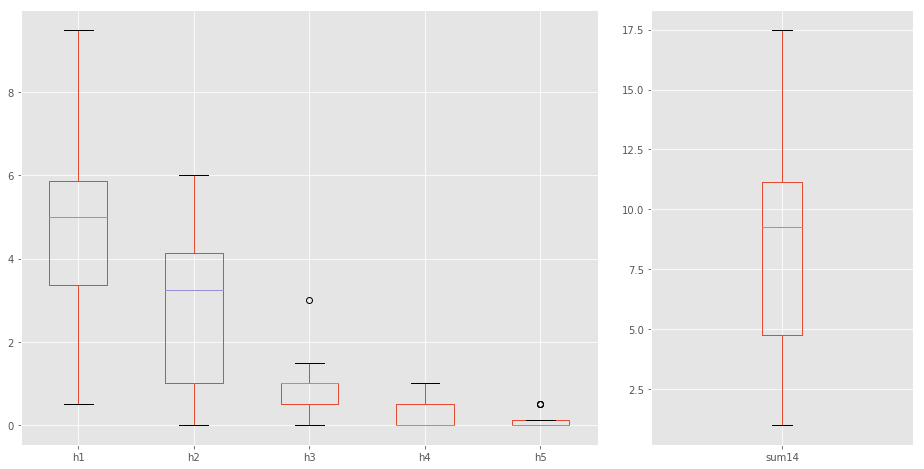

In [127]:
grps = (games.groupby(['event', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
             .sum()
             .groupby('player'))
for name, grp in grps:
    printmd('### Results for {}'.format(name.title()))
    # Give the median and interquartile ranges
    printmd('##### Interquartile and Median Values')
    dat = grp.quantile([0.25, 0.50, 0.75])
    dat.index = pd.Index(['25 Percentile', 'Median', '75 Percentile'])
    display(dat)
    printmd('##### Box Plots')
    fig = plt.figure(figsize=(16, 8))
    plt.subplot2grid((1,3), (0,0), colspan=2)
    grp[['h1', 'h2', 'h3', 'h4', 'h5']].boxplot()
    plt.subplot2grid((1,3), (0,2))
    grp[['sum14']].boxplot()
    plt.show()

### Question 2: What is the exposure to hits based on player position over all practices?

The code below does the same as for games (as above), but this time with the practice data. Intermediate steps aren't shown. The final results are in the table and plots below.

In [128]:
practices = df_per_position[df_per_position.type != 'game']
(practices.groupby(['event', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
          .sum()
          .groupby('player')
          .aggregate(np.median))

,h1,h2,h3,h4,h5,sum14
player,,,,,,
cornerback,1.00,0.50,0.0,0.0,0.0,2.00
def end,2.50,2.00,1.0,0.0,0.0,6.00
def tackle,2.00,0.75,0.0,0.0,0.0,3.00
linebacker,1.50,1.50,0.5,0.0,0.0,4.50
off guard,4.50,1.50,0.0,0.0,0.0,6.25
off tackle,1.75,0.50,0.0,0.0,0.0,2.75
running back,1.50,1.00,0.5,0.0,0.0,3.00
safety,0.75,0.50,0.5,0.0,0.0,2.00
tight end,2.50,2.50,2.0,0.5,0.0,9.50


### Results for Cornerback

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.500,0.125,0.0,0.0,0.0,1.0
Median,1.000,0.500,0.0,0.0,0.0,2.0
75 Percentile,2.375,1.500,0.5,0.0,0.0,4.0


##### Box Plots

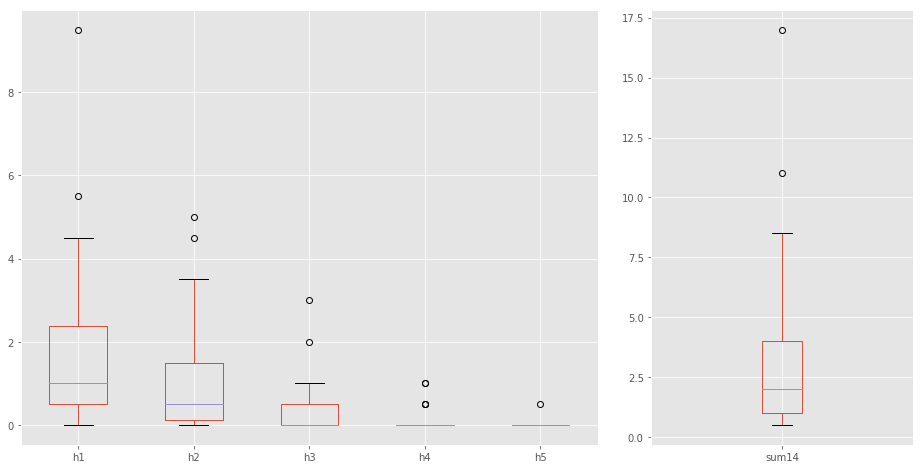

### Results for Def End

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,1.0,0.50,0.0,0.0,3.75
Median,2.5,2.0,1.00,0.0,0.0,6.00
75 Percentile,4.0,4.0,2.25,1.0,0.5,9.00


##### Box Plots

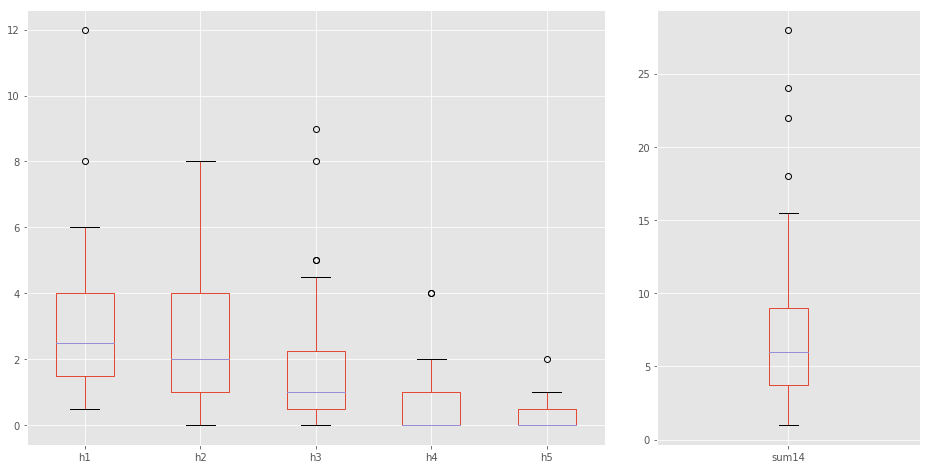

### Results for Def Tackle

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.000,0.000,0.0,0.0,0.0,2.5
Median,2.000,0.750,0.0,0.0,0.0,3.0
75 Percentile,3.875,1.875,0.5,0.0,0.0,5.0


##### Box Plots

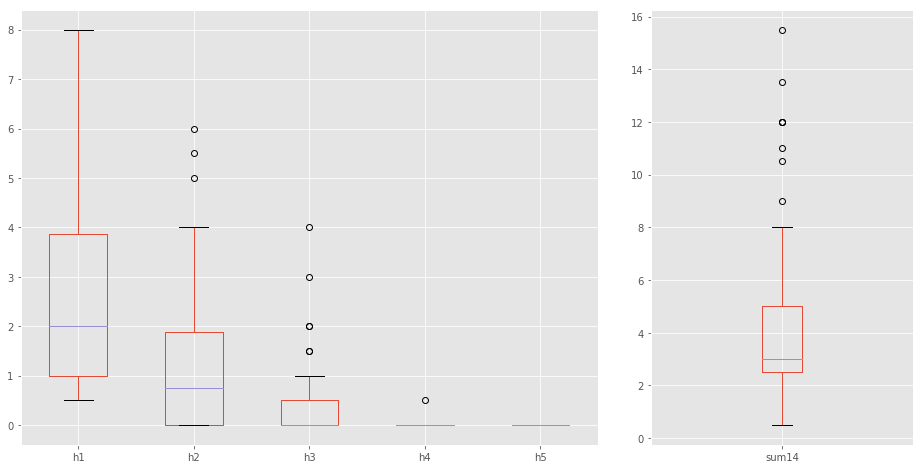

### Results for Linebacker

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.5,0.0,0.0,0.0,2.00
Median,1.5,1.5,0.5,0.0,0.0,4.50
75 Percentile,3.0,2.5,1.0,0.0,0.0,7.25


##### Box Plots

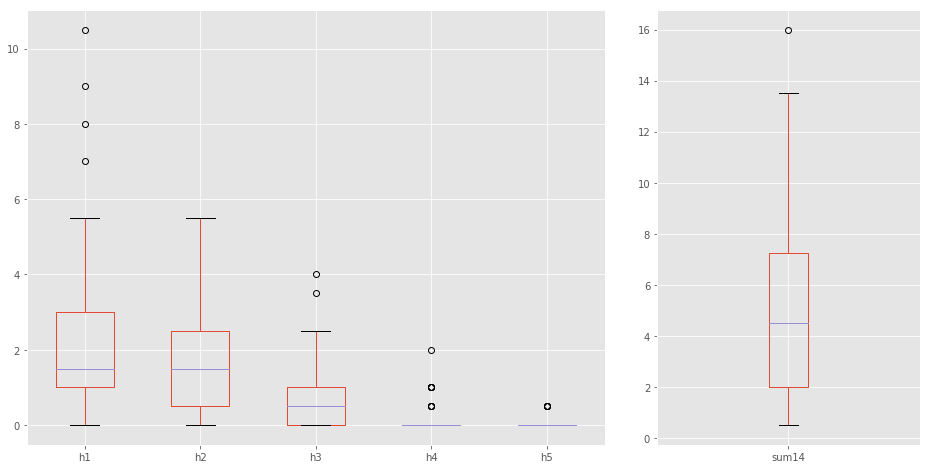

### Results for Off Guard

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.0,0.625,0.000,0.0,0.0,2.875
Median,4.5,1.500,0.000,0.0,0.0,6.250
75 Percentile,6.0,2.875,0.875,0.0,0.0,10.500


##### Box Plots

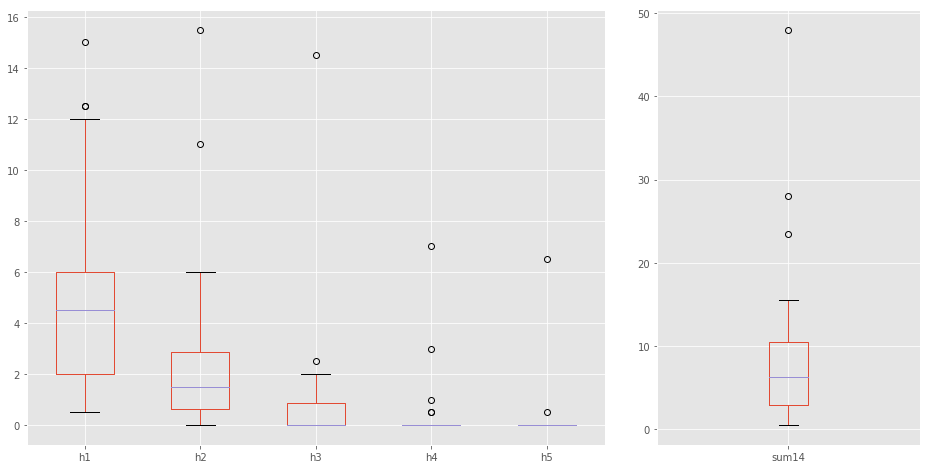

### Results for Off Tackle

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.00,0.0,0.000,0.0,0.0,1.125
Median,1.75,0.5,0.000,0.0,0.0,2.750
75 Percentile,3.00,1.5,0.375,0.0,0.0,5.000


##### Box Plots

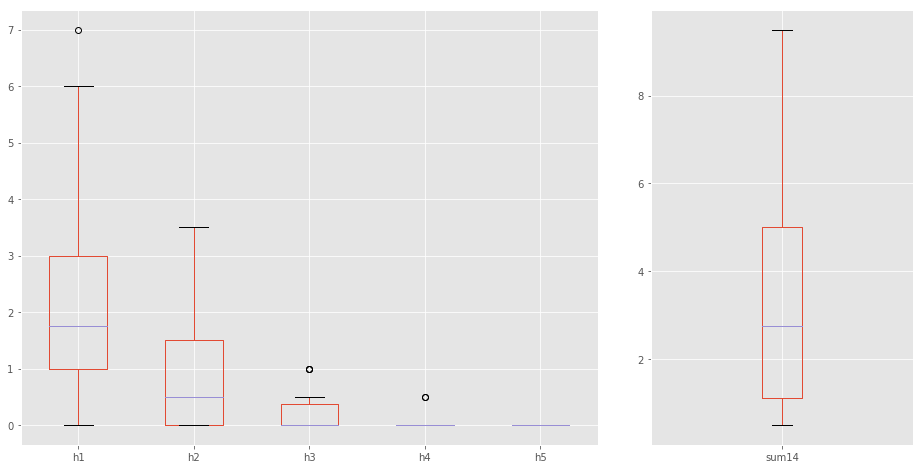

### Results for Running Back

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.0,0.0,0.0,0.0,1.125
Median,1.5,1.0,0.5,0.0,0.0,3.000
75 Percentile,2.0,1.5,1.0,0.0,0.0,4.875


##### Box Plots

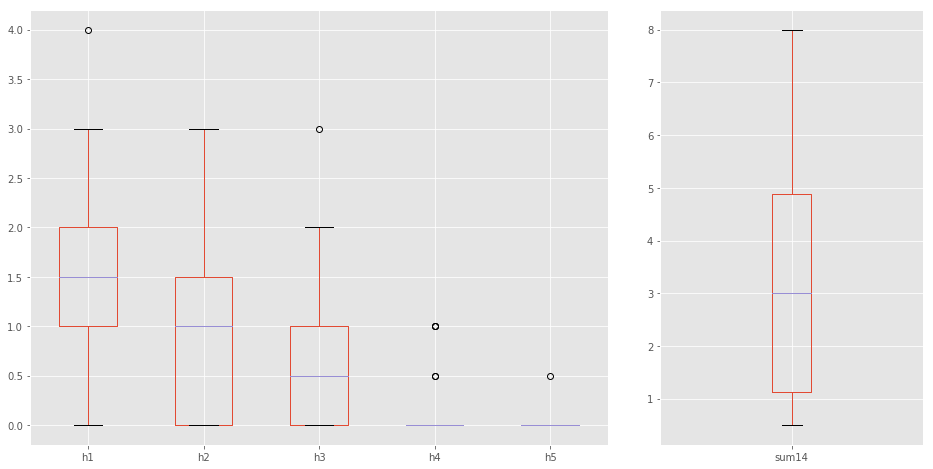

### Results for Safety

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.50,0.375,0.0,0.0,0.0,1.0
Median,0.75,0.500,0.5,0.0,0.0,2.0
75 Percentile,2.00,1.125,1.0,0.0,0.0,4.0


##### Box Plots

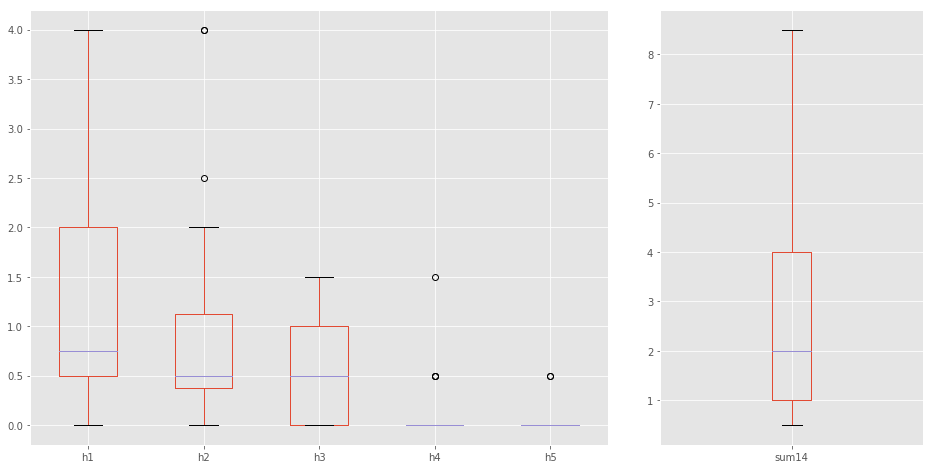

### Results for Tight End

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,1.0,0.5,0.0,0.0,4.0
Median,2.5,2.5,2.0,0.5,0.0,9.5
75 Percentile,4.5,4.0,3.0,1.0,0.5,11.5


##### Box Plots

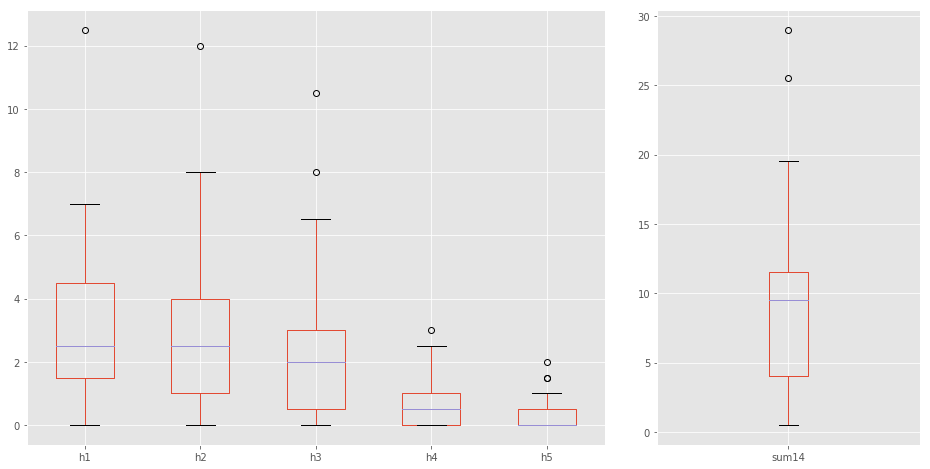

### Results for Wide Receiver

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.5,0.0,0.0,0.0,0.0,1.0
Median,1.0,0.5,0.0,0.0,0.0,1.5
75 Percentile,2.0,1.0,0.5,0.0,0.0,3.5


##### Box Plots

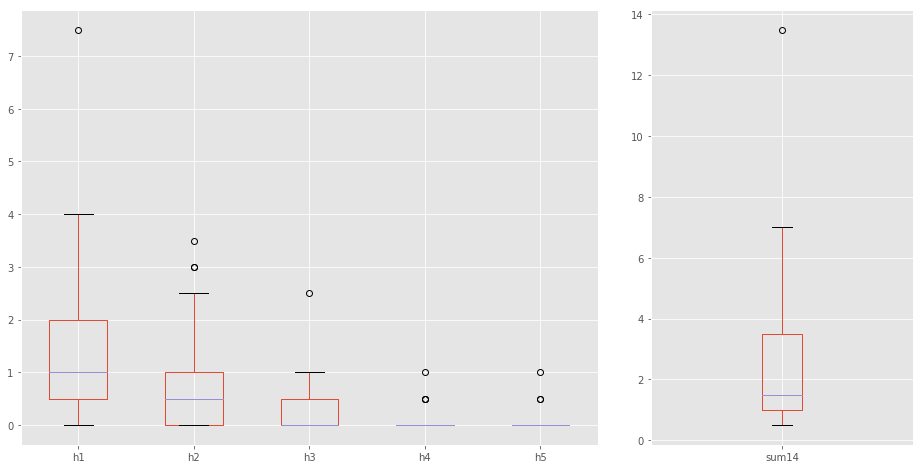

In [129]:
grps = (practices.groupby(['event', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
                 .sum()
                 .groupby('player'))
for name, grp in grps:
    printmd('### Results for {}'.format(name.title()))
    # Give the median and interquartile ranges
    printmd('##### Interquartile and Median Values')
    dat = grp.quantile([0.25, 0.50, 0.75])
    dat.index = pd.Index(['25 Percentile', 'Median', '75 Percentile'])
    display(dat)
    printmd('##### Box Plots')
    fig = plt.figure(figsize=(16, 8))
    plt.subplot2grid((1,3), (0,0), colspan=2)
    grp[['h1', 'h2', 'h3', 'h4', 'h5']].boxplot()
    plt.subplot2grid((1,3), (0,2))
    grp[['sum14']].boxplot()
    plt.show()

### Question 3: What is the exposure to hits based on player position by practice type?

Again, the procedure is similar. First, we'll used the data that is normalized by the number of players in a given position and only include practice data.

Next, we'll group the data by practice type (tuesday, wednedsay, camp, etc) and player position then sum the hit data. As before, a sample of the data is below.

In [130]:
hits_by_type = (practices
                .groupby(['event', 'type', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
                .sum())
hits_by_type.sample(5)

,event,type,player,h1,h2,h3,h4,h5,sum14
362,fall camp practice #3,camp,def end,3.0,6.0,4.0,1.0,0.0,14.0
120,New Mexico #1,tues,off tackle,3.5,2.0,0.5,0.0,0.0,6.0
232,S Methodist #2,wed/thurs,cornerback,1.0,3.0,0.0,0.0,0.0,4.0
54,Louisiana #1,tues,safety,2.0,0.5,0.5,0.0,0.0,3.0
85,Memphis #1,tues,wide receiver,0.5,1.0,0.0,0.0,0.0,1.5


This time, we'll group the data by player and practice type before taking the median value of all the practices.

In [131]:
hits_by_type.groupby(['player', 'type']).aggregate(np.median)

h1    h2    h3   h4   h5  sum14
player        type                                        
cornerback    camp       1.25  0.50  0.00  0.0  0.0   2.00
              scrimmage  1.00  0.00  0.00  0.0  0.0   1.00
              thurs      2.50  0.50  0.50  0.0  0.0   3.25
              tues       0.50  1.00  0.00  0.0  0.0   2.50
              wed        0.75  0.50  0.00  0.0  0.0   2.25
              wed/thurs  1.00  1.00  0.00  0.0  0.0   2.50
def end       camp       3.50  4.00  1.50  0.5  0.0   7.50
              scrimmage  1.00  0.00  0.00  0.0  0.0   1.00
              thurs      1.50  0.50  0.25  0.0  0.0   2.25
              tues       2.50  2.50  0.50  0.0  0.5   5.00
              wed        3.50  2.00  1.00  0.5  0.0   6.50
              wed/thurs  2.00  2.50  1.00  0.0  0.0   6.00
def tackle    camp       2.50  0.50  0.00  0.0  0.0   3.00
              scrimmage  1.00  1.50  0.50  0.0  0.0   3.00
              thurs      1.00  0.50  0.00  0.0  0.0   2.00
              tues       3.00  1.00  0.00  0.0  0.0   3.50
              wed        1.00  1.00  0.00  0.0  0.0   2.50
              wed/thurs  2.00  2.00  0.00  0.0  0.0   4.00
linebacker    camp       3.00  2.50  1.00  0.0  0.0   7.00
              scrimmage  1.50  1.00  0.50  0.0  0.0   3.00
              thurs      1.00  0.50  0.00  0.0  0.0   1.25
              tues       3.00  1.50  0.50  0.0  0.0   5.50
              wed        1.50  2.00  1.00  0.0  0.0   5.00
              wed/thurs  1.00  1.50  0.00  0.0  0.0   2.50
off guard     camp       6.00  2.00  0.50  0.0  0.0   8.25
              scrimmage  1.00  0.50  0.00  0.0  0.0   1.50
              thurs      5.00  1.50  0.50  0.0  0.0   7.00
              tues       3.00  1.00  0.00  0.0  0.0   4.00
              wed        5.75  2.25  0.00  0.0  0.0   8.75
              wed/thurs  2.00  0.50  0.00  0.0  0.0   2.00
off tackle    camp       2.00  1.50  0.00  0.0  0.0   3.25
              scrimmage  1.00  0.50  0.00  0.0  0.0   1.50
              thurs      0.50  0.50  0.00  0.0  0.0   1.00
              tues       1.50  0.00  0.00  0.0  0.0   2.00
              wed        3.00  1.50  0.00  0.0  0.0   5.00
              wed/thurs  3.00  1.00  0.00  0.0  0.0   4.00
running back  camp       1.50  2.00  1.00  0.0  0.0   5.00
              scrimmage  3.00  0.50  0.00  0.0  0.0   3.50
              thurs      2.00  1.00  0.00  0.0  0.0   2.00
              tues       1.00  0.00  0.00  0.0  0.0   1.50
              wed        1.50  1.00  1.00  0.0  0.0   3.00
              wed/thurs  2.00  0.00  0.00  1.0  0.0   3.00
safety        camp       0.50  0.50  0.50  0.0  0.0   2.00
              thurs      2.75  1.75  0.00  0.0  0.0   5.25
              tues       0.50  0.75  0.25  0.0  0.0   2.00
              wed        2.00  0.50  0.00  0.0  0.0   3.50
tight end     camp       3.50  4.00  2.00  0.5  0.0  10.00
              scrimmage  0.50  0.50  0.00  0.0  0.0   1.00
              thurs      1.25  0.50  0.00  0.0  0.0   1.50
              tues       3.50  3.00  3.00  1.0  0.5  11.00
              wed        3.00  3.50  1.50  1.0  0.5  10.50
              wed/thurs  1.50  2.00  2.50  1.0  0.5   8.50
wide receiver camp       0.50  0.00  0.00  0.0  0.0   0.75
              scrimmage  0.00  0.00  0.50  0.0  0.0   0.50
              thurs      2.00  0.50  0.00  0.0  0.0   3.00
              tues       1.75  1.00  0.50  0.0  0.0   3.00
              wed        1.00  0.75  0.00  0.0  0.0   1.75
              wed/thurs  2.00  1.00  0.00  0.0  0.5   3.00

Note that the safety position does not have data for the wed/thurs practice type. This occurs because by this time no safeties (with instrumented helmets) were practicing.

### Results for Cornerback, Practice Type: Camp

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.00,0.5,0.000,0.0,0.0,1.625
Median,1.25,0.5,0.000,0.0,0.0,2.000
75 Percentile,1.50,0.5,0.375,0.0,0.0,2.000


##### Box Plots

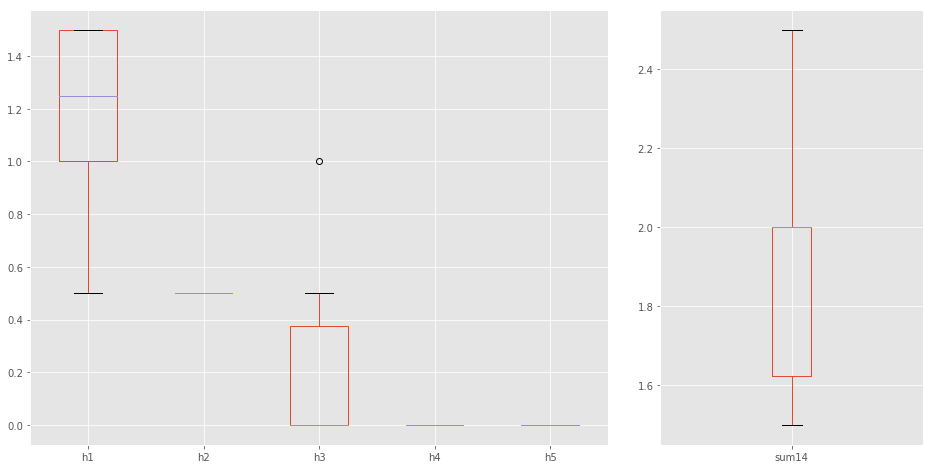

### Results for Cornerback, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.0,0.0,0.0,0.0,1.0
Median,1.0,0.0,0.0,0.0,0.0,1.0
75 Percentile,1.0,0.0,0.0,0.0,0.0,1.0


##### Box Plots

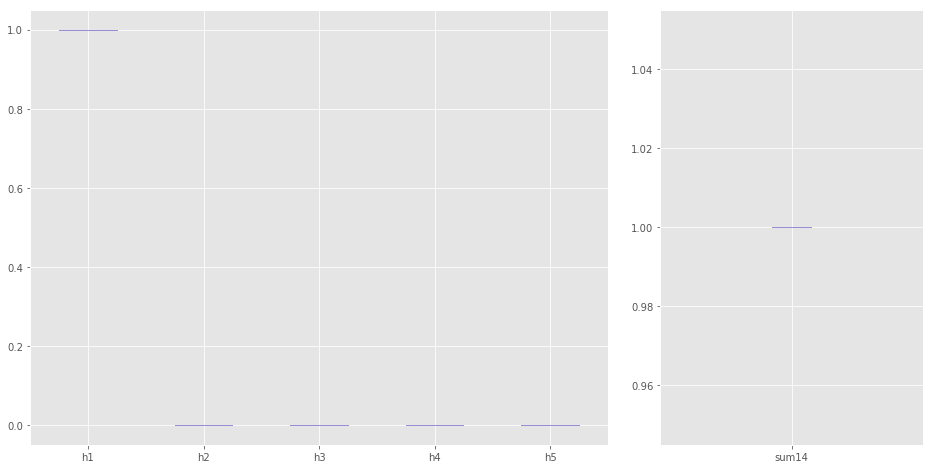

### Results for Cornerback, Practice Type: Thurs

  Number of Data Points: 10


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.500,0.125,0.0,0.0,0.0,0.625
Median,2.500,0.500,0.5,0.0,0.0,3.250
75 Percentile,4.375,2.000,0.5,0.0,0.0,7.250


##### Box Plots

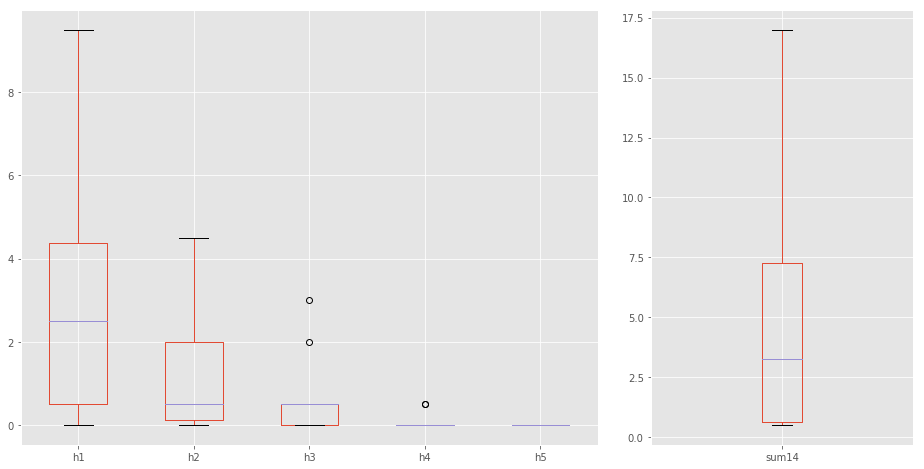

### Results for Cornerback, Practice Type: Tues

  Number of Data Points: 12


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.00,0.500,0.000,0.0,0.0,0.875
Median,0.50,1.000,0.000,0.0,0.0,2.500
75 Percentile,2.25,1.875,0.625,0.0,0.0,4.000


##### Box Plots

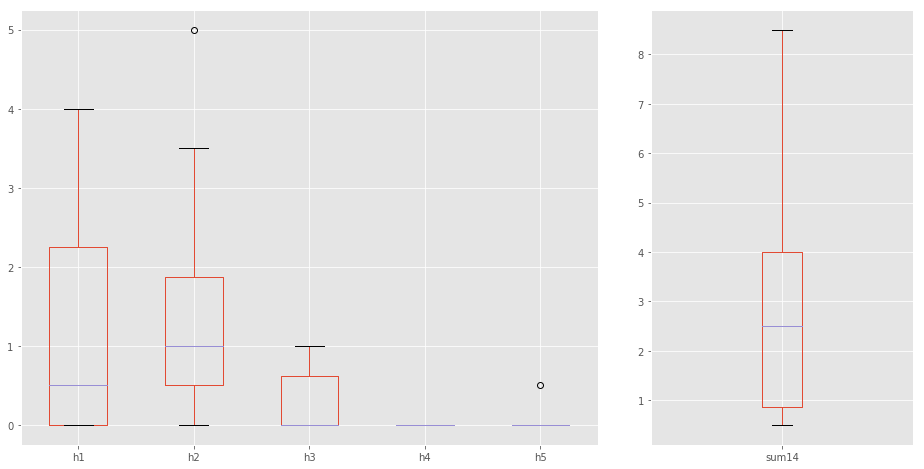

### Results for Cornerback, Practice Type: Wed

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.50,0.000,0.00,0.000,0.0,0.625
Median,0.75,0.500,0.00,0.000,0.0,2.250
75 Percentile,1.00,1.375,0.75,0.375,0.0,3.875


##### Box Plots

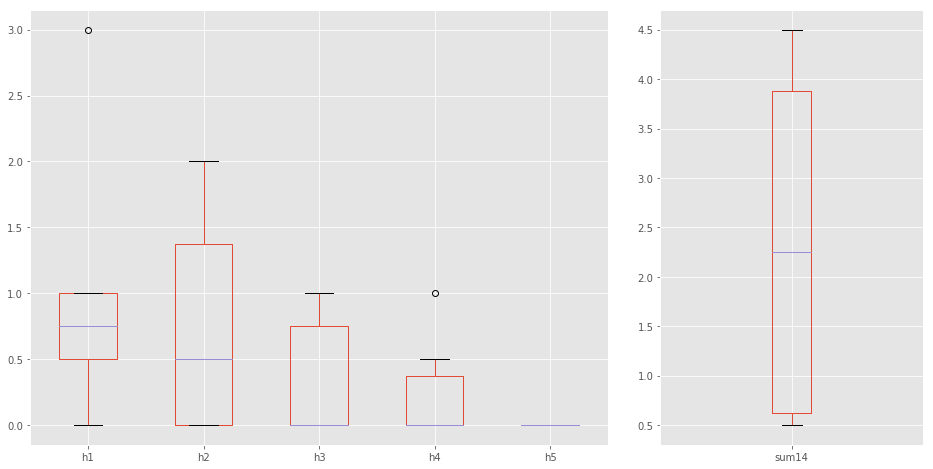

### Results for Cornerback, Practice Type: Wed/Thurs

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.50,0.5,0.0,0.0,0.0,2.25
Median,1.00,1.0,0.0,0.0,0.0,2.50
75 Percentile,1.75,2.0,0.0,0.5,0.0,3.25


##### Box Plots

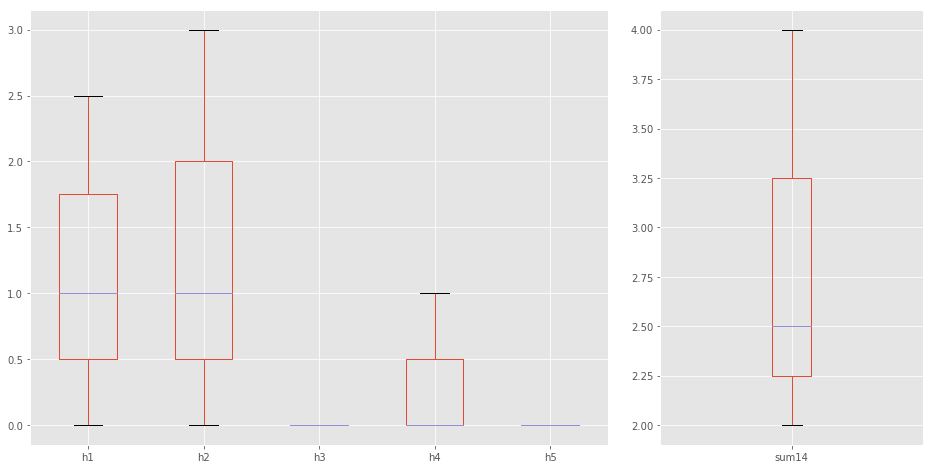

### Results for Def End, Practice Type: Camp

  Number of Data Points: 13


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.0,2.0,1.0,0.0,0.0,7.0
Median,3.5,4.0,1.5,0.5,0.0,7.5
75 Percentile,4.0,6.0,4.0,1.0,0.0,15.0


##### Box Plots

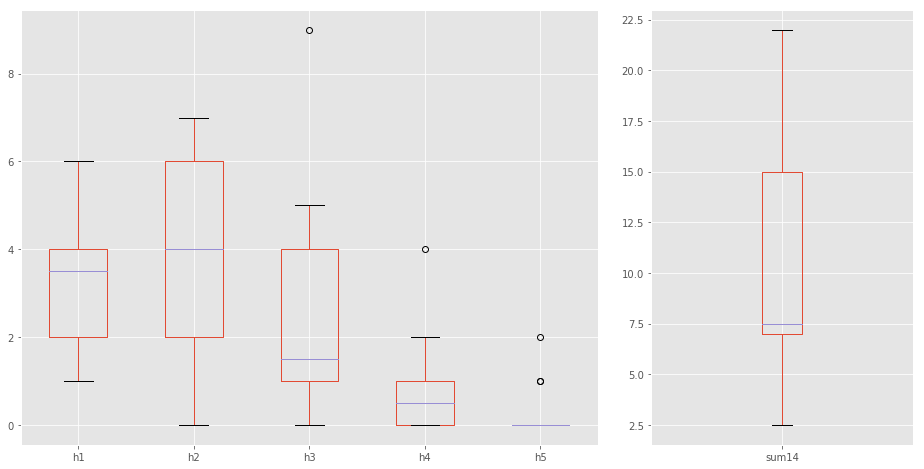

### Results for Def End, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.0,0.0,0.0,0.0,1.0
Median,1.0,0.0,0.0,0.0,0.0,1.0
75 Percentile,1.0,0.0,0.0,0.0,0.0,1.0


##### Box Plots

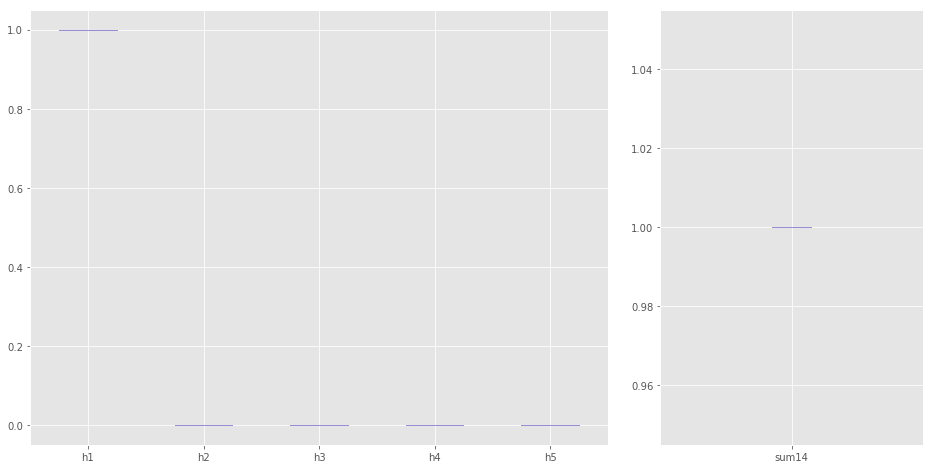

### Results for Def End, Practice Type: Thurs

  Number of Data Points: 10


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.125,0.125,0.000,0.0,0.0,1.50
Median,1.500,0.500,0.250,0.0,0.0,2.25
75 Percentile,2.000,1.375,0.875,0.0,0.0,4.75


##### Box Plots

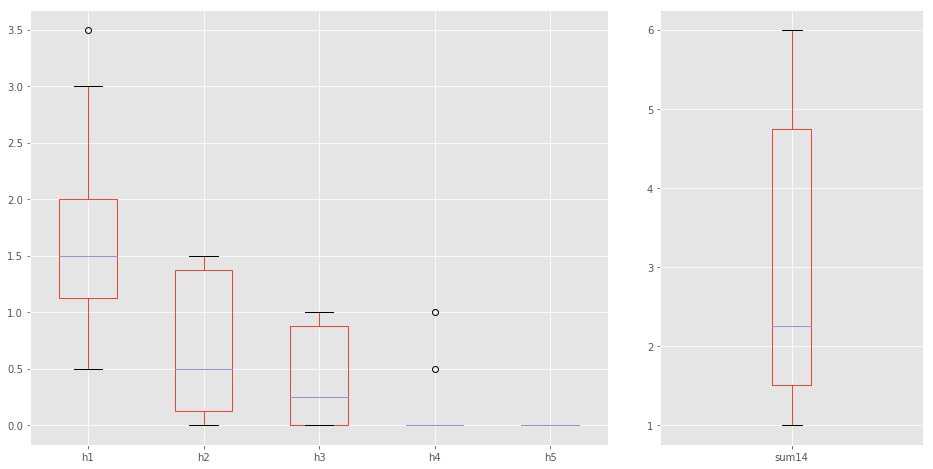

### Results for Def End, Practice Type: Tues

  Number of Data Points: 15


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.75,2.0,0.25,0.0,0.0,4.5
Median,2.50,2.5,0.50,0.0,0.5,5.0
75 Percentile,4.00,4.0,3.00,0.5,0.5,9.0


##### Box Plots

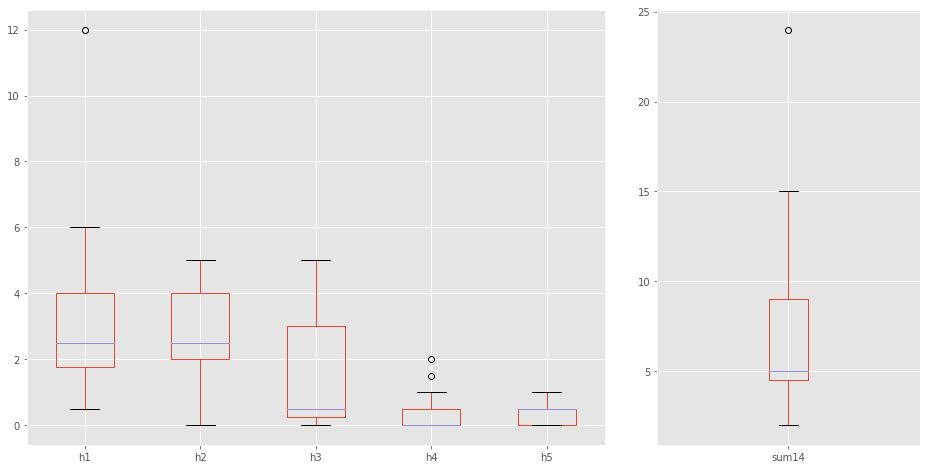

### Results for Def End, Practice Type: Wed

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.5,1.5,0.5,0.0,0.0,4.0
Median,3.5,2.0,1.0,0.5,0.0,6.5
75 Percentile,4.0,5.5,2.5,1.0,0.5,12.5


##### Box Plots

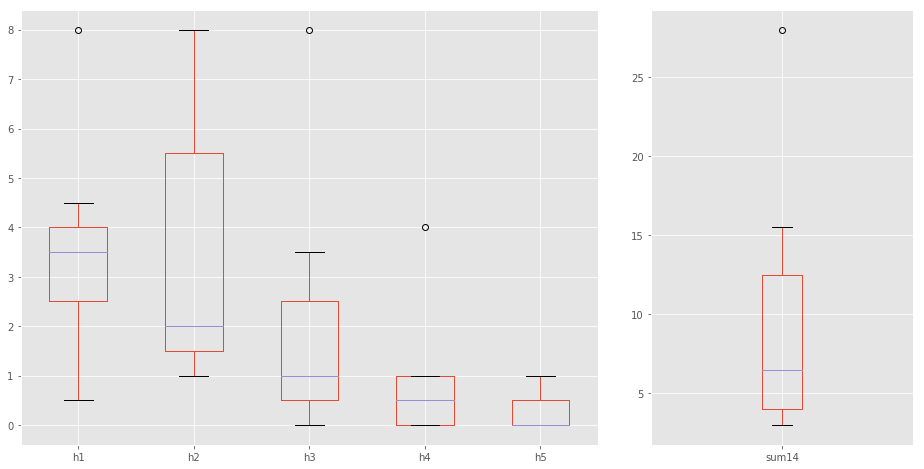

### Results for Def End, Practice Type: Wed/Thurs

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.25,1.50,0.75,0.0,0.00,4.75
Median,2.00,2.50,1.00,0.0,0.00,6.00
75 Percentile,3.75,2.75,1.50,0.5,0.25,7.50


##### Box Plots

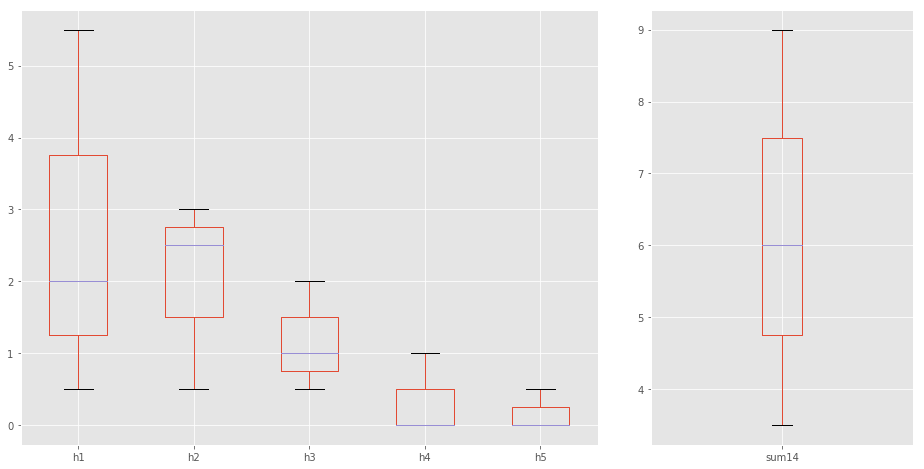

### Results for Def Tackle, Practice Type: Camp

  Number of Data Points: 13


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,0.0,0.0,0.0,0.0,2.5
Median,2.5,0.5,0.0,0.0,0.0,3.0
75 Percentile,2.5,1.0,0.5,0.0,0.0,4.0


##### Box Plots

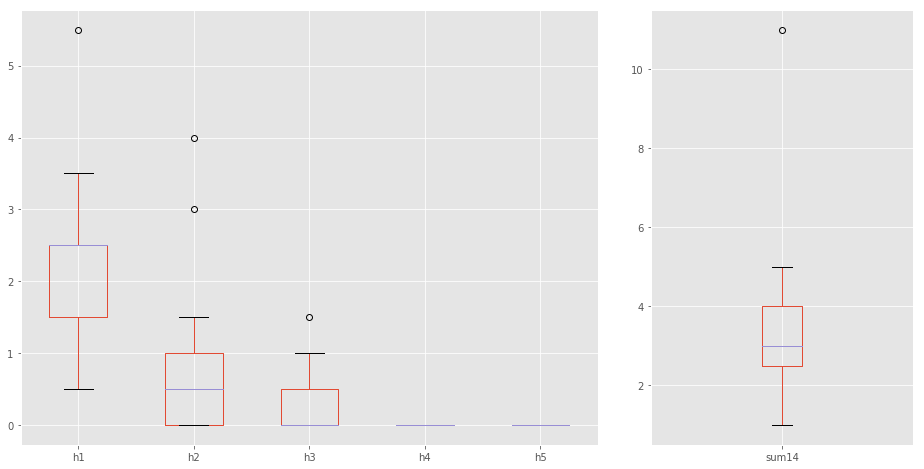

### Results for Def Tackle, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,1.5,0.5,0.0,0.0,3.0
Median,1.0,1.5,0.5,0.0,0.0,3.0
75 Percentile,1.0,1.5,0.5,0.0,0.0,3.0


##### Box Plots

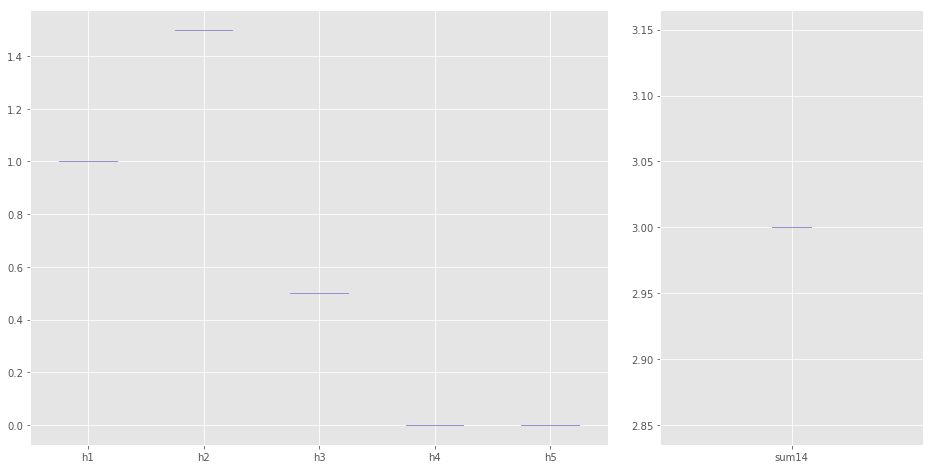

### Results for Def Tackle, Practice Type: Thurs

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.5,0.0,0.0,0.0,1.5
Median,1.0,0.5,0.0,0.0,0.0,2.0
75 Percentile,2.5,0.5,1.0,0.0,0.0,3.0


##### Box Plots

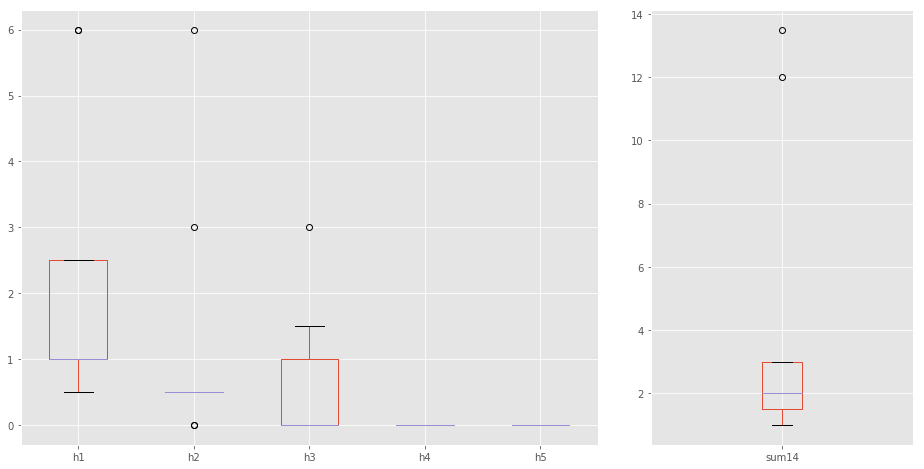

### Results for Def Tackle, Practice Type: Tues

  Number of Data Points: 15


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.0,0.00,0.00,0.0,0.0,3.0
Median,3.0,1.00,0.00,0.0,0.0,3.5
75 Percentile,4.0,1.75,0.25,0.0,0.0,6.0


##### Box Plots

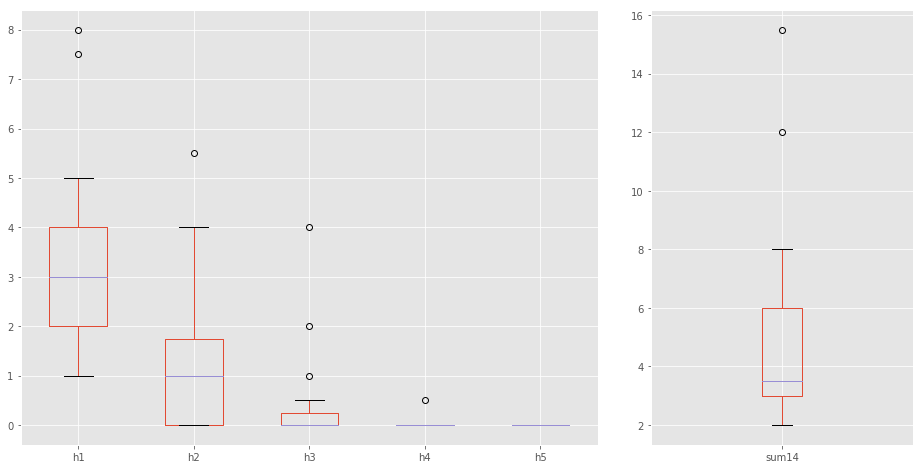

### Results for Def Tackle, Practice Type: Wed

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.5,0.0,0.0,0.0,2.0
Median,1.0,1.0,0.0,0.0,0.0,2.5
75 Percentile,4.0,1.5,0.5,0.0,0.0,7.0


##### Box Plots

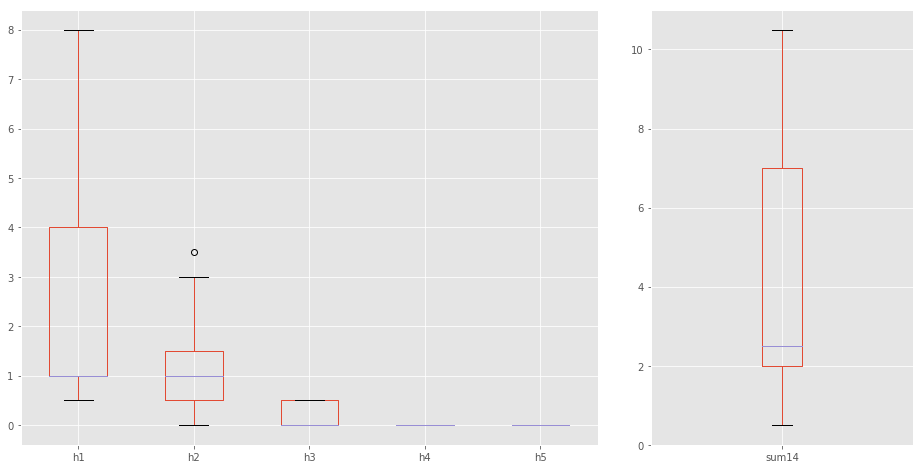

### Results for Def Tackle, Practice Type: Wed/Thurs

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,2.0,0.0,0.0,0.0,3.5
Median,2.0,2.0,0.0,0.0,0.0,4.0
75 Percentile,3.5,3.5,1.0,0.0,0.0,8.0


##### Box Plots

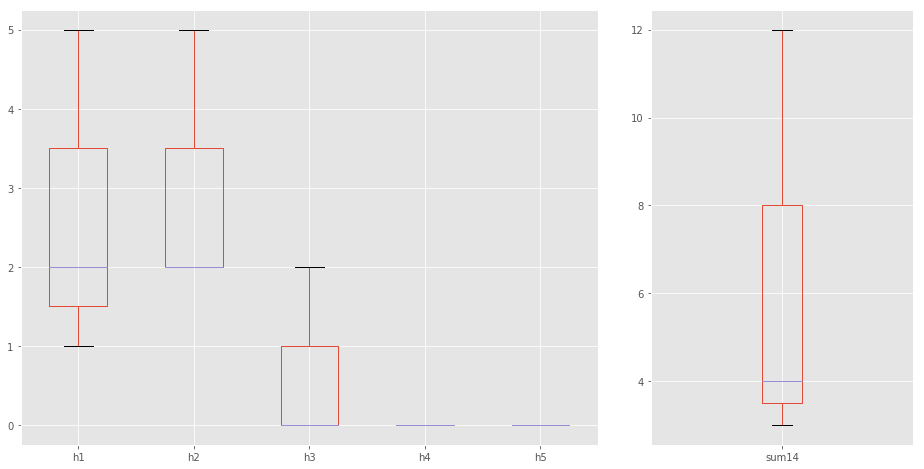

### Results for Linebacker, Practice Type: Camp

  Number of Data Points: 15


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.75,1.5,0.50,0.0,0.0,3.75
Median,3.00,2.5,1.00,0.0,0.0,7.00
75 Percentile,3.25,4.5,1.75,0.5,0.0,10.00


##### Box Plots

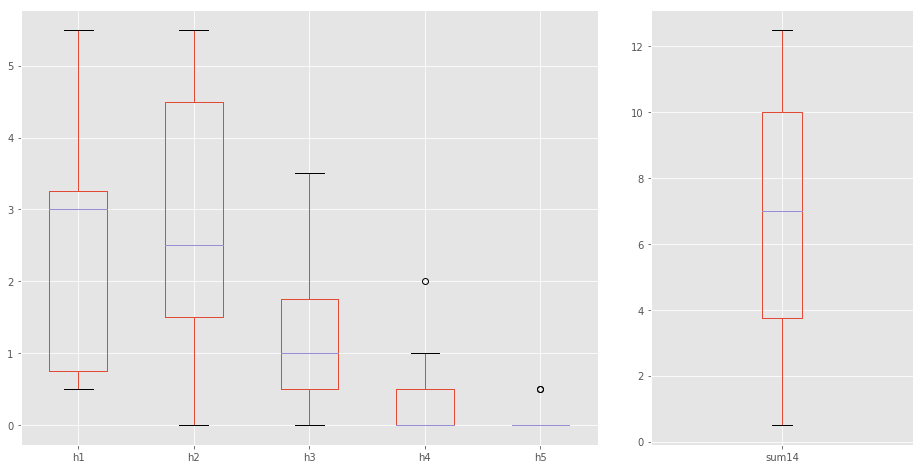

### Results for Linebacker, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,1.0,0.5,0.0,0.0,3.0
Median,1.5,1.0,0.5,0.0,0.0,3.0
75 Percentile,1.5,1.0,0.5,0.0,0.0,3.0


##### Box Plots

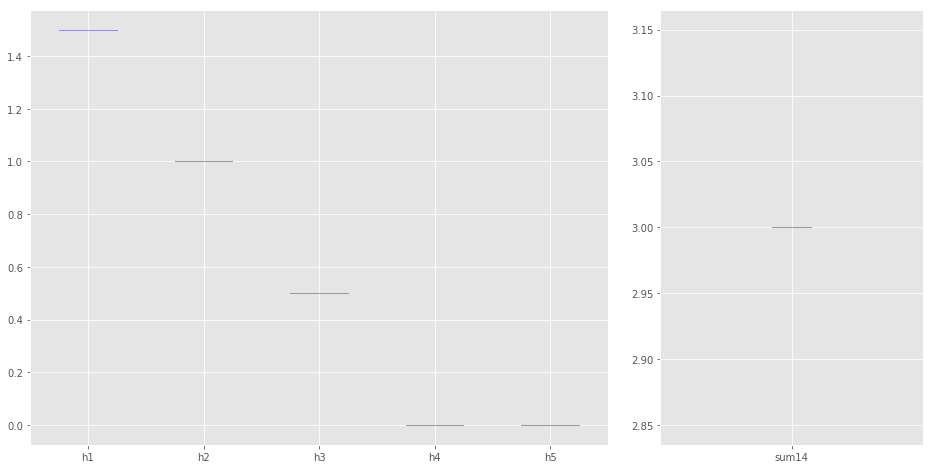

### Results for Linebacker, Practice Type: Thurs

  Number of Data Points: 12


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.000,0.5,0.0,0.0,0.0,1.00
Median,1.000,0.5,0.0,0.0,0.0,1.25
75 Percentile,1.125,1.0,0.0,0.0,0.0,2.00


##### Box Plots

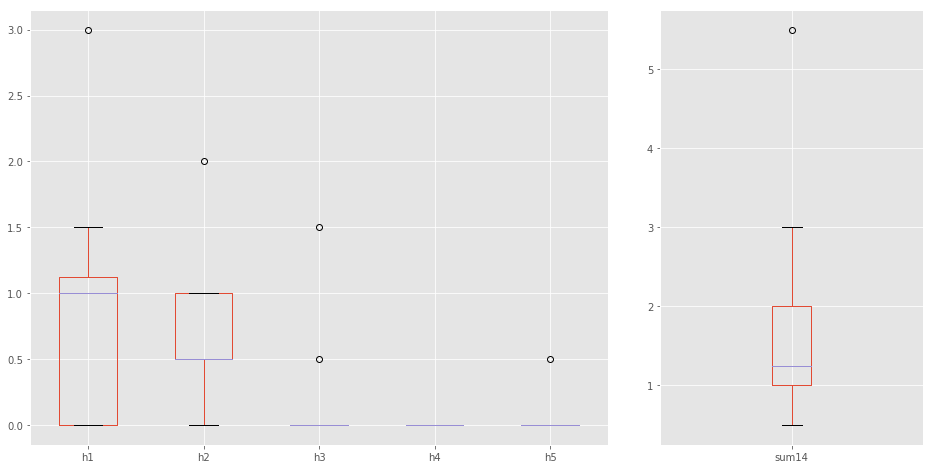

### Results for Linebacker, Practice Type: Tues

  Number of Data Points: 15


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,0.5,0.0,0.0,0.0,2.75
Median,3.0,1.5,0.5,0.0,0.0,5.50
75 Percentile,5.0,2.5,1.0,0.0,0.0,9.00


##### Box Plots

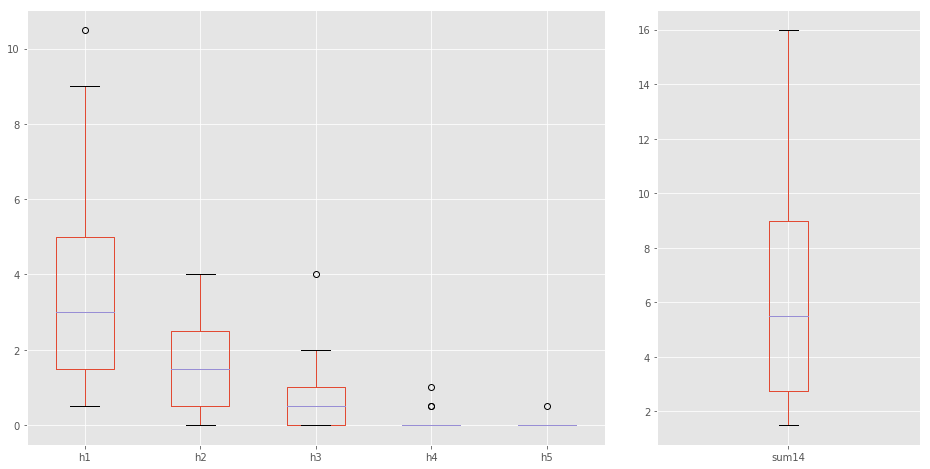

### Results for Linebacker, Practice Type: Wed

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,1.5,0.5,0.0,0.0,3.0
Median,1.5,2.0,1.0,0.0,0.0,5.0
75 Percentile,2.0,3.0,1.0,0.0,0.0,6.0


##### Box Plots

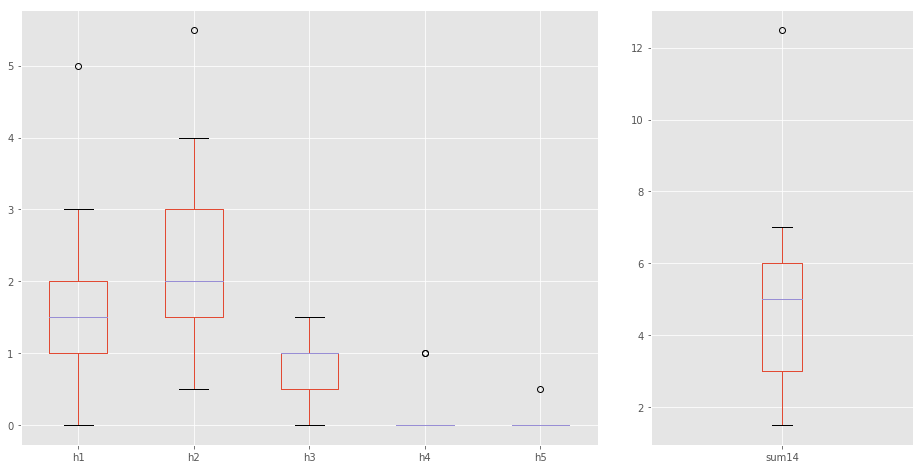

### Results for Linebacker, Practice Type: Wed/Thurs

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.5,1.25,0.00,0.0,0.0,2.0
Median,1.0,1.50,0.00,0.0,0.0,2.5
75 Percentile,4.0,2.00,0.25,0.0,0.0,6.0


##### Box Plots

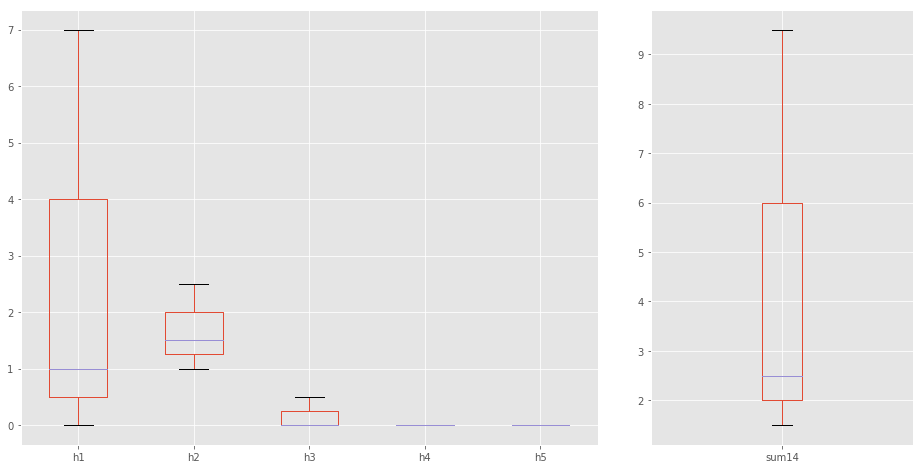

### Results for Off Guard, Practice Type: Camp

  Number of Data Points: 14


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.875,1.5,0.125,0.0,0.0,6.125
Median,6.000,2.0,0.500,0.0,0.0,8.250
75 Percentile,6.750,2.5,1.000,0.0,0.0,10.500


##### Box Plots

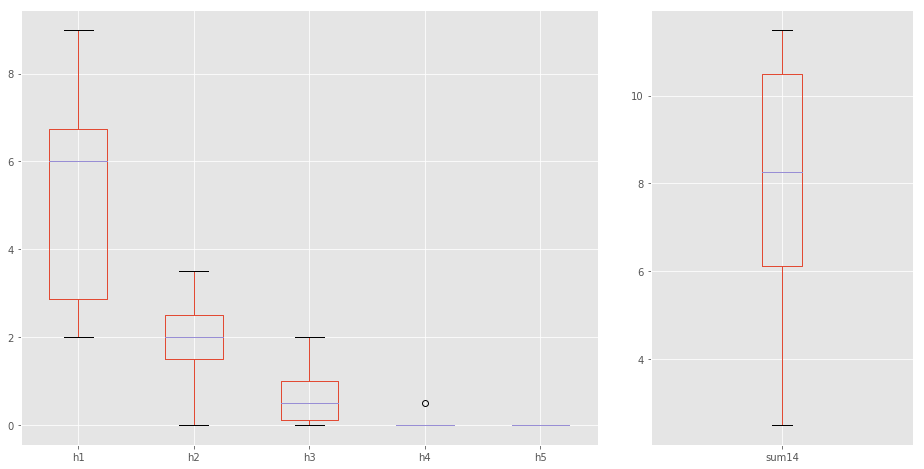

### Results for Off Guard, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.5,0.0,0.0,0.0,1.5
Median,1.0,0.5,0.0,0.0,0.0,1.5
75 Percentile,1.0,0.5,0.0,0.0,0.0,1.5


##### Box Plots

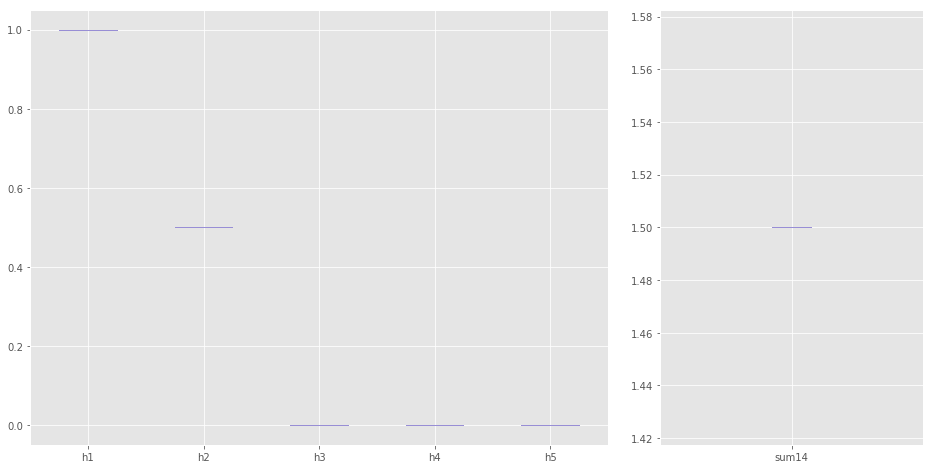

### Results for Off Guard, Practice Type: Thurs

  Number of Data Points: 7


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.25,1.0,0.25,0.0,0.0,5.50
Median,5.00,1.5,0.50,0.0,0.0,7.00
75 Percentile,11.25,4.5,1.50,1.5,0.0,19.75


##### Box Plots

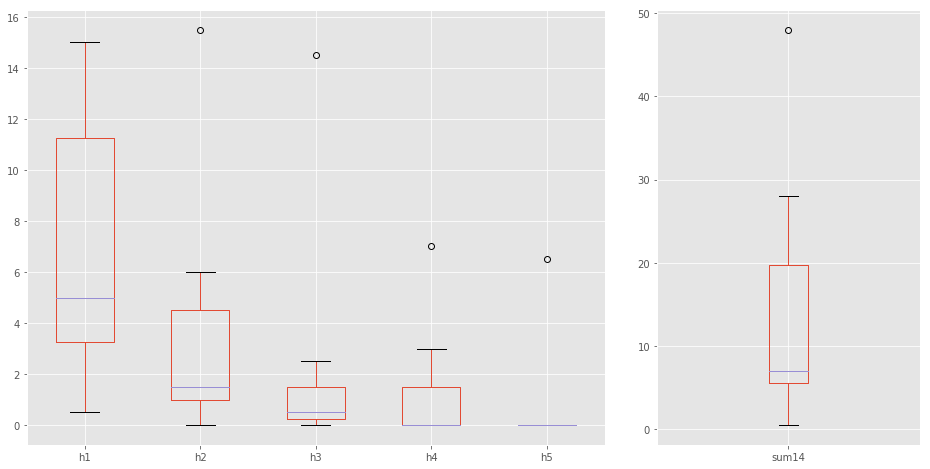

### Results for Off Guard, Practice Type: Tues

  Number of Data Points: 11


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.25,0.00,0.0,0.0,1.5
Median,3.0,1.00,0.00,0.0,0.0,4.0
75 Percentile,5.0,1.50,0.75,0.0,0.0,7.0


##### Box Plots

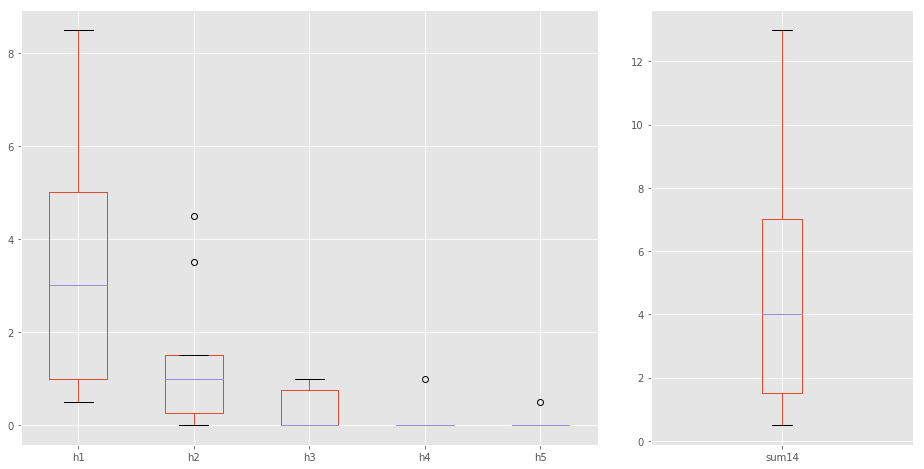

### Results for Off Guard, Practice Type: Wed

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.50,0.750,0.0,0.0,0.0,3.25
Median,5.75,2.250,0.0,0.0,0.0,8.75
75 Percentile,10.50,3.375,0.0,0.0,0.0,14.25


##### Box Plots

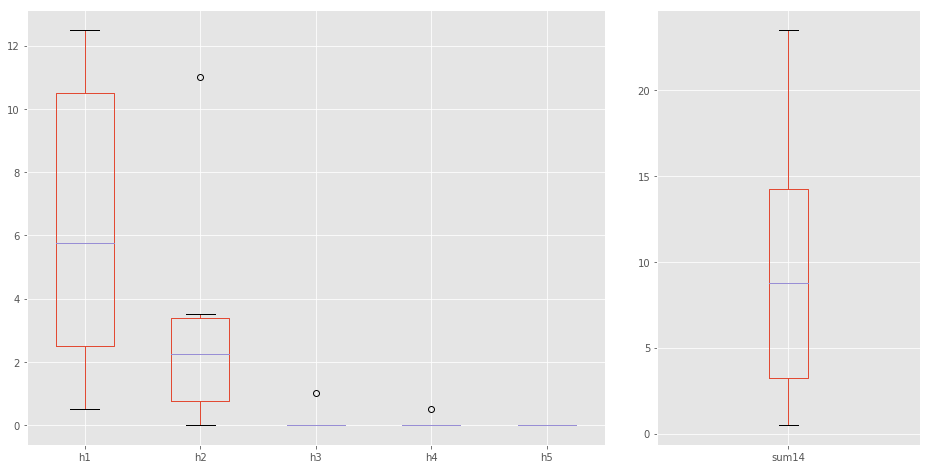

### Results for Off Guard, Practice Type: Wed/Thurs

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.25,0.25,0.0,0.0,0.0,1.5
Median,2.00,0.50,0.0,0.0,0.0,2.0
75 Percentile,2.50,0.75,0.0,0.0,0.0,3.0


##### Box Plots

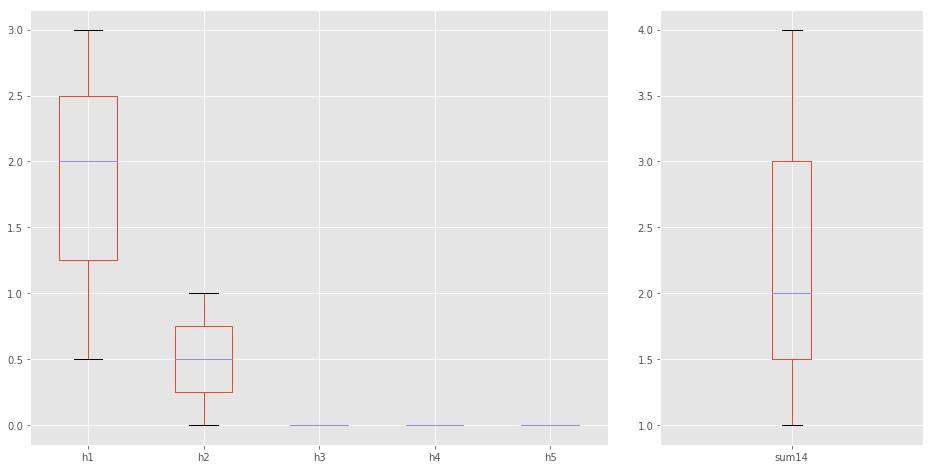

### Results for Off Tackle, Practice Type: Camp

  Number of Data Points: 14


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.125,0.250,0.0,0.0,0.0,1.625
Median,2.000,1.500,0.0,0.0,0.0,3.250
75 Percentile,2.875,1.875,0.0,0.0,0.0,5.000


##### Box Plots

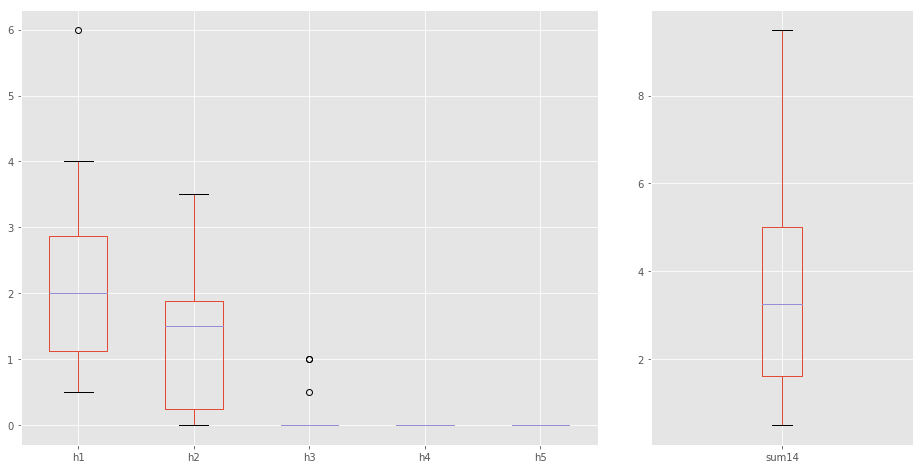

### Results for Off Tackle, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.5,0.0,0.0,0.0,1.5
Median,1.0,0.5,0.0,0.0,0.0,1.5
75 Percentile,1.0,0.5,0.0,0.0,0.0,1.5


##### Box Plots

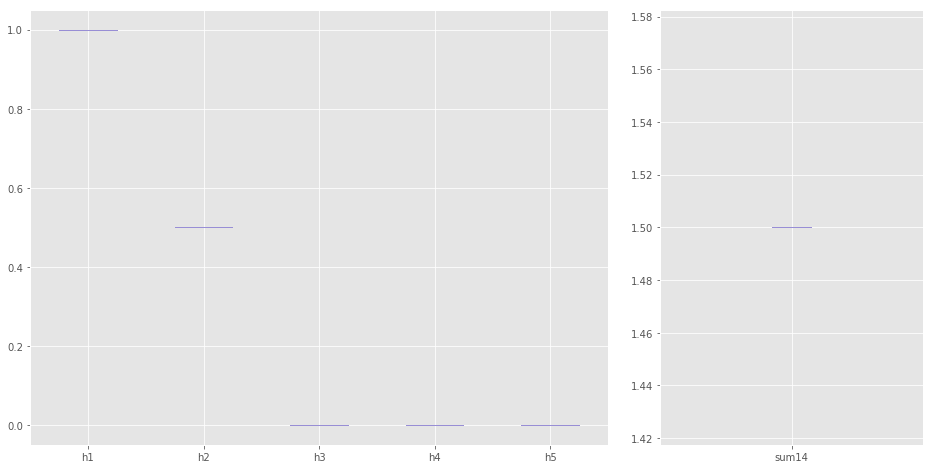

### Results for Off Tackle, Practice Type: Thurs

  Number of Data Points: 8


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.500,0.0,0.0,0.0,0.0,0.5
Median,0.500,0.5,0.0,0.0,0.0,1.0
75 Percentile,1.125,0.5,0.0,0.0,0.0,2.0


##### Box Plots

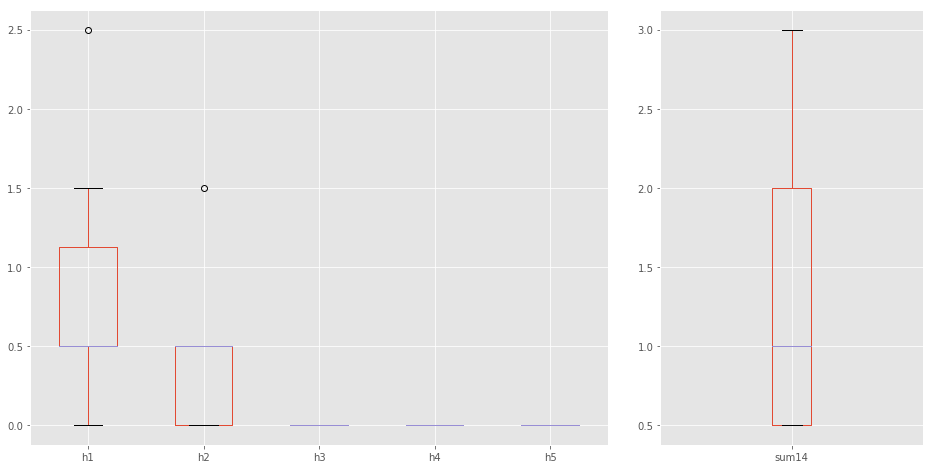

### Results for Off Tackle, Practice Type: Tues

  Number of Data Points: 13


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.0,0.0,0.0,0.0,1.0
Median,1.5,0.0,0.0,0.0,0.0,2.0
75 Percentile,3.0,0.5,0.5,0.0,0.0,3.0


##### Box Plots

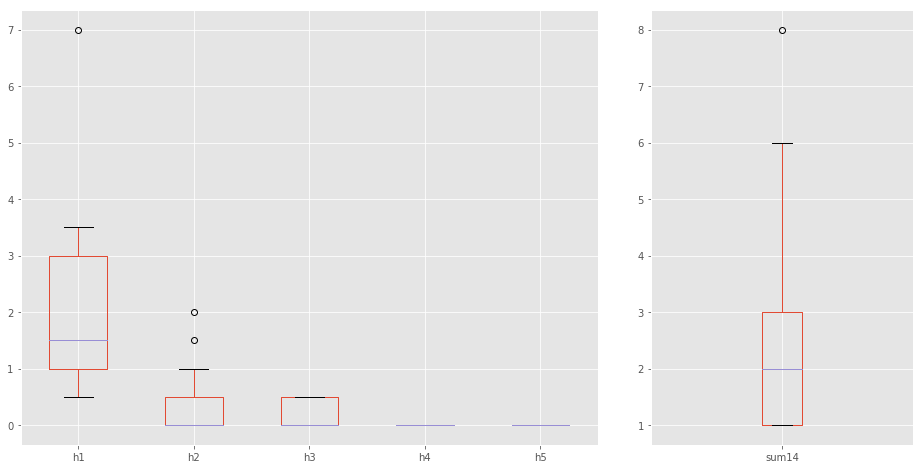

### Results for Off Tackle, Practice Type: Wed

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.0,1.0,0.0,0.0,0.0,3.0
Median,3.0,1.5,0.0,0.0,0.0,5.0
75 Percentile,3.5,2.0,0.5,0.0,0.0,6.5


##### Box Plots

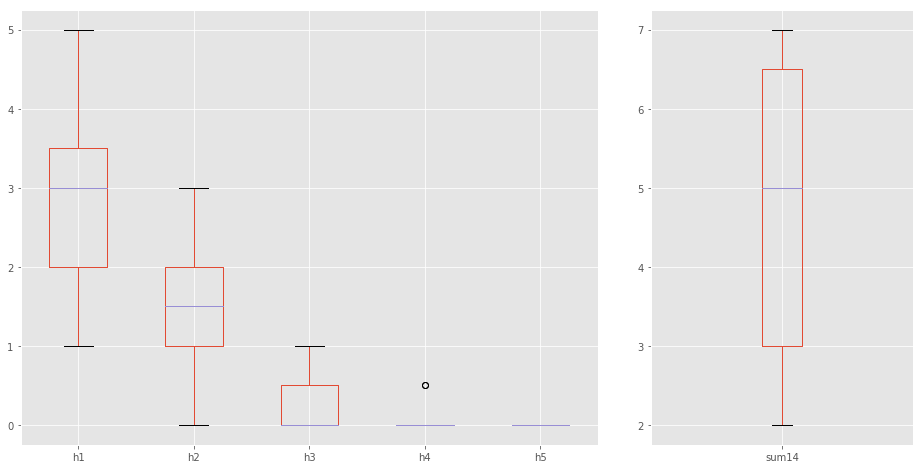

### Results for Off Tackle, Practice Type: Wed/Thurs

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.0,1.0,0.0,0.0,0.0,4.0
Median,3.0,1.0,0.0,0.0,0.0,4.0
75 Percentile,3.0,1.0,0.0,0.0,0.0,4.0


##### Box Plots

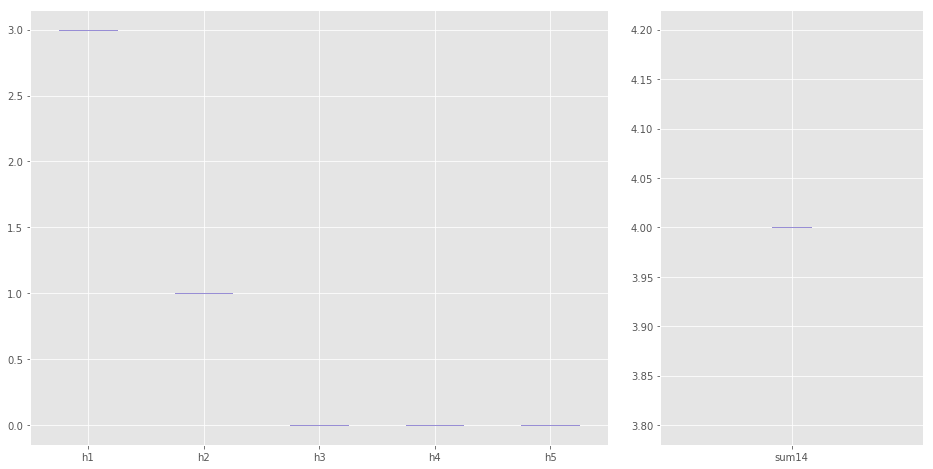

### Results for Running Back, Practice Type: Camp

  Number of Data Points: 12


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.000,0.5,0.500,0.0,0.0,4.00
Median,1.500,2.0,1.000,0.0,0.0,5.00
75 Percentile,2.125,2.5,1.625,0.0,0.0,5.25


##### Box Plots

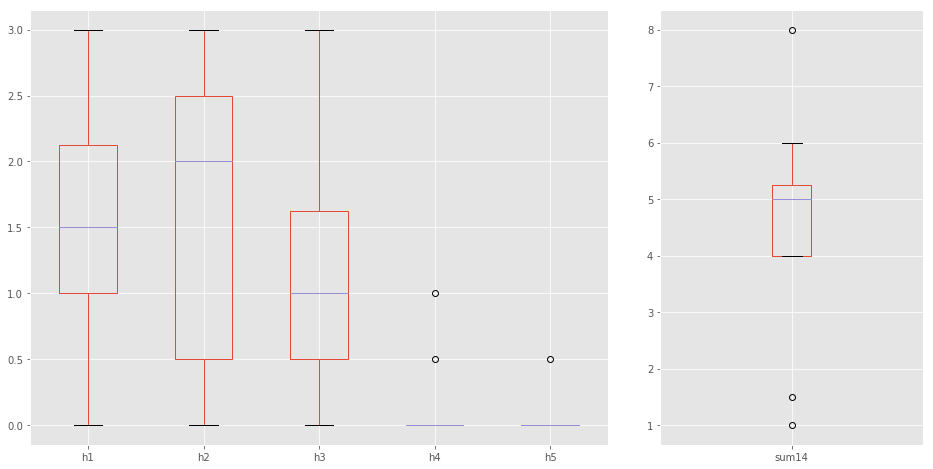

### Results for Running Back, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.0,0.5,0.0,0.0,0.0,3.5
Median,3.0,0.5,0.0,0.0,0.0,3.5
75 Percentile,3.0,0.5,0.0,0.0,0.0,3.5


##### Box Plots

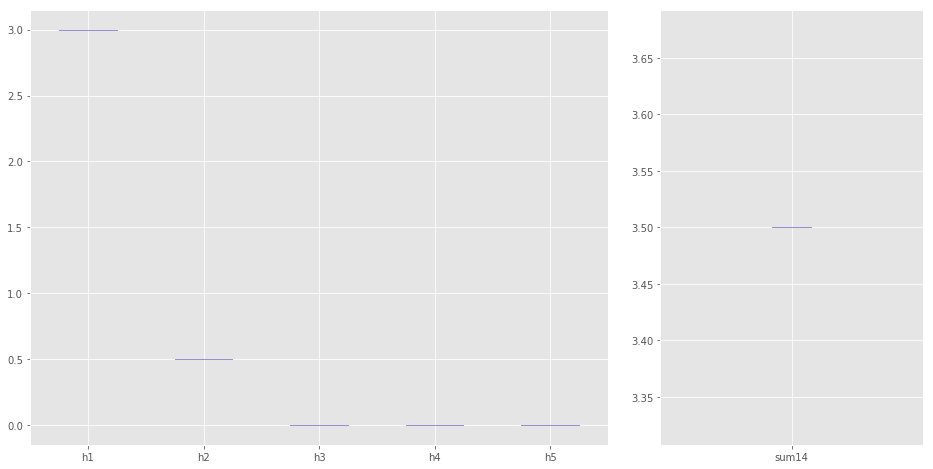

### Results for Running Back, Practice Type: Thurs

  Number of Data Points: 7


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.25,0.00,0.00,0.0,0.0,1.0
Median,2.00,1.00,0.00,0.0,0.0,2.0
75 Percentile,2.50,1.25,0.25,0.0,0.0,3.5


##### Box Plots

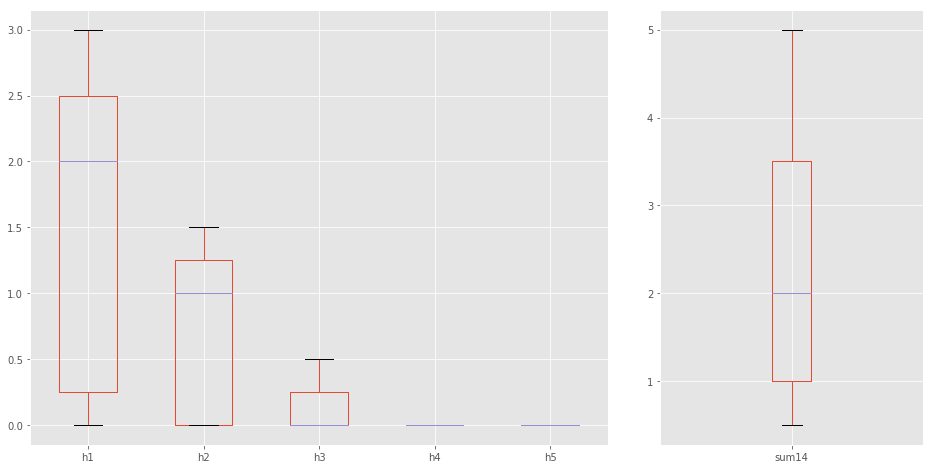

### Results for Running Back, Practice Type: Tues

  Number of Data Points: 11


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.625,0.00,0.000,0.0,0.0,1.0
Median,1.000,0.00,0.000,0.0,0.0,1.5
75 Percentile,1.375,0.75,0.875,0.0,0.0,2.0


##### Box Plots

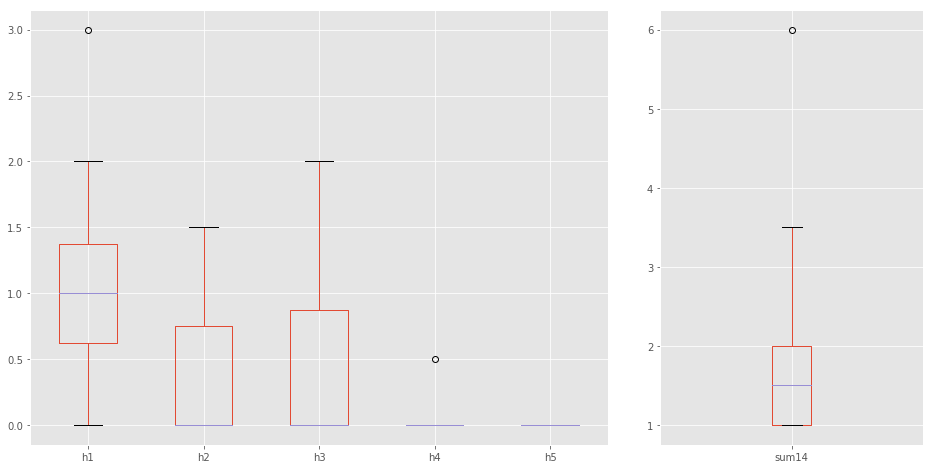

### Results for Running Back, Practice Type: Wed

  Number of Data Points: 7


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.75,0.75,0.5,0.0,0.0,2.5
Median,1.50,1.00,1.0,0.0,0.0,3.0
75 Percentile,2.00,1.00,1.0,0.0,0.0,4.0


##### Box Plots

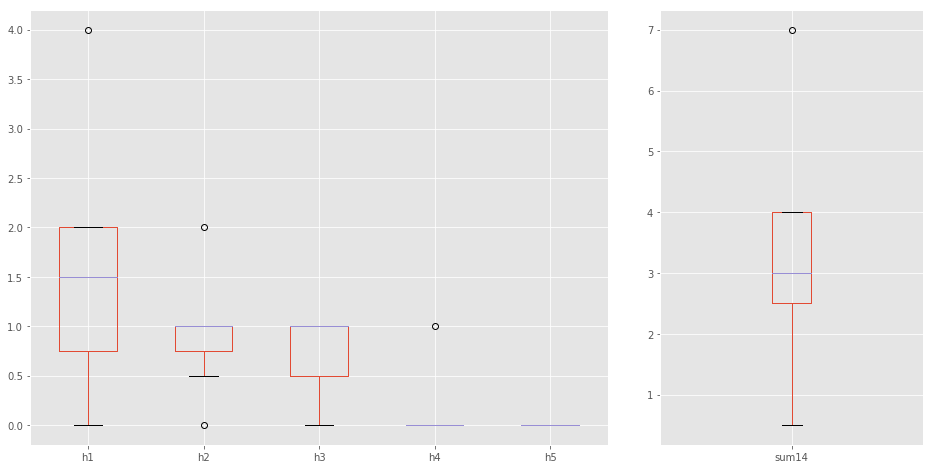

### Results for Running Back, Practice Type: Wed/Thurs

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.0,0.0,0.0,1.0,0.0,3.0
Median,2.0,0.0,0.0,1.0,0.0,3.0
75 Percentile,2.0,0.0,0.0,1.0,0.0,3.0


##### Box Plots

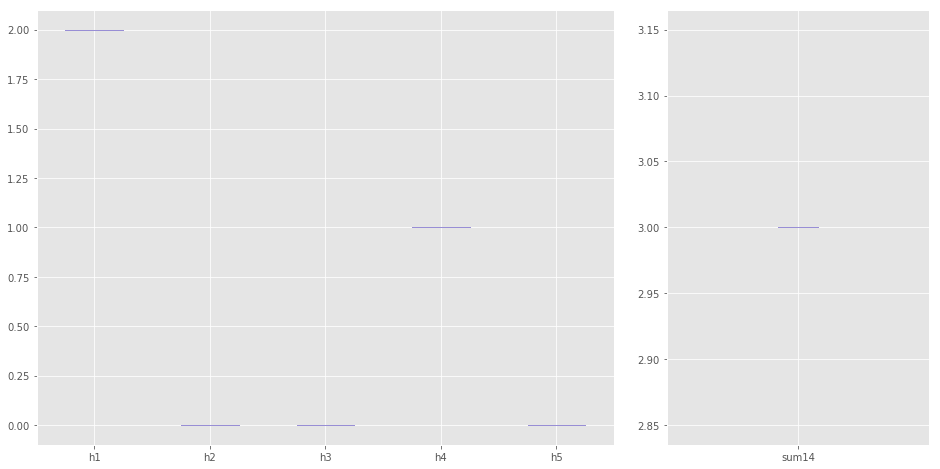

### Results for Safety, Practice Type: Camp

  Number of Data Points: 13


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.5,0.0,0.0,0.0,0.0,1.0
Median,0.5,0.5,0.5,0.0,0.0,2.0
75 Percentile,1.0,1.0,1.0,0.0,0.0,2.0


##### Box Plots

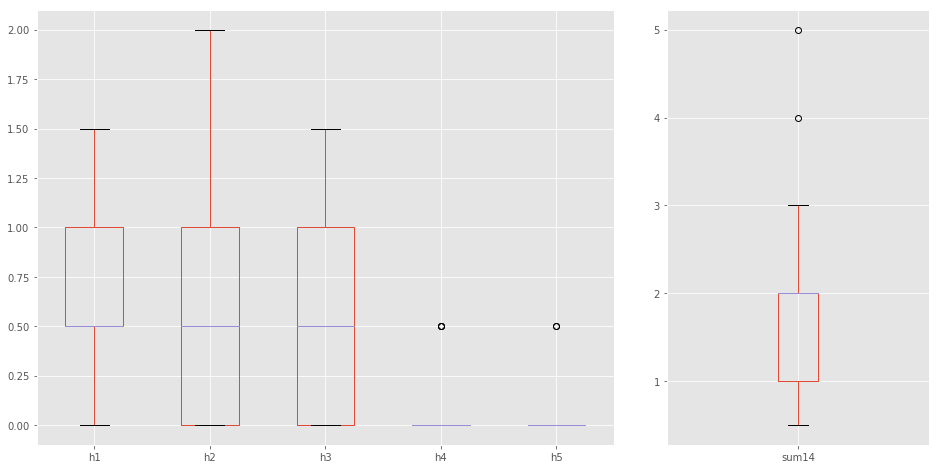

### Results for Safety, Practice Type: Thurs

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.375,0.625,0.000,0.0,0.0,1.625
Median,2.750,1.750,0.000,0.0,0.0,5.250
75 Percentile,3.750,3.625,0.375,0.0,0.0,7.000


##### Box Plots

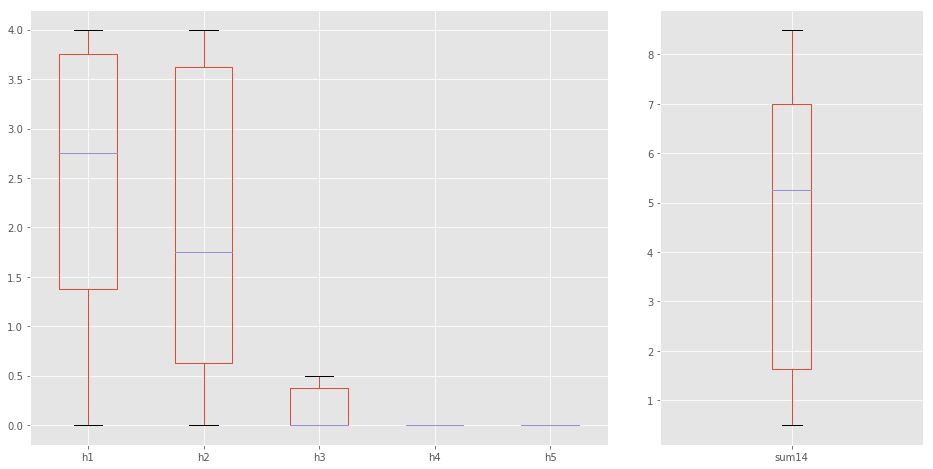

### Results for Safety, Practice Type: Tues

  Number of Data Points: 4


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.375,0.50,0.00,0.000,0.0,1.000
Median,0.500,0.75,0.25,0.000,0.0,2.000
75 Percentile,0.875,1.25,0.75,0.375,0.0,3.625


##### Box Plots

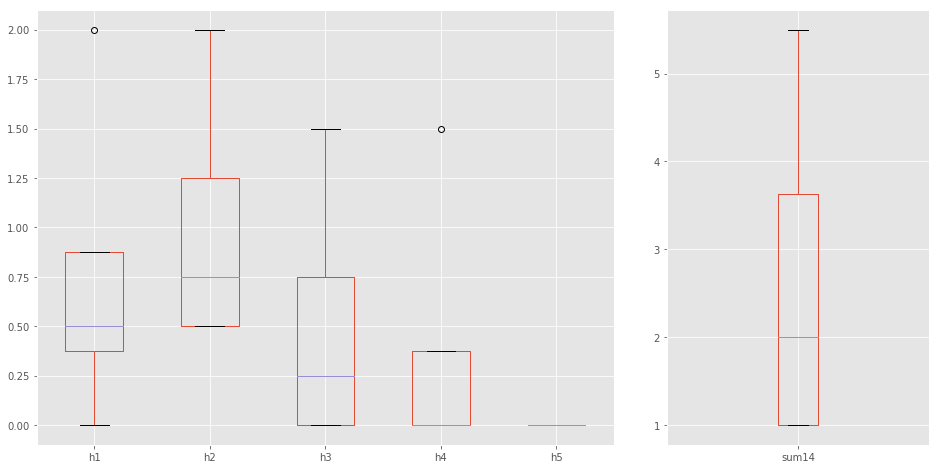

### Results for Safety, Practice Type: Wed

  Number of Data Points: 5


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.0,0.5,0.0,0.0,0.0,1.0
Median,2.0,0.5,0.0,0.0,0.0,3.5
75 Percentile,2.0,1.0,0.5,0.0,0.0,4.0


##### Box Plots

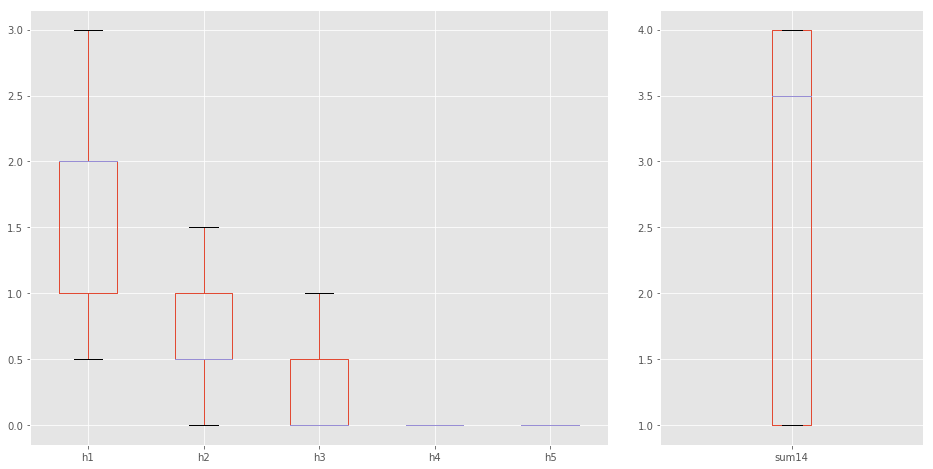

### Results for Tight End, Practice Type: Camp

  Number of Data Points: 15


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,3.0,2.0,1.0,0.5,0.00,8.75
Median,3.5,4.0,2.0,0.5,0.00,10.00
75 Percentile,5.0,4.5,3.0,1.0,0.25,13.00


##### Box Plots

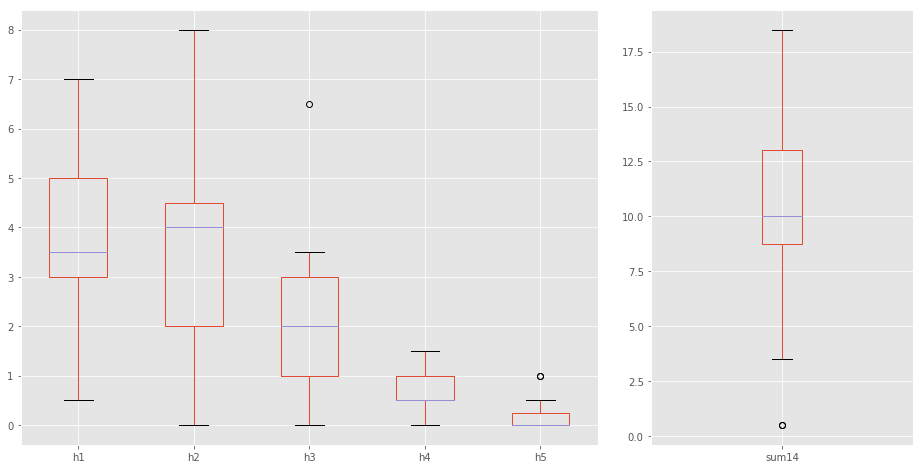

### Results for Tight End, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.5,0.5,0.0,0.0,0.0,1.0
Median,0.5,0.5,0.0,0.0,0.0,1.0
75 Percentile,0.5,0.5,0.0,0.0,0.0,1.0


##### Box Plots

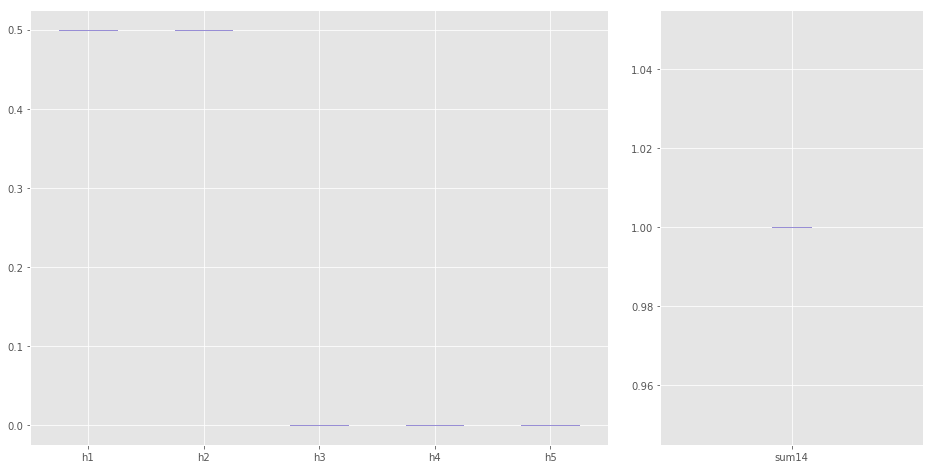

### Results for Tight End, Practice Type: Thurs

  Number of Data Points: 10


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.625,0.125,0.000,0.0,0.0,1.125
Median,1.250,0.500,0.000,0.0,0.0,1.500
75 Percentile,1.500,1.000,0.875,0.0,0.0,3.500


##### Box Plots

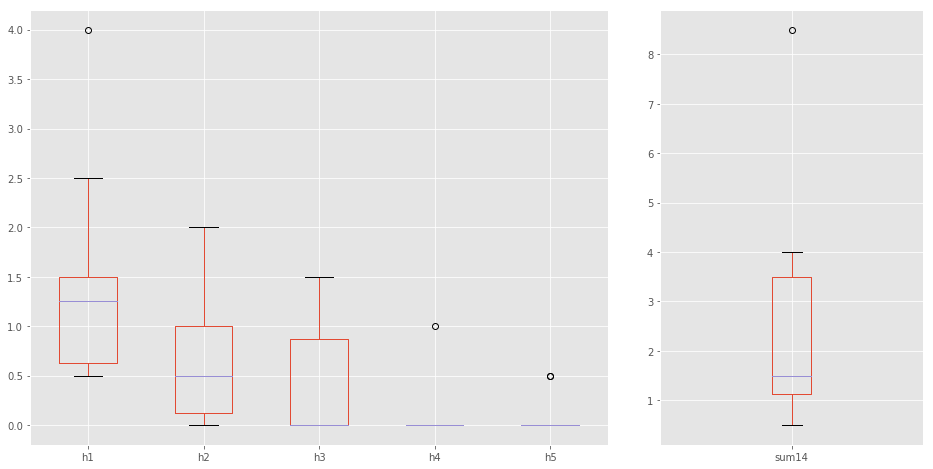

### Results for Tight End, Practice Type: Tues

  Number of Data Points: 15


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.00,2.0,2.5,0.5,0.00,8.25
Median,3.50,3.0,3.0,1.0,0.50,11.00
75 Percentile,4.75,4.0,4.0,1.5,0.75,12.50


##### Box Plots

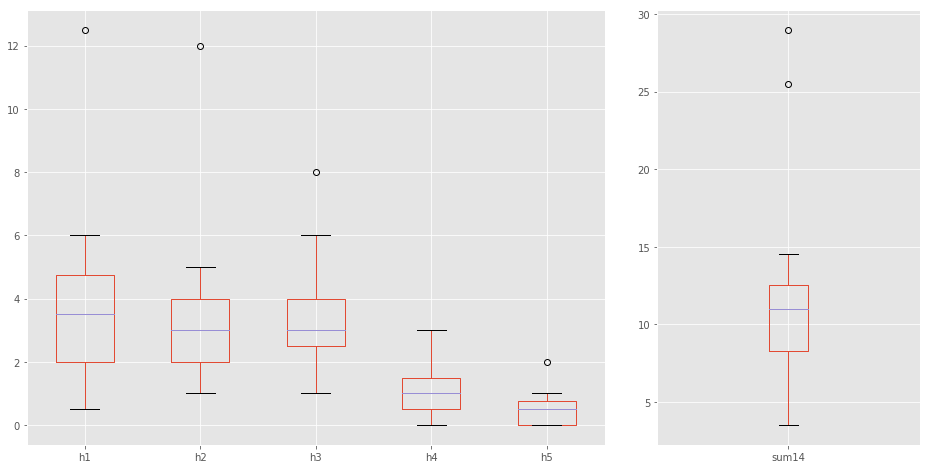

### Results for Tight End, Practice Type: Wed

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,3.0,1.0,0.0,0.0,7.0
Median,3.0,3.5,1.5,1.0,0.5,10.5
75 Percentile,3.5,4.5,3.0,1.5,1.0,12.0


##### Box Plots

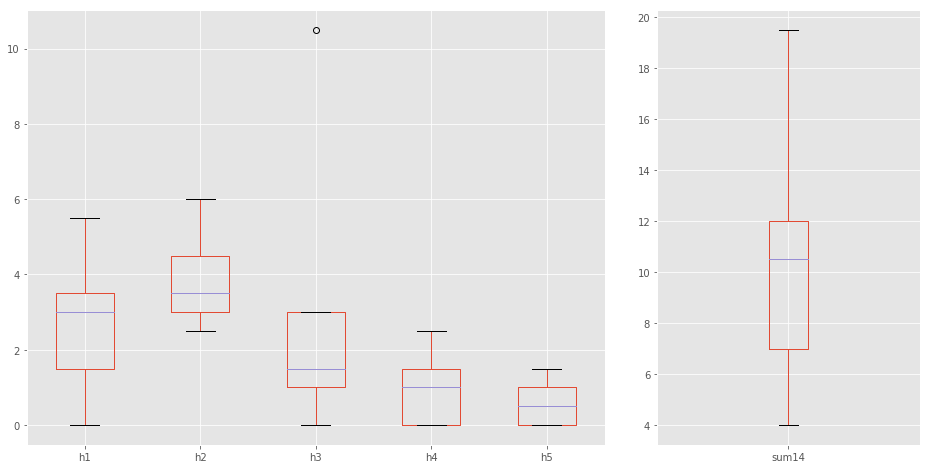

### Results for Tight End, Practice Type: Wed/Thurs

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.75,1.5,2.25,1.00,0.25,6.25
Median,1.50,2.0,2.50,1.00,0.50,8.50
75 Percentile,1.75,3.0,3.50,1.75,0.50,10.00


##### Box Plots

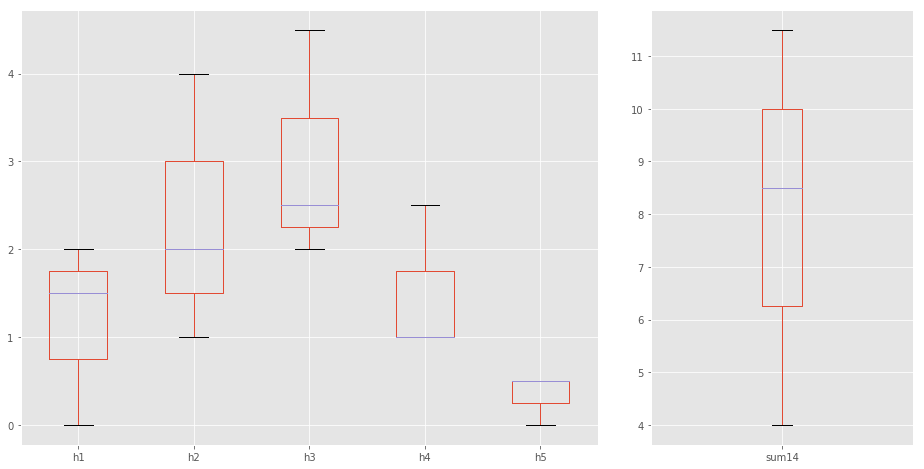

### Results for Wide Receiver, Practice Type: Camp

  Number of Data Points: 10


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.5,0.0,0.0,0.0,0.0,0.50
Median,0.5,0.0,0.0,0.0,0.0,0.75
75 Percentile,1.0,0.0,0.5,0.0,0.0,1.00


##### Box Plots

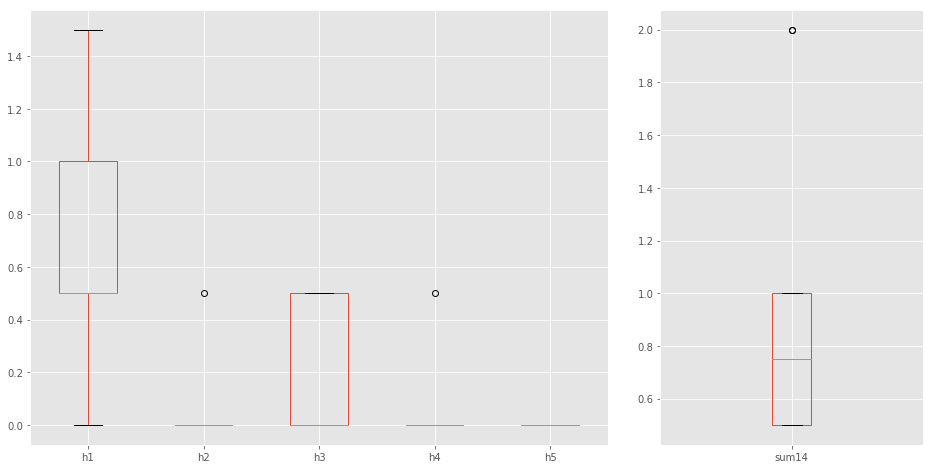

### Results for Wide Receiver, Practice Type: Scrimmage

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.0,0.5,0.0,0.0,0.5
Median,0.0,0.0,0.5,0.0,0.0,0.5
75 Percentile,0.0,0.0,0.5,0.0,0.0,0.5


##### Box Plots

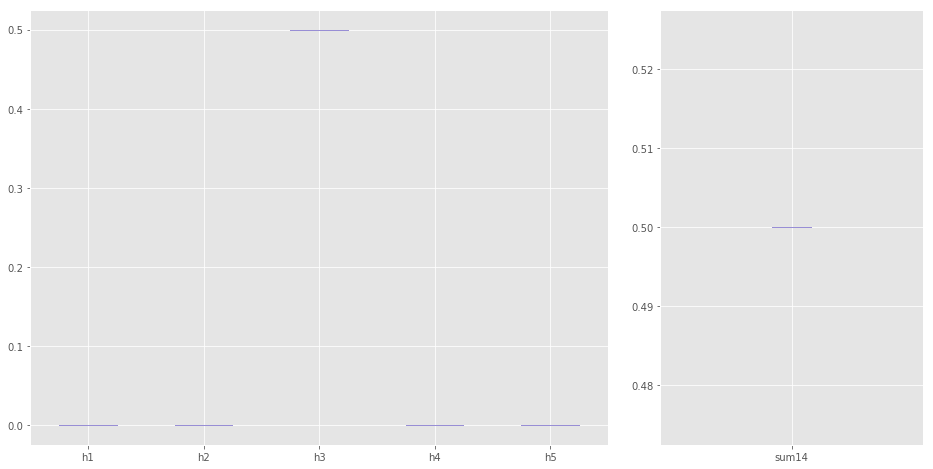

### Results for Wide Receiver, Practice Type: Thurs

  Number of Data Points: 7


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,1.5,0.0,0.00,0.00,0.0,1.5
Median,2.0,0.5,0.00,0.00,0.0,3.0
75 Percentile,3.0,3.0,0.25,0.25,0.0,6.5


##### Box Plots

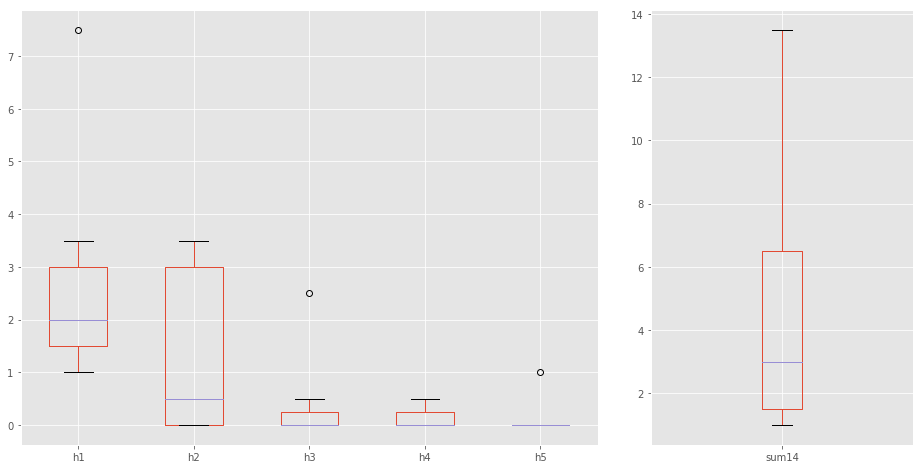

### Results for Wide Receiver, Practice Type: Tues

  Number of Data Points: 10


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.625,0.5,0.0,0.0,0.0,1.625
Median,1.750,1.0,0.5,0.0,0.0,3.000
75 Percentile,2.375,1.0,0.5,0.0,0.0,4.375


##### Box Plots

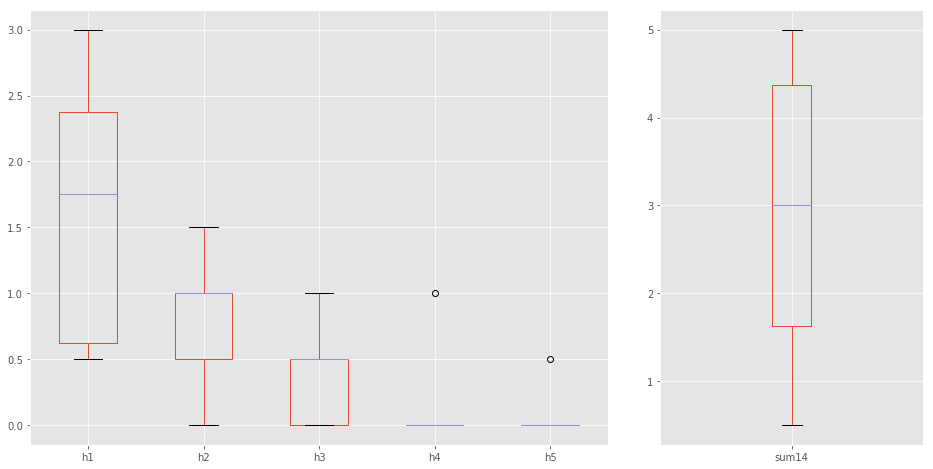

### Results for Wide Receiver, Practice Type: Wed

  Number of Data Points: 4


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.500,0.375,0.000,0.0,0.0,1.375
Median,1.000,0.750,0.000,0.0,0.0,1.750
75 Percentile,2.125,1.375,0.125,0.0,0.0,3.125


##### Box Plots

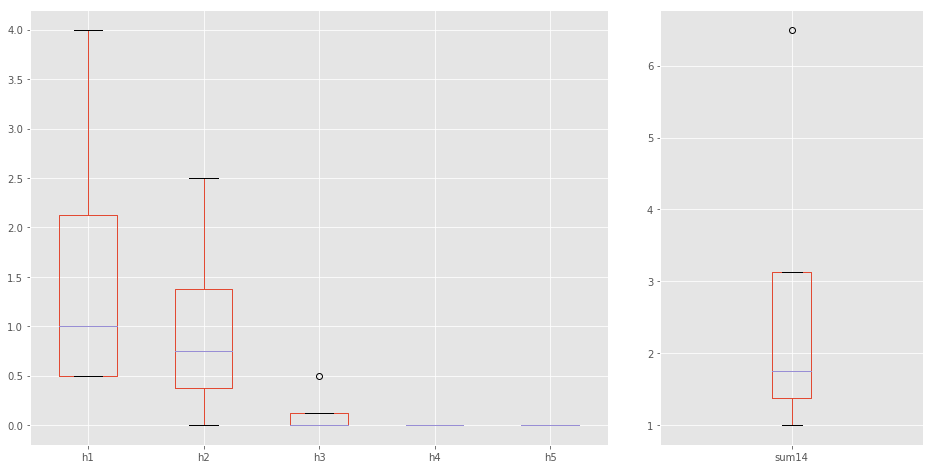

### Results for Wide Receiver, Practice Type: Wed/Thurs

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.0,1.0,0.0,0.0,0.5,3.0
Median,2.0,1.0,0.0,0.0,0.5,3.0
75 Percentile,2.0,1.0,0.0,0.0,0.5,3.0


##### Box Plots

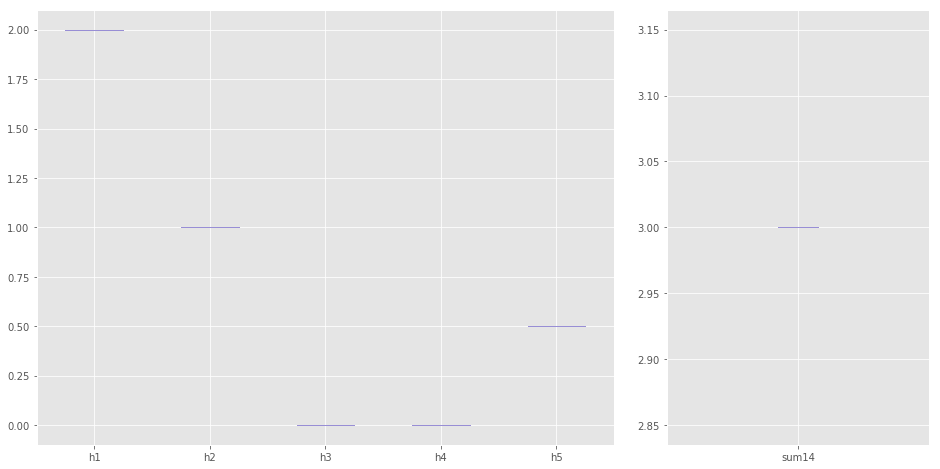

In [132]:
grps = (practices
         .groupby(['event', 'type', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
         .sum()
         .groupby(['player']))

for name, grp in grps:
    for n, g in grp.groupby('type'):
        printmd('### Results for {}, Practice Type: {}'.format(name.title(), n.title()))
        print('  Number of Data Points: {}'.format(g.shape[0]))
        #display(g)
        ## Give the median and interquartile ranges
        printmd('##### Interquartile and Median Values')
        dat = g.quantile([0.25, 0.50, 0.75])
        dat.index = pd.Index(['25 Percentile', 'Median', '75 Percentile'])
        display(dat)
        printmd('##### Box Plots')
        fig = plt.figure(figsize=(16, 8))
        plt.subplot2grid((1,3), (0,0), colspan=2)
        g[['h1', 'h2', 'h3', 'h4', 'h5']].boxplot()
        plt.subplot2grid((1,3), (0,2))
        g[['sum14']].boxplot()
        plt.show()

### Question 4: What is the exposure by practice activity across all positions?

This question is similar to question 3, only this time looking for exposure based on practice activity (skelly vs. def, 1on1, etc) instead of practice type (tues, wed, camp, etc) and looking at the data across all player positions. As such, we'll used the activity normalized data to answer this question. Similar to before, we'll group the data by practice and practice activity and sum the hits in each bin before regrouping by practice activity and taking the median value of all the practices.

In [133]:
(df_per_activity[df_per_activity.type != 'game']
          .groupby(['event', 'activity'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
          .sum()
          .groupby(['activity'])
          .aggregate(np.median))

,h1,h2,h3,h4,h5,sum14
activity,,,,,,
1on1,0.000000,0.125000,0.000000,0.000000,0.000000,0.250000
1on1 then scouts,0.571429,0.428571,0.142857,0.071429,0.142857,1.214286
cougar full zone,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
cub session,0.714286,0.142857,0.142857,0.000000,0.000000,1.000000
eagle run fit period,0.750000,0.250000,0.250000,0.250000,0.000000,1.500000
goal line,0.428571,0.142857,0.000000,0.000000,0.000000,0.571429
halfzone,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667
indy,0.720833,0.547222,0.111111,0.000000,0.000000,1.427778
inside,0.200000,0.600000,0.200000,0.000000,0.000000,1.500000


As you'll see below, there are a number of these practice activities that have very few (1 or 2) data points. We may want to not report data for these particular activities. If you all want to tell me what a reasonable threshold would be, I can remove that data. Let me know what you want to do.

### Results for 1On1

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0000,0.000,0.0000,0.0,0.0,0.2500
Median,0.0000,0.125,0.0000,0.0,0.0,0.2500
75 Percentile,0.1875,0.250,0.1875,0.0,0.0,0.4375


##### Box Plots

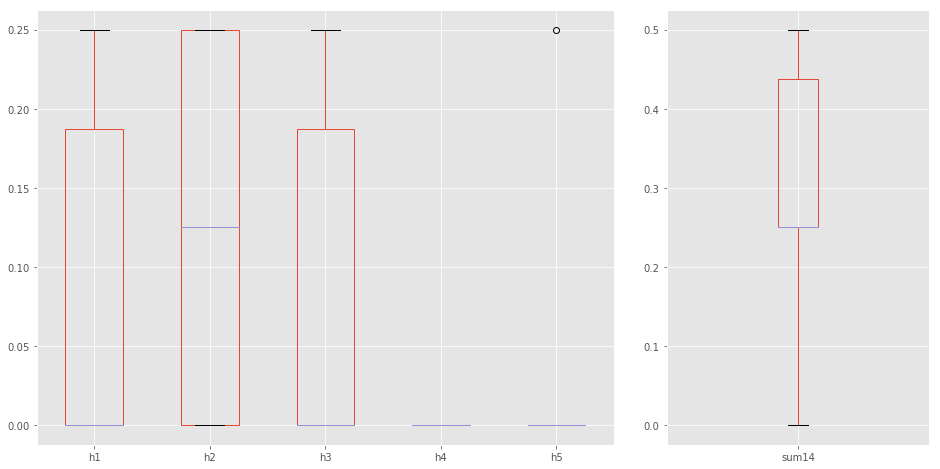

### Results for 1On1 Then Scouts

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.500000,0.357143,0.142857,0.035714,0.071429,1.178571
Median,0.571429,0.428571,0.142857,0.071429,0.142857,1.214286
75 Percentile,0.642857,0.500000,0.142857,0.107143,0.214286,1.250000


##### Box Plots

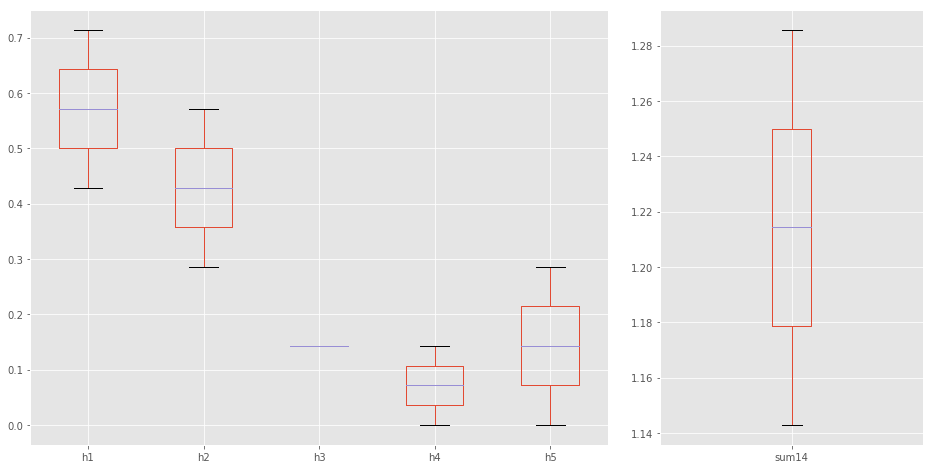

### Results for Cougar Full Zone

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.333333,0.0,0.0,0.0,0.0,0.333333
Median,0.333333,0.0,0.0,0.0,0.0,0.333333
75 Percentile,0.333333,0.0,0.0,0.0,0.0,0.333333


##### Box Plots

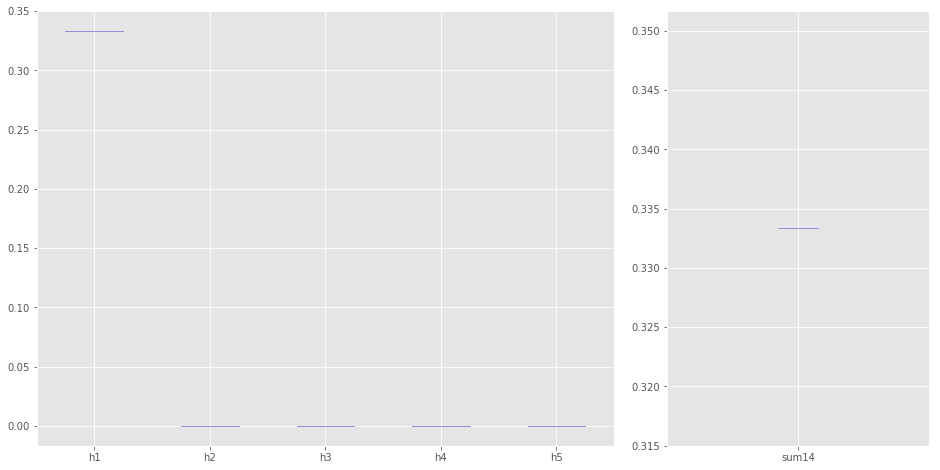

### Results for Cub Session

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.714286,0.142857,0.142857,0.0,0.0,1.0
Median,0.714286,0.142857,0.142857,0.0,0.0,1.0
75 Percentile,0.714286,0.142857,0.142857,0.0,0.0,1.0


##### Box Plots

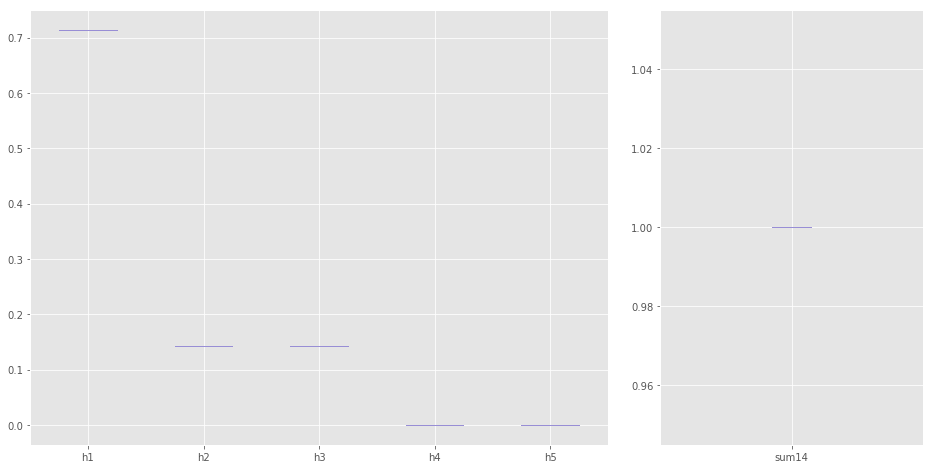

### Results for Eagle Run Fit Period

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.75,0.25,0.25,0.25,0.0,1.5
Median,0.75,0.25,0.25,0.25,0.0,1.5
75 Percentile,0.75,0.25,0.25,0.25,0.0,1.5


##### Box Plots

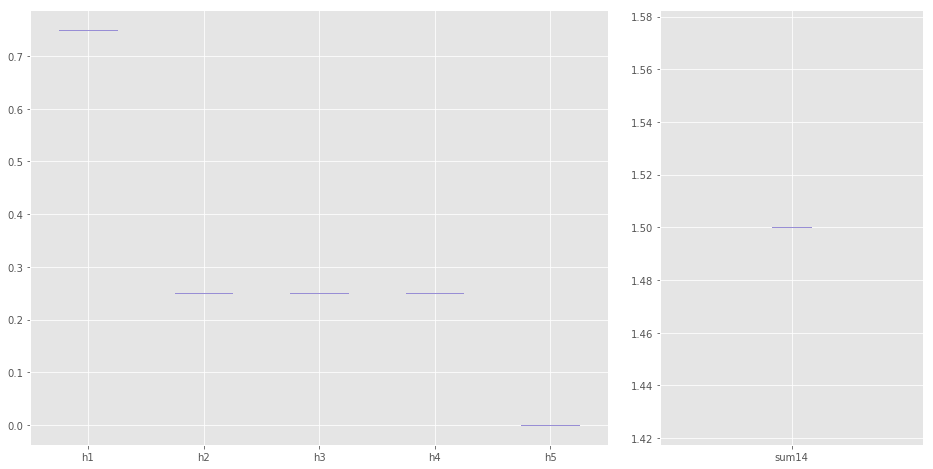

### Results for Goal Line

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.428571,0.142857,0.0,0.0,0.0,0.571429
Median,0.428571,0.142857,0.0,0.0,0.0,0.571429
75 Percentile,0.428571,0.142857,0.0,0.0,0.0,0.571429


##### Box Plots

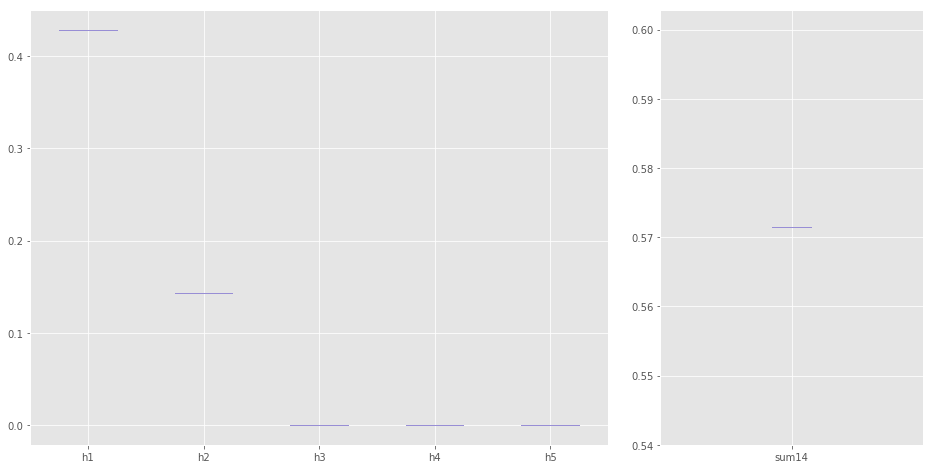

### Results for Halfzone

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.0,0.166667,0.0,0.0,0.166667
Median,0.0,0.0,0.166667,0.0,0.0,0.166667
75 Percentile,0.0,0.0,0.166667,0.0,0.0,0.166667


##### Box Plots

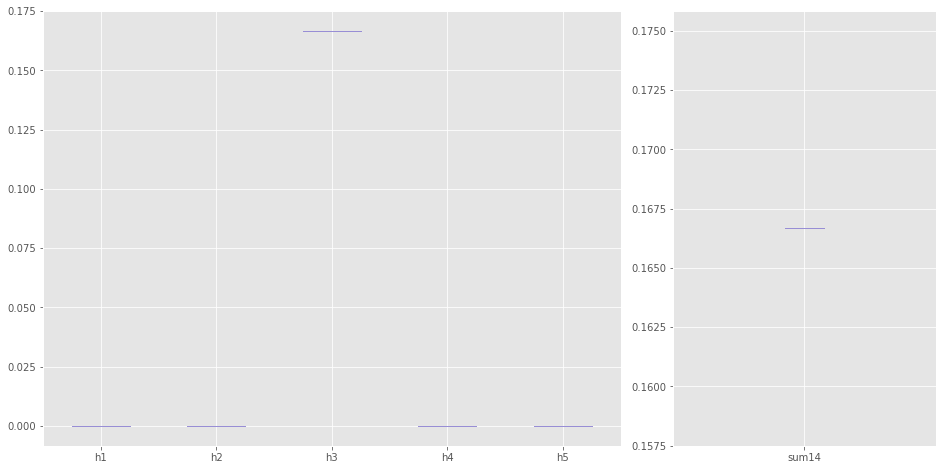

### Results for Indy

  Number of Data Points: 54


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.411111,0.229167,0.000000,0.000,0.0,0.687500
Median,0.720833,0.547222,0.111111,0.000,0.0,1.427778
75 Percentile,1.325000,0.833333,0.352679,0.075,0.0,2.812500


##### Box Plots

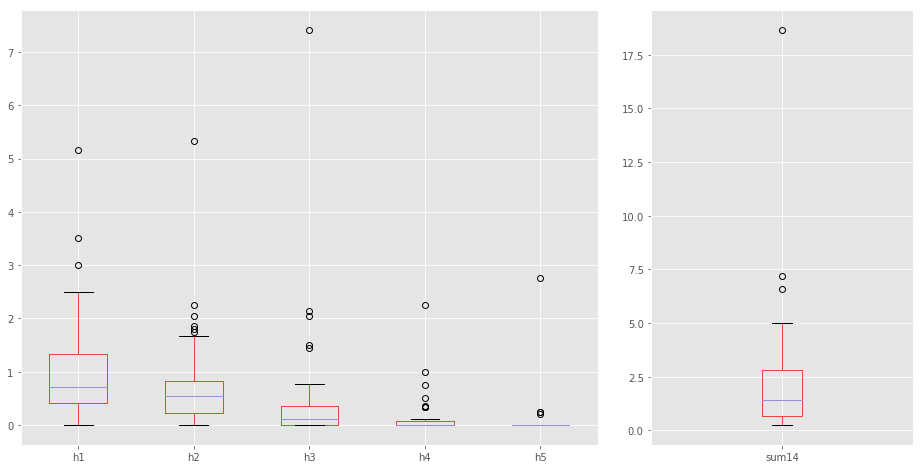

### Results for Inside

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.166667,0.333333,0.0,0.0,0.0,1.0
Median,0.200000,0.600000,0.2,0.0,0.0,1.5
75 Percentile,0.600000,0.800000,0.4,0.0,0.0,1.6


##### Box Plots

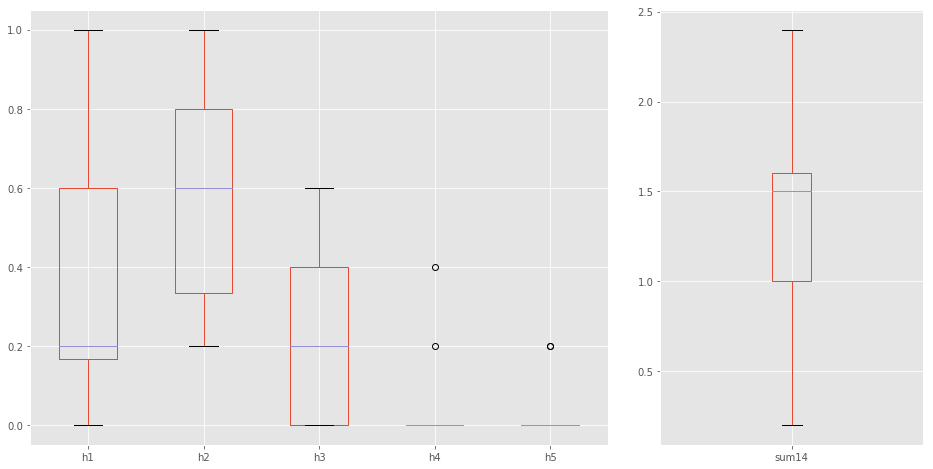

### Results for Inside Emphasis

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.142857,0.0,0.0,0.0,0.142857
Median,0.0,0.142857,0.0,0.0,0.0,0.142857
75 Percentile,0.0,0.142857,0.0,0.0,0.0,0.142857


##### Box Plots

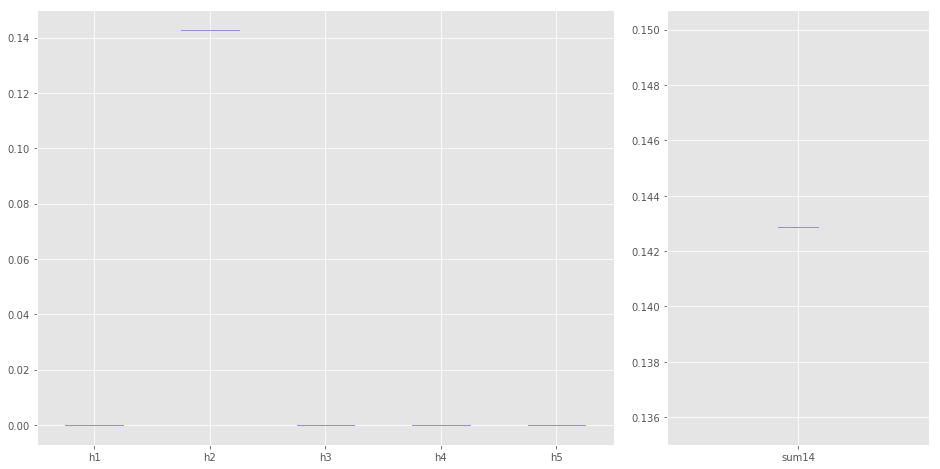

### Results for Inside/1On1

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.3,0.200000,0.100000,0.0,0.0,0.6
Median,0.4,0.400000,0.111111,0.0,0.0,1.0
75 Percentile,0.5,0.444444,0.400000,0.0,0.0,1.4


##### Box Plots

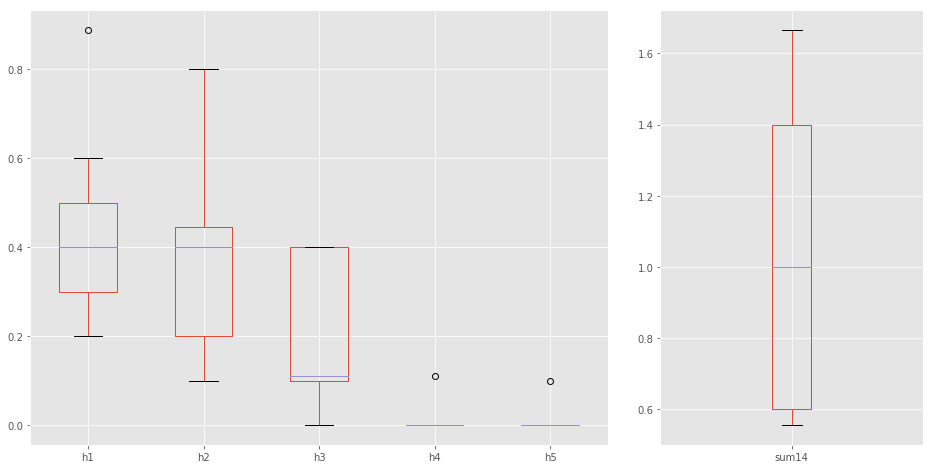

### Results for Kick Off

  Number of Data Points: 9


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.000000,0.000000,0.0,0.0,0.0,0.166667
Median,0.166667,0.166667,0.0,0.0,0.0,0.250000
75 Percentile,0.500000,0.250000,0.0,0.0,0.0,1.000000


##### Box Plots

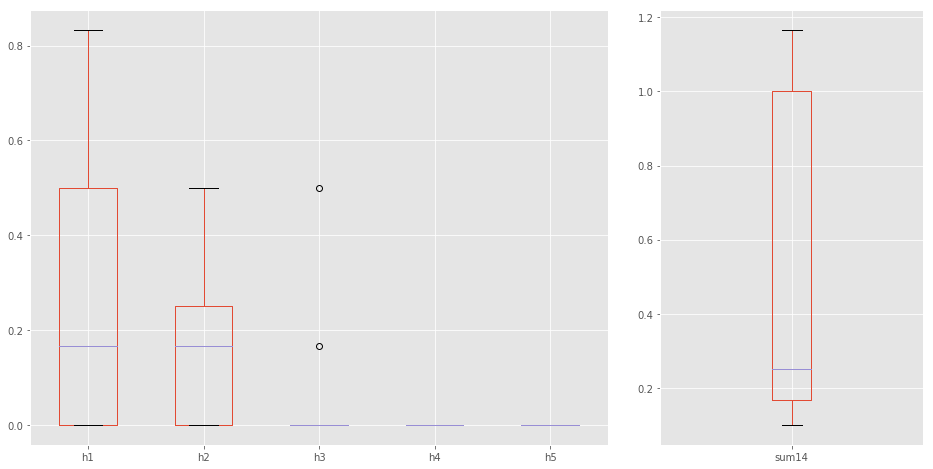

### Results for Kickoff

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.041667,0.0,0.00,0.0,0.0,0.2
Median,0.183333,0.1,0.00,0.0,0.0,0.2
75 Percentile,0.200000,0.2,0.15,0.0,0.0,0.5


##### Box Plots

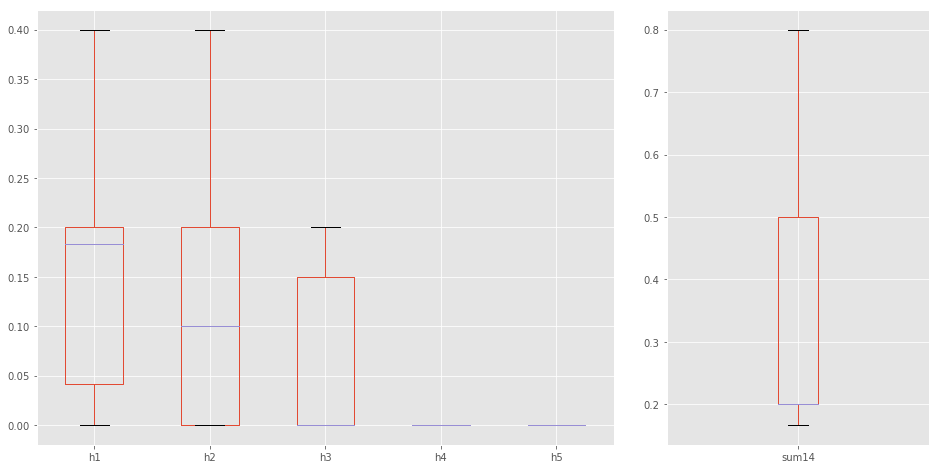

### Results for Kor

  Number of Data Points: 11


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.183333,0.000000,0.0,0.0,0.0,0.291667
Median,0.333333,0.000000,0.0,0.0,0.0,0.333333
75 Percentile,0.516667,0.266667,0.0,0.0,0.0,0.875000


##### Box Plots

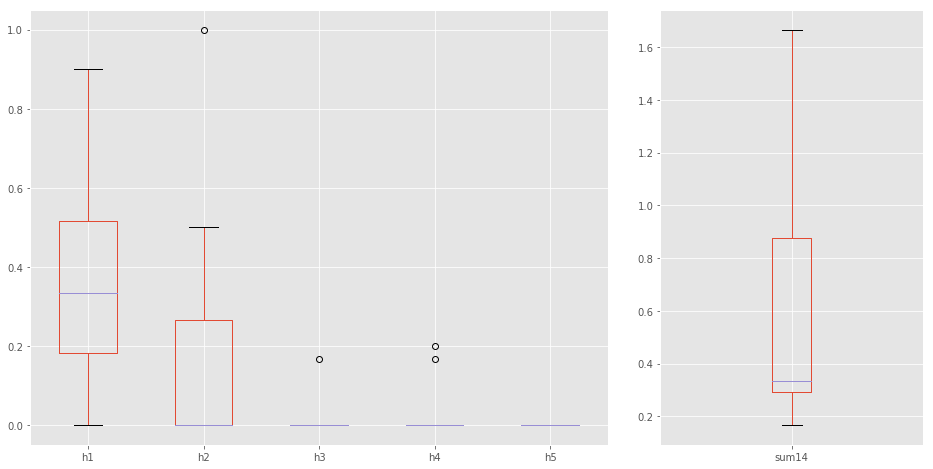

### Results for Line Games

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.166667,0.0,0.0,0.083333,0.0,0.416667
Median,0.333333,0.0,0.0,0.166667,0.0,0.500000
75 Percentile,0.500000,0.0,0.0,0.250000,0.0,0.583333


##### Box Plots

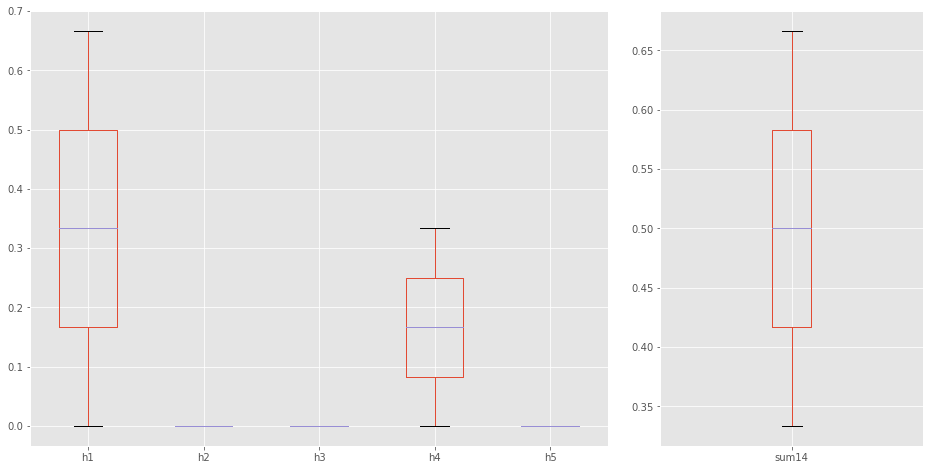

### Results for Mix Session

  Number of Data Points: 4


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.410714,0.383333,0.107143,0.00,0.000000,0.928571
Median,0.500000,0.414286,0.221429,0.00,0.000000,1.150000
75 Percentile,0.541667,0.446429,0.300000,0.05,0.035714,1.325000


##### Box Plots

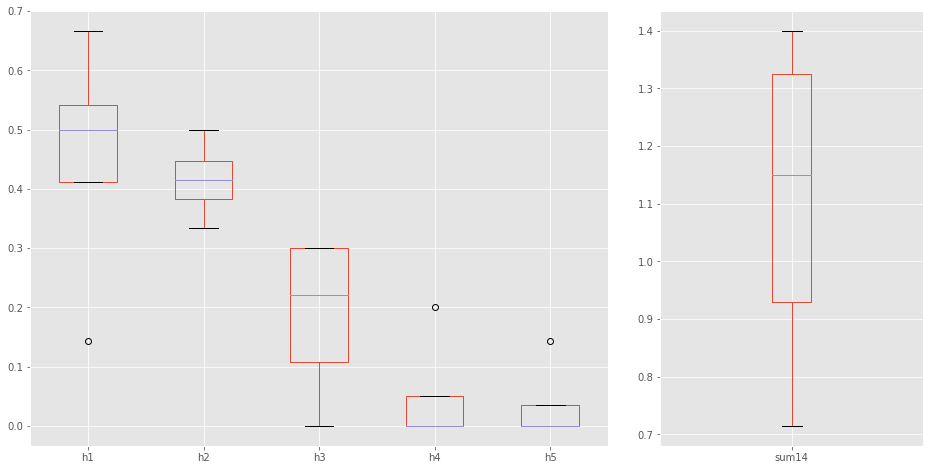

### Results for Otb

  Number of Data Points: 23


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.105556,0.000000,0.00,0.0,0.0,0.111111
Median,0.125000,0.000000,0.00,0.0,0.0,0.142857
75 Percentile,0.211111,0.111111,0.05,0.0,0.0,0.387500


##### Box Plots

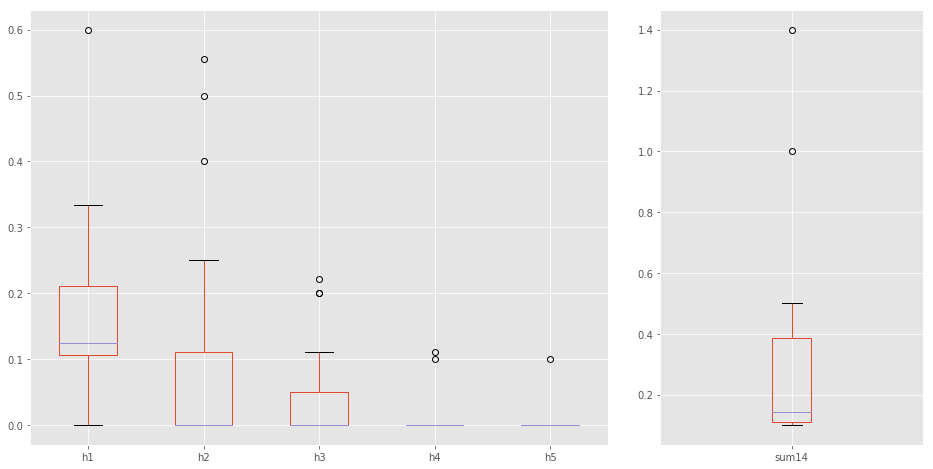

### Results for Pap

  Number of Data Points: 8


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.197917,0.111111,0.000000,0.000000,0.0,0.312500
Median,0.222222,0.173611,0.000000,0.055556,0.0,0.555556
75 Percentile,0.375000,0.241667,0.158333,0.133333,0.0,1.050000


##### Box Plots

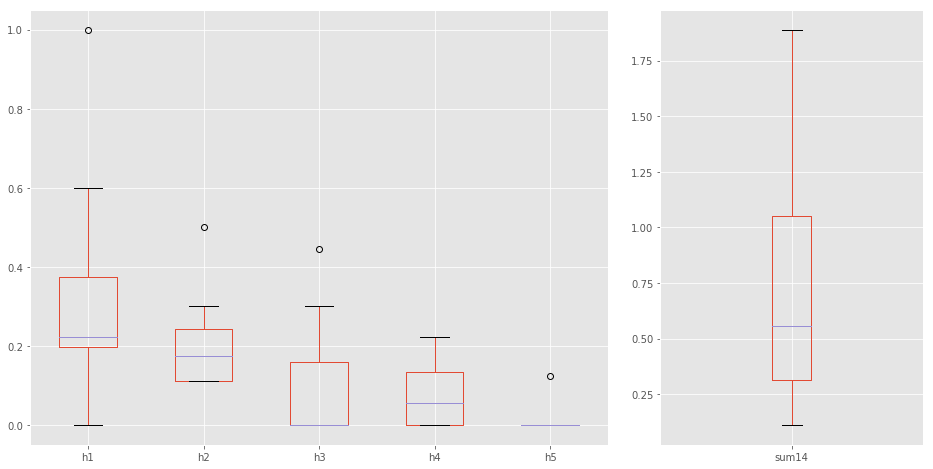

### Results for Pass Rush

  Number of Data Points: 29


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.333333,0.00,0.000000,0.0,0.0,0.333333
Median,0.333333,0.25,0.000000,0.0,0.0,0.750000
75 Percentile,0.750000,0.50,0.333333,0.0,0.0,1.500000


##### Box Plots

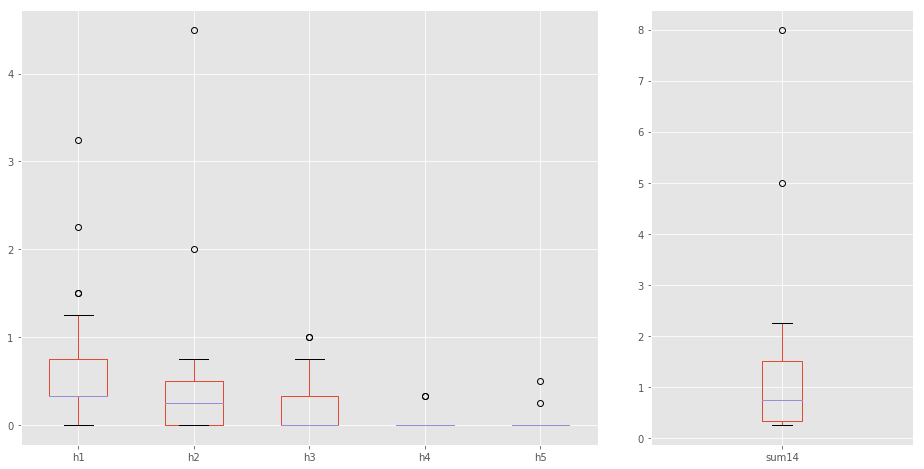

### Results for Pat/Fg

  Number of Data Points: 32


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.100000,0.000000,0.000,0.0,0.0,0.200000
Median,0.142857,0.118056,0.000,0.0,0.0,0.366667
75 Percentile,0.308333,0.285714,0.025,0.0,0.0,0.522222


##### Box Plots

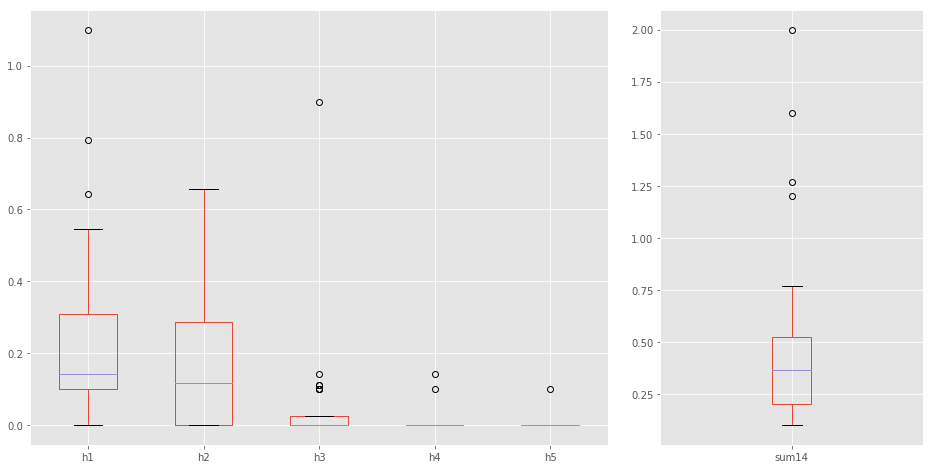

### Results for Perimeter Period

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.428571,0.0,0.285714,0.0,0.0,0.714286
Median,0.428571,0.0,0.285714,0.0,0.0,0.714286
75 Percentile,0.428571,0.0,0.285714,0.0,0.0,0.714286


##### Box Plots

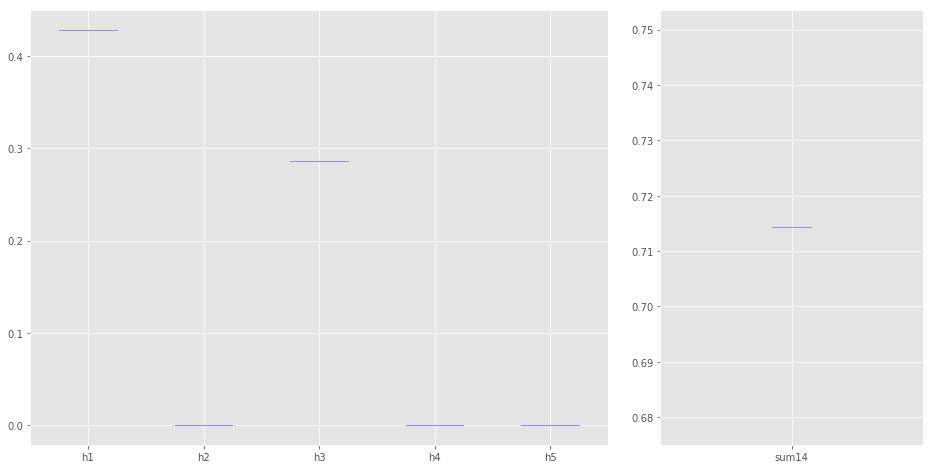

### Results for Post

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.102778,0.000000,0.0,0.0,0.0,0.133333
Median,0.155556,0.050000,0.0,0.0,0.0,0.200000
75 Percentile,0.200000,0.108333,0.0,0.0,0.0,0.275000


##### Box Plots

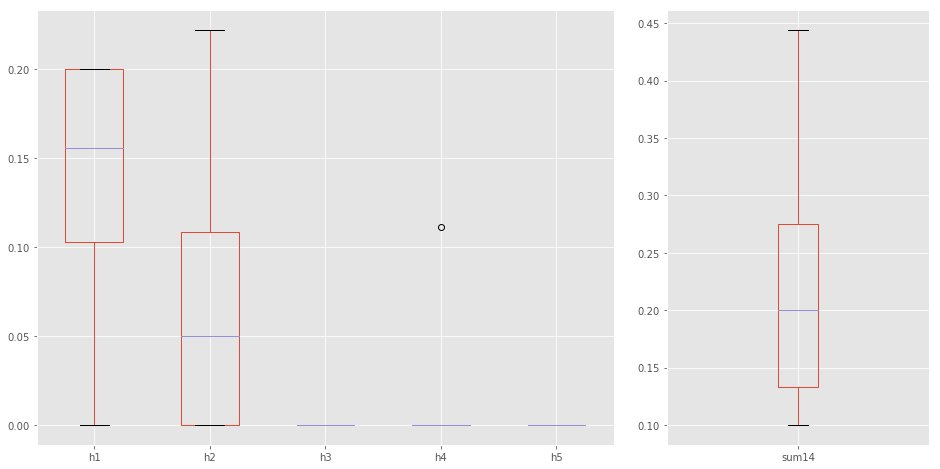

### Results for Post-Practice

  Number of Data Points: 8


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.09375,0.000000,0.0000,0.00000,0.00000,0.2500
Median,0.37500,0.125000,0.0625,0.00000,0.00000,0.6875
75 Percentile,0.87500,0.258929,0.2500,0.03125,0.03125,1.0000


##### Box Plots

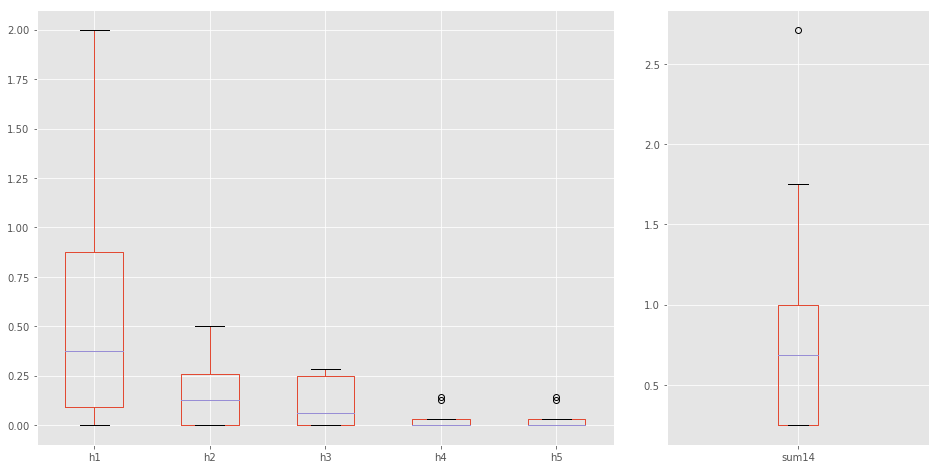

### Results for Post-Practice/Kick Off

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.1,0.025,0.0,0.0,0.0,0.125
Median,0.1,0.050,0.0,0.0,0.0,0.150
75 Percentile,0.1,0.075,0.0,0.0,0.0,0.175


##### Box Plots

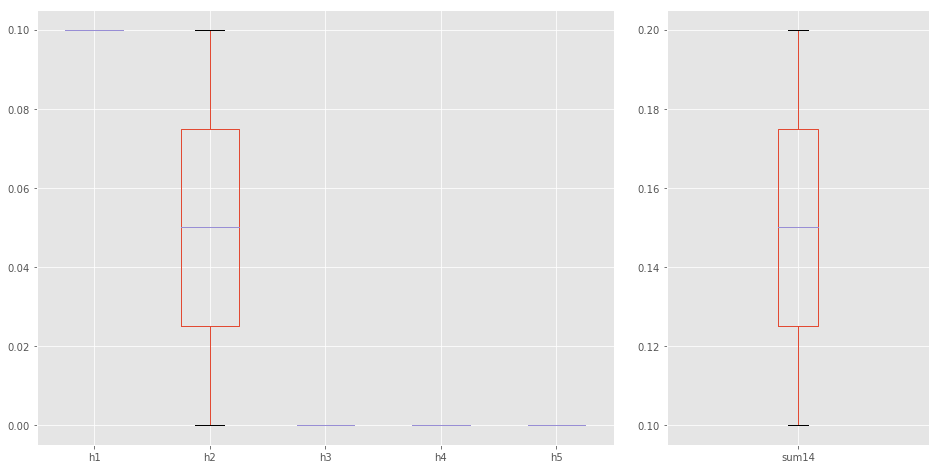

### Results for Post-Practice/Kickoff

  Number of Data Points: 4


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.111111,0.000000,0.000000,0.000000,0.0,0.111111
Median,0.205556,0.083333,0.000000,0.050000,0.0,0.455556
75 Percentile,0.308333,0.225000,0.041667,0.116667,0.0,0.808333


##### Box Plots

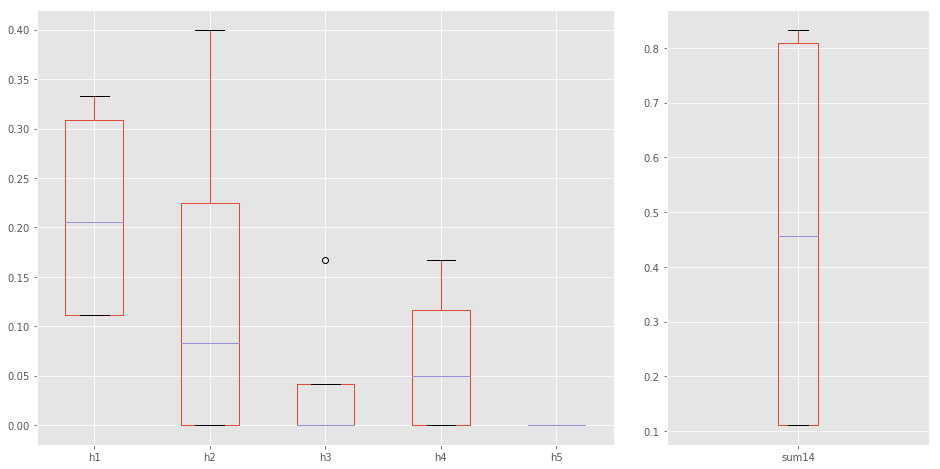

### Results for Post-Practice/Kor

  Number of Data Points: 6


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.138889,0.0,0.0,0.0,0.138889
Median,0.0,0.253968,0.0,0.0,0.0,0.253968
75 Percentile,0.0,0.321429,0.0,0.0,0.0,0.321429


##### Box Plots

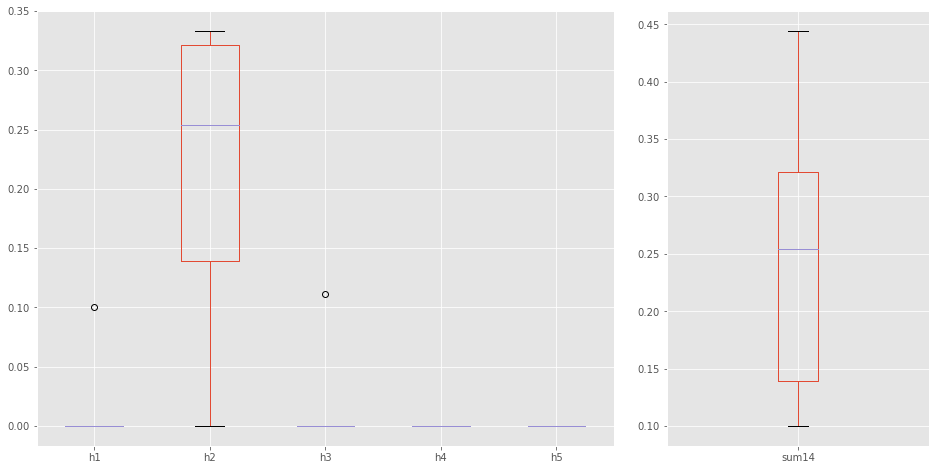

### Results for Post-Practice/Punt Return

  Number of Data Points: 10


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.162698,0.025000,0.00000,0.0,0.0,0.178571
Median,0.292857,0.105556,0.00000,0.0,0.0,0.400000
75 Percentile,0.348810,0.138393,0.09375,0.0,0.0,0.636905


##### Box Plots

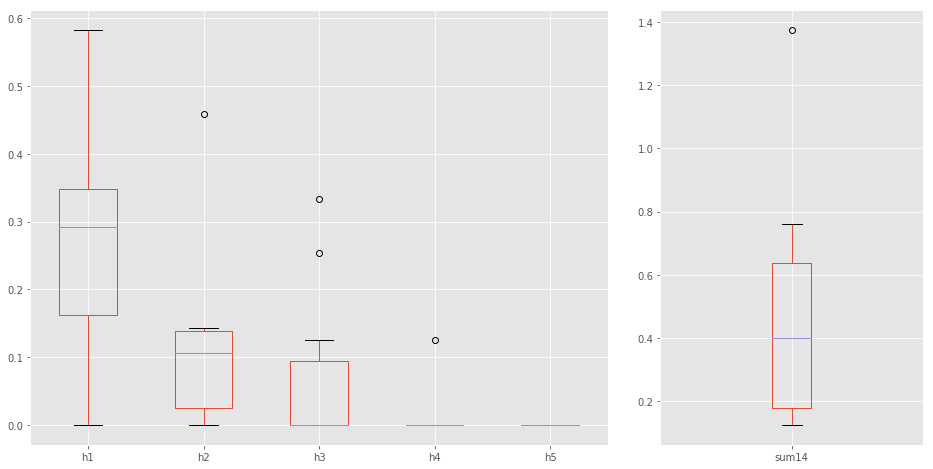

### Results for Post-Practice/Punt Team

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.116667,0.041667,0.041667,0.0,0.0,0.283333
Median,0.233333,0.083333,0.083333,0.0,0.0,0.400000
75 Percentile,0.350000,0.125000,0.125000,0.0,0.0,0.516667


##### Box Plots

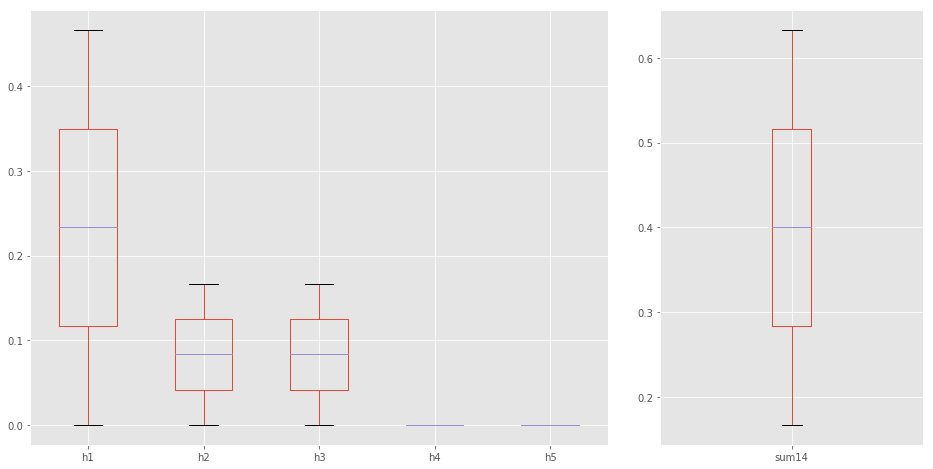

### Results for Post-Practice/Turn Over

  Number of Data Points: 4


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.075000,0.075000,0.000000,0.0,0.0,0.175000
Median,0.105556,0.161111,0.050000,0.0,0.0,0.266667
75 Percentile,0.138889,0.222222,0.102778,0.0,0.0,0.388889


##### Box Plots

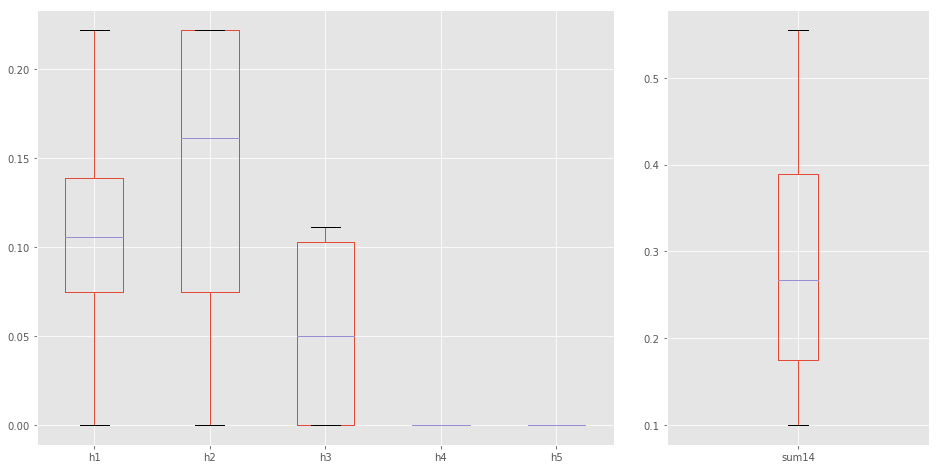

### Results for Pre

  Number of Data Points: 37


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.211111,0.000000,0.0,0.0,0.0,0.211111
Median,0.365079,0.100000,0.0,0.0,0.0,0.476190
75 Percentile,0.600000,0.222222,0.1,0.0,0.0,0.809524


##### Box Plots

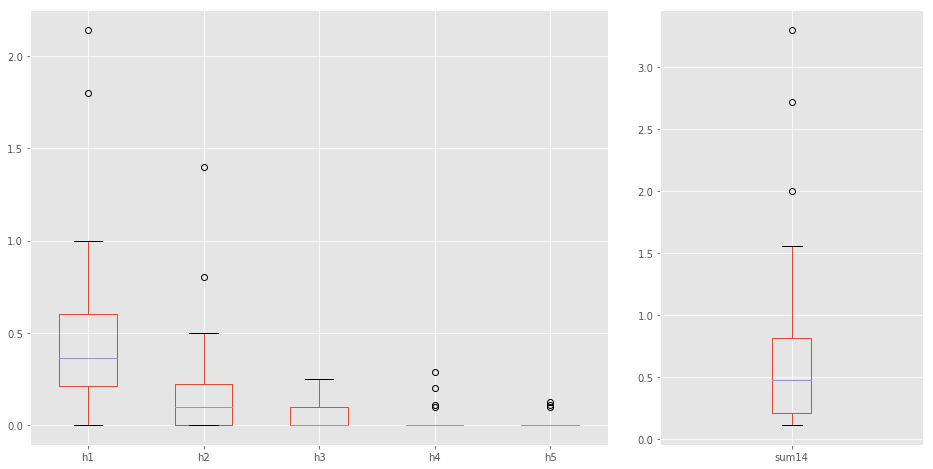

### Results for Punt

  Number of Data Points: 17


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.000000,0.166667,0.0,0.0,0.0,0.250000
Median,0.200000,0.250000,0.0,0.0,0.0,0.366667
75 Percentile,0.833333,0.333333,0.0,0.0,0.0,1.166667


##### Box Plots

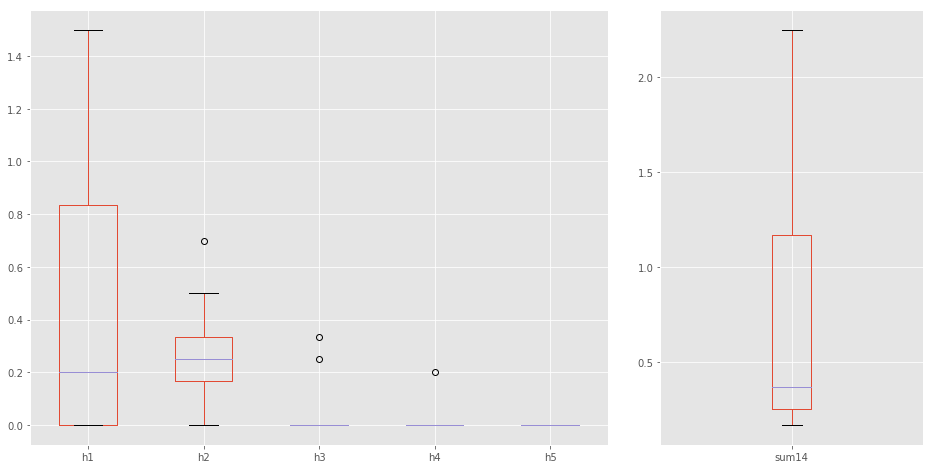

### Results for Punt Return

  Number of Data Points: 5


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.333333,0.0,0.0,0.0,0.0,0.333333
Median,0.400000,0.0,0.0,0.0,0.0,0.400000
75 Percentile,0.400000,0.0,0.0,0.0,0.0,0.800000


##### Box Plots

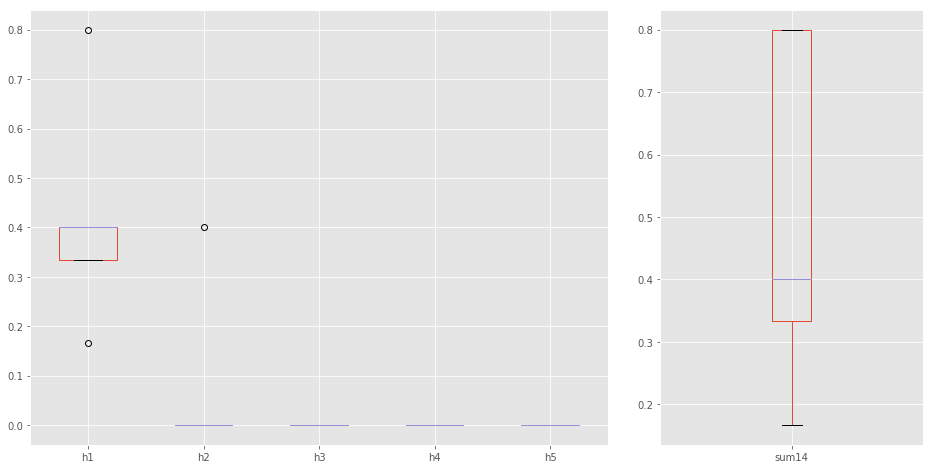

### Results for Red Zone Skell Vs. Scouts

  Number of Data Points: 7


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.208333,0.00,0.0,0.0,0.0,0.291667
Median,0.250000,0.00,0.0,0.0,0.0,0.500000
75 Percentile,0.450000,0.25,0.0,0.0,0.0,0.650000


##### Box Plots

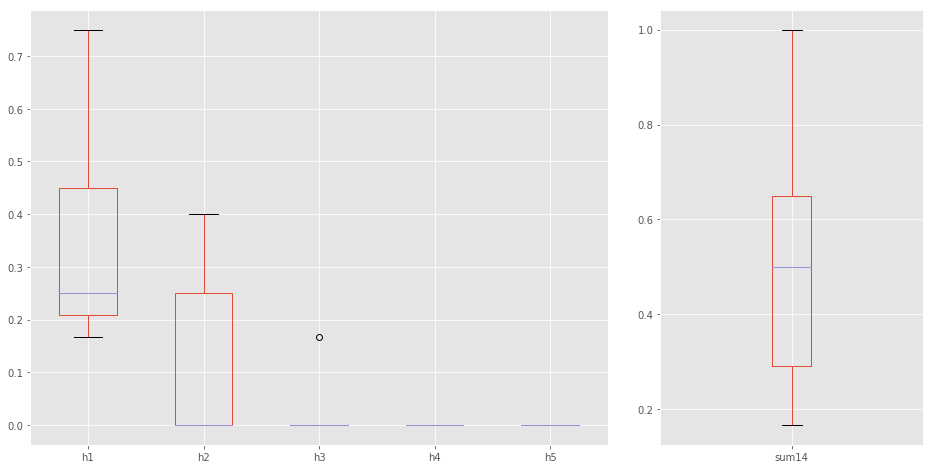

### Results for Run Fit

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.190476,0.0,0.0,0.035714,0.0,0.226190
Median,0.269841,0.0,0.0,0.071429,0.0,0.341270
75 Percentile,0.349206,0.0,0.0,0.107143,0.0,0.456349


##### Box Plots

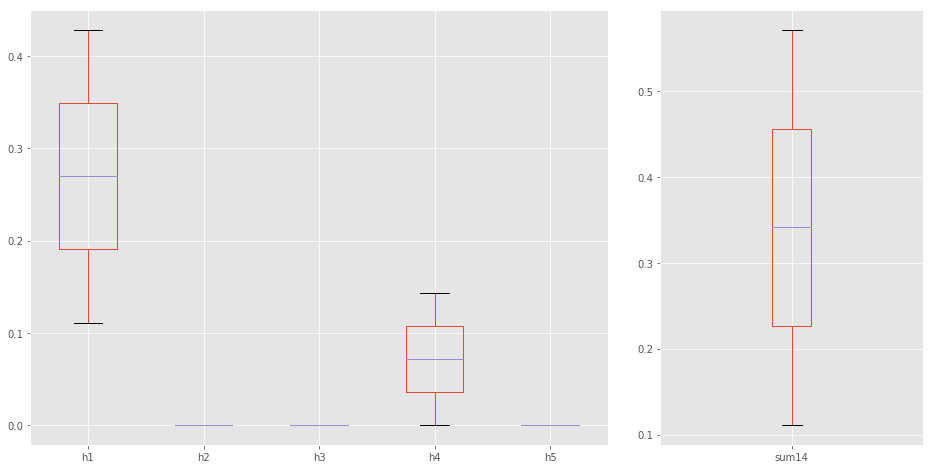

### Results for Run Fits

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.2,0.2,0.2,0.2,0.0,0.8
Median,0.2,0.2,0.2,0.2,0.0,0.8
75 Percentile,0.2,0.2,0.2,0.2,0.0,0.8


##### Box Plots

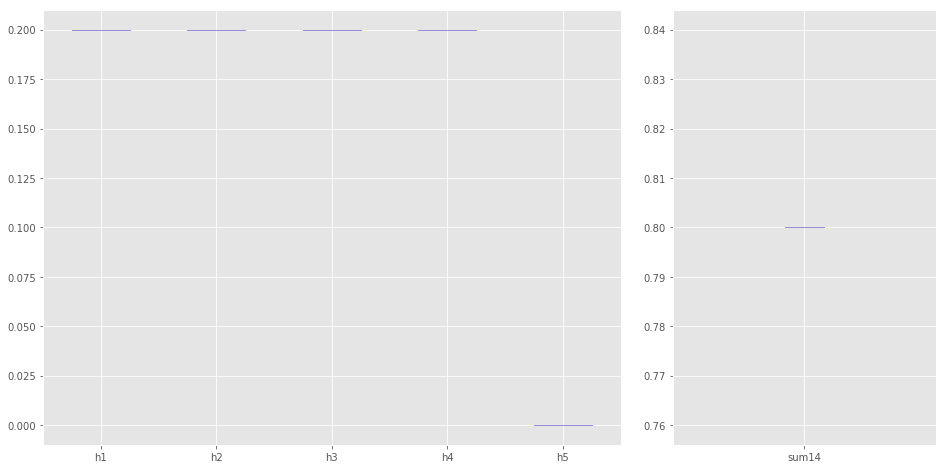

### Results for Run Pursuit

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.027778,0.111111,0.0,0.0,0.0,0.138889
Median,0.055556,0.111111,0.0,0.0,0.0,0.166667
75 Percentile,0.083333,0.111111,0.0,0.0,0.0,0.194444


##### Box Plots

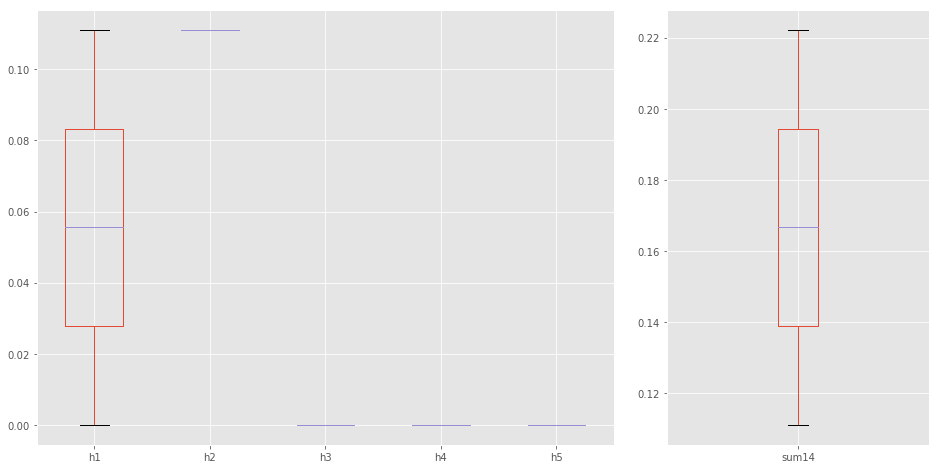

### Results for Run Session

  Number of Data Points: 21


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.285714,0.142857,0.000000,0.0,0.0,0.571429
Median,0.428571,0.222222,0.142857,0.0,0.0,1.000000
75 Percentile,0.714286,0.300000,0.285714,0.0,0.0,1.142857


##### Box Plots

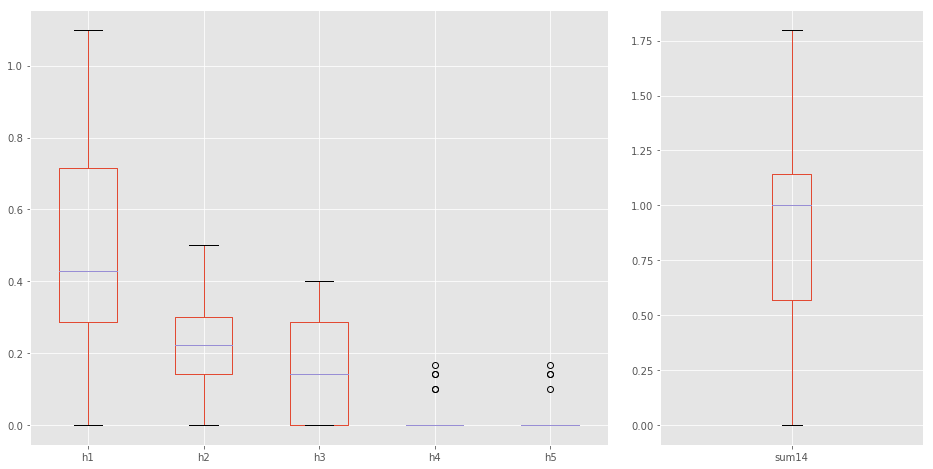

### Results for Run Session  Vs. Scouts

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.25,0.0,0.0,0.0,0.0,0.25
Median,0.25,0.0,0.0,0.0,0.0,0.25
75 Percentile,0.25,0.0,0.0,0.0,0.0,0.25


##### Box Plots

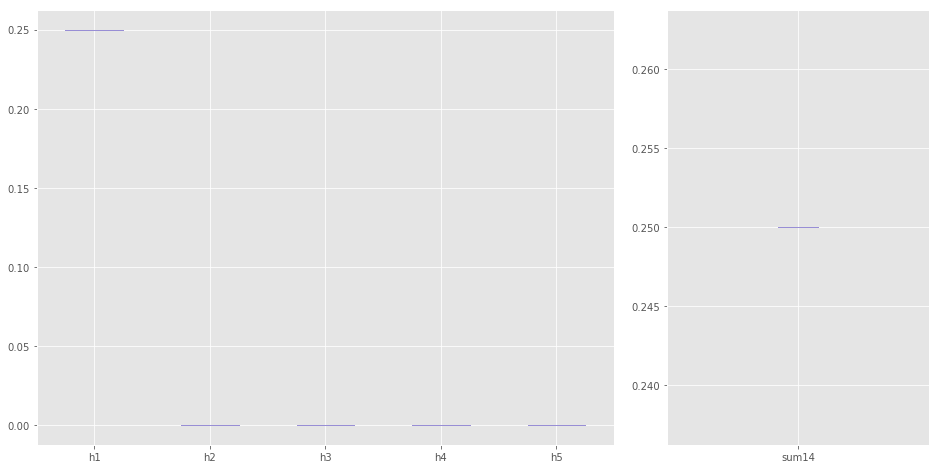

### Results for Run Session Vs. Scouts

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.175,0.175,0.0,0.025,0.025,0.375
Median,0.250,0.250,0.0,0.050,0.050,0.550
75 Percentile,0.325,0.325,0.0,0.075,0.075,0.725


##### Box Plots

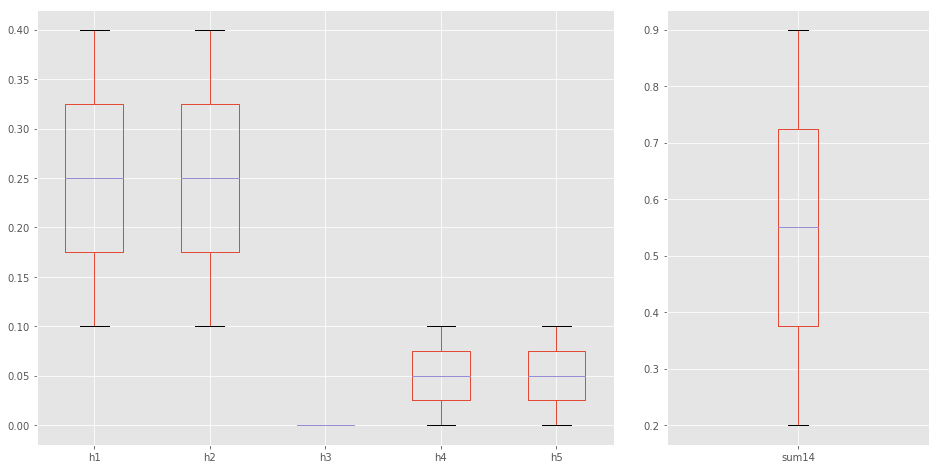

### Results for Run Session-Blitz

  Number of Data Points: 21


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.200000,0.222222,0.000000,0.000,0.0,0.666667
Median,0.333333,0.333333,0.222222,0.000,0.0,0.875000
75 Percentile,0.375000,0.444444,0.428571,0.125,0.0,1.428571


##### Box Plots

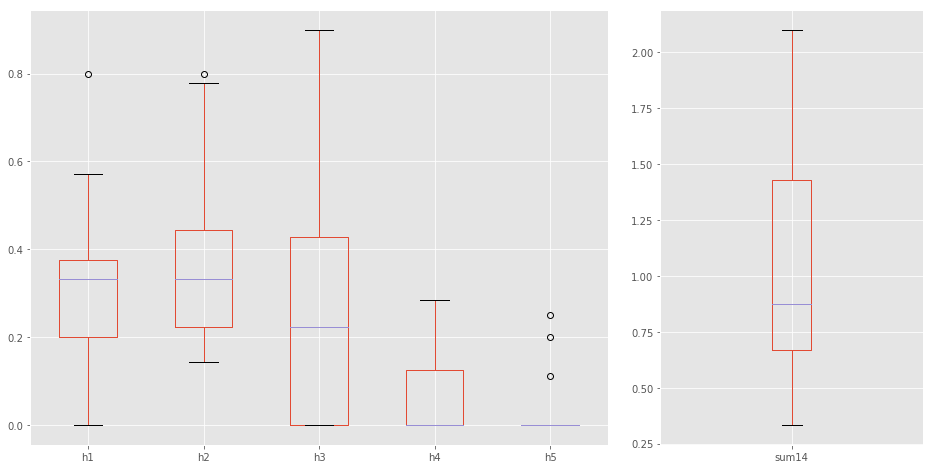

### Results for Scrimmage

  Number of Data Points: 3


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,2.505556,1.238889,0.650000,0.111111,0.00,4.505556
Median,3.111111,1.777778,1.000000,0.222222,0.00,6.111111
75 Percentile,3.838889,2.322222,1.144444,0.383333,0.05,7.688889


##### Box Plots

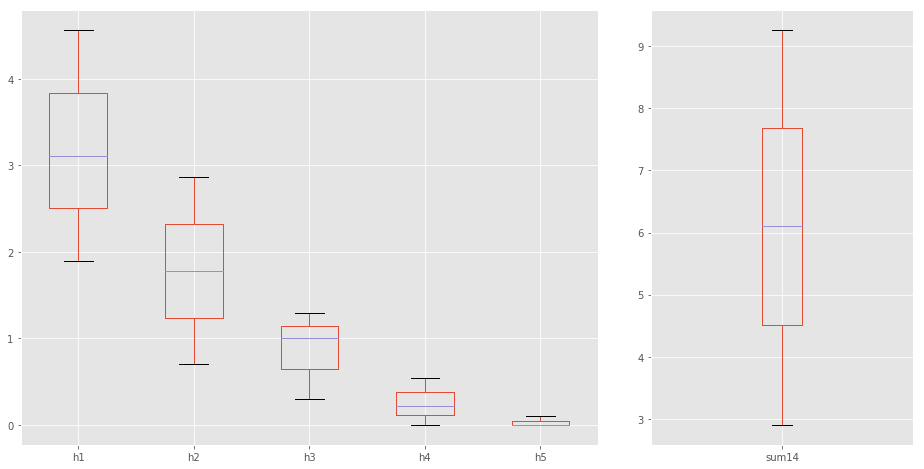

### Results for Skell Vs. Def

  Number of Data Points: 19


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.100000,0.000000,0.0,0.00,0.0,0.300000
Median,0.200000,0.111111,0.1,0.00,0.0,0.444444
75 Percentile,0.333333,0.200000,0.2,0.05,0.0,0.750000


##### Box Plots

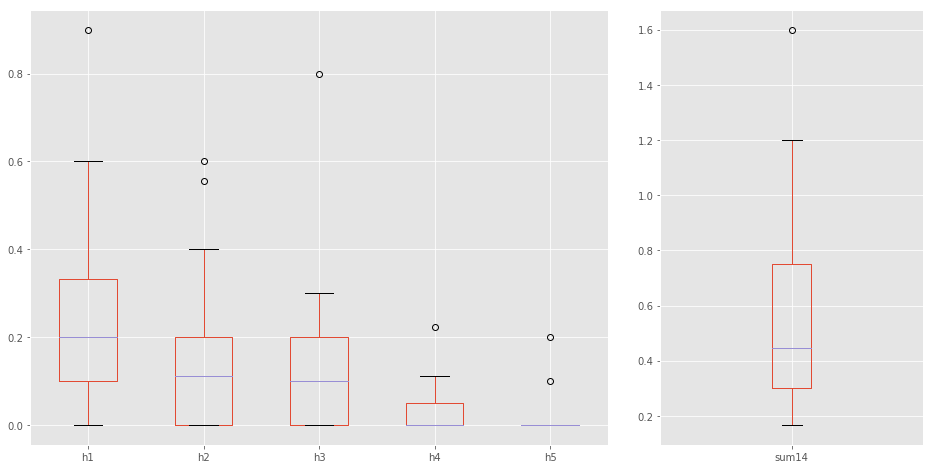

### Results for Skell Vs. Offense

  Number of Data Points: 19


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.083333,0.000000,0.00,0.0,0.0,0.291667
Median,0.166667,0.166667,0.00,0.0,0.0,0.500000
75 Percentile,0.333333,0.366667,0.25,0.0,0.0,0.750000


##### Box Plots

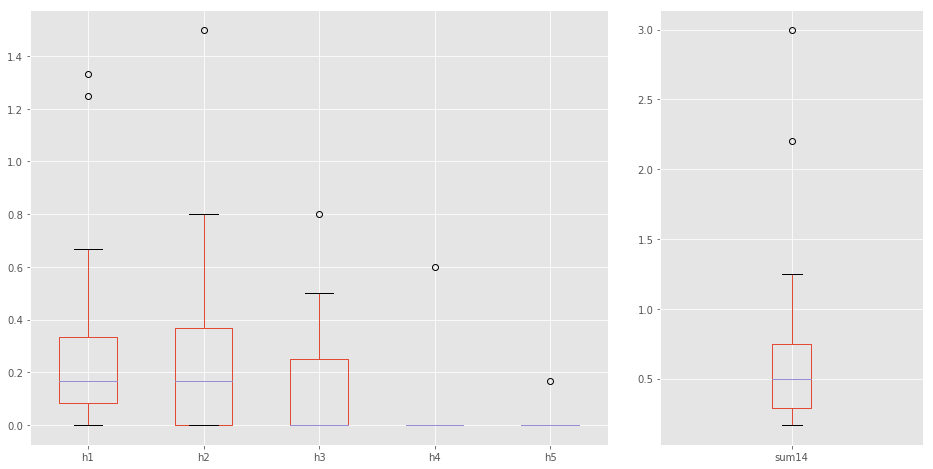

### Results for Skell Vs. Scouts

  Number of Data Points: 28


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.166667,0.125000,0.000000,0.0,0.000000,0.575000
Median,0.291667,0.250000,0.183333,0.0,0.000000,0.841667
75 Percentile,0.462500,0.666667,0.350000,0.2,0.041667,1.650000


##### Box Plots

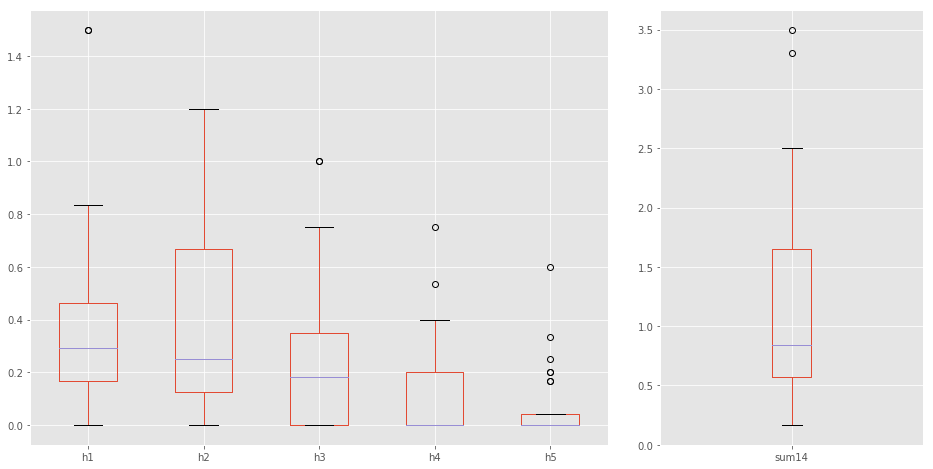

### Results for Team (3'S)

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.25,0.5,0.25,0.0,1.0
Median,0.0,0.25,0.5,0.25,0.0,1.0
75 Percentile,0.0,0.25,0.5,0.25,0.0,1.0


##### Box Plots

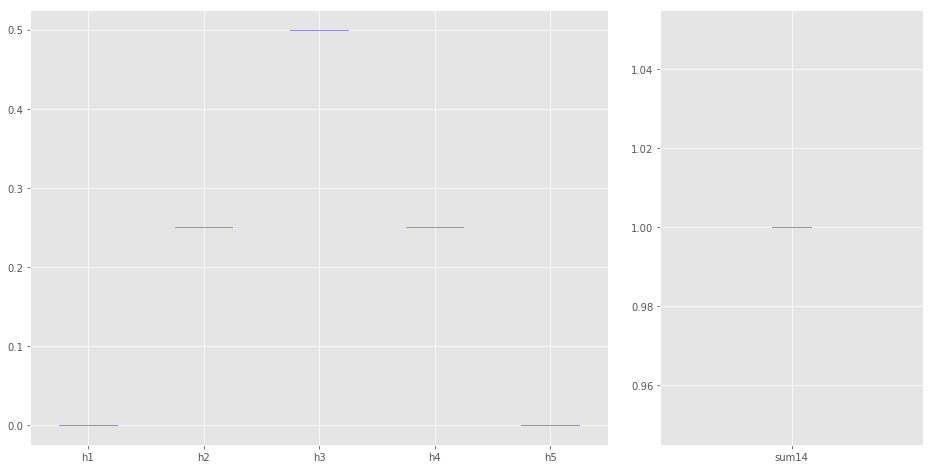

### Results for Team Situation

  Number of Data Points: 25


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.291667,0.111111,0.000000,0.0,0.0,0.650794
Median,0.507937,0.322222,0.111111,0.0,0.0,0.800000
75 Percentile,0.722222,0.500000,0.222222,0.0,0.0,1.366667


##### Box Plots

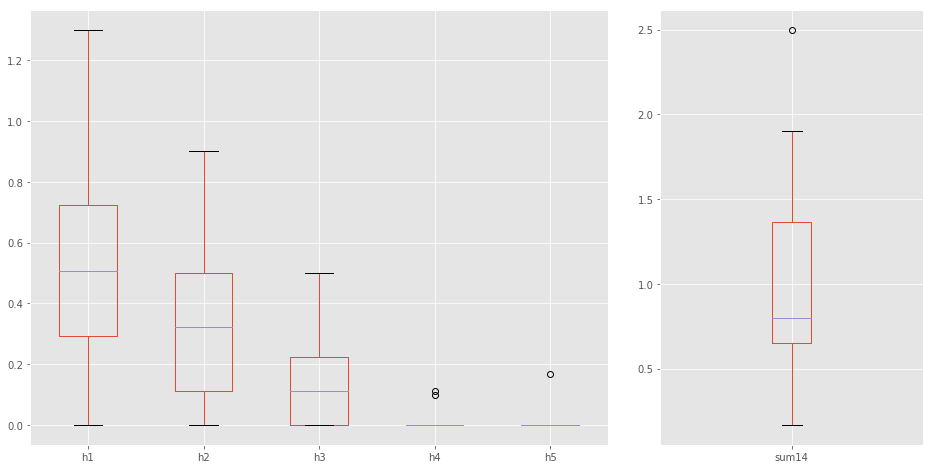

### Results for Team Vs. 3'S

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.166667,0.333333,0.0,0.0,0.5
Median,0.0,0.166667,0.333333,0.0,0.0,0.5
75 Percentile,0.0,0.166667,0.333333,0.0,0.0,0.5


##### Box Plots

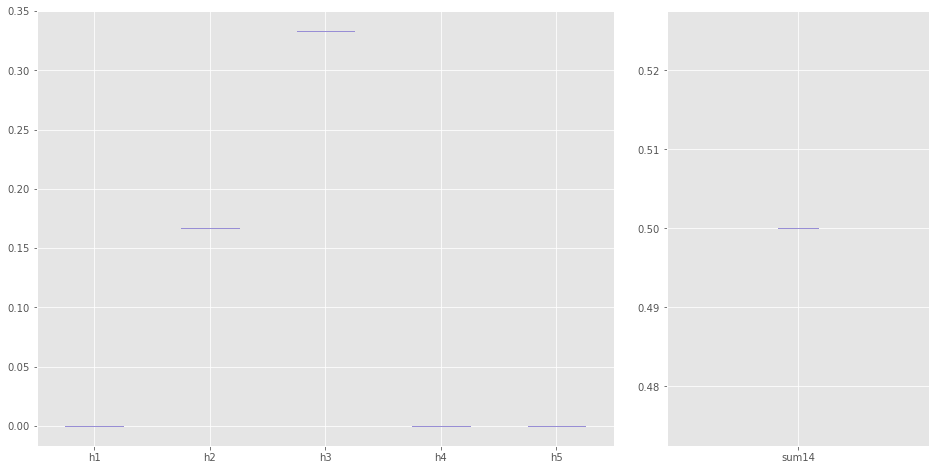

### Results for Team Vs. Def

  Number of Data Points: 11


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.950000,0.666667,0.277778,0.0,0.0,1.95
Median,1.111111,0.700000,0.400000,0.0,0.0,2.20
75 Percentile,1.316667,0.894444,0.500000,0.1,0.1,2.70


##### Box Plots

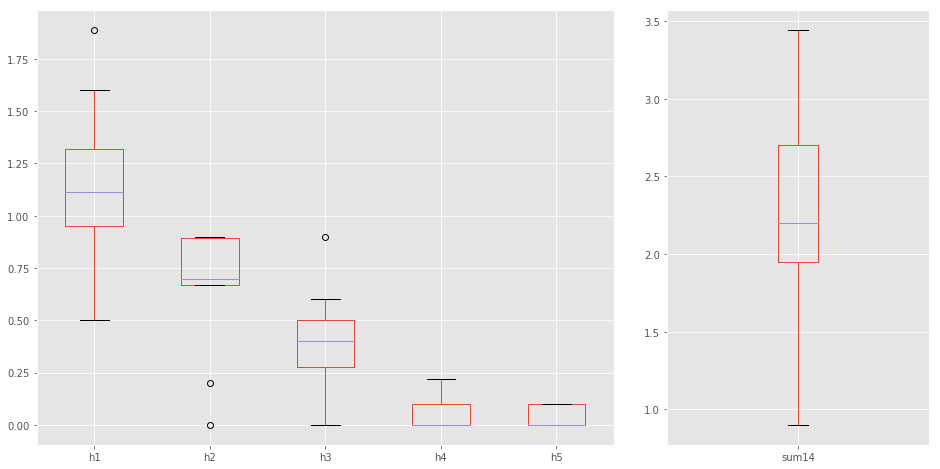

### Results for Team Vs. Defense

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.125,0.0,0.0,0.0,0.0,0.125
Median,0.125,0.0,0.0,0.0,0.0,0.125
75 Percentile,0.125,0.0,0.0,0.0,0.0,0.125


##### Box Plots

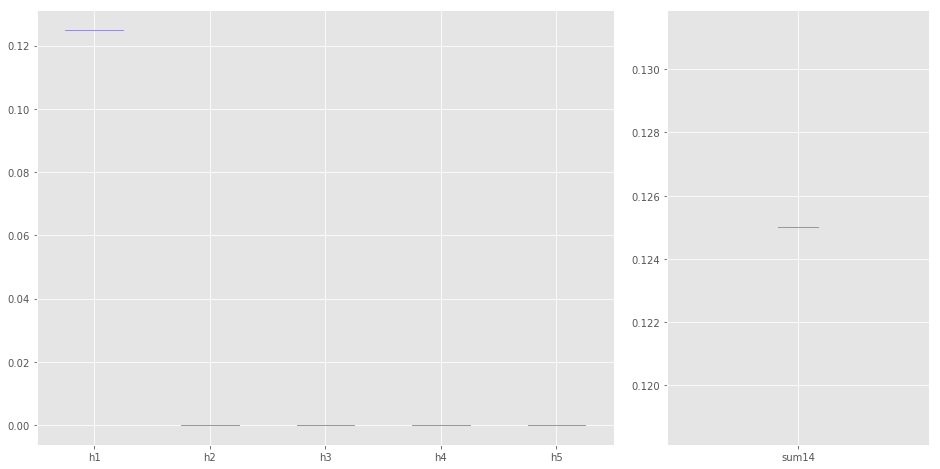

### Results for Team Vs. Offense

  Number of Data Points: 11


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.500000,0.333333,0.111111,0.000000,0.000000,1.111111
Median,0.555556,0.444444,0.222222,0.111111,0.000000,1.333333
75 Percentile,0.888889,0.722222,0.472222,0.155556,0.055556,2.333333


##### Box Plots

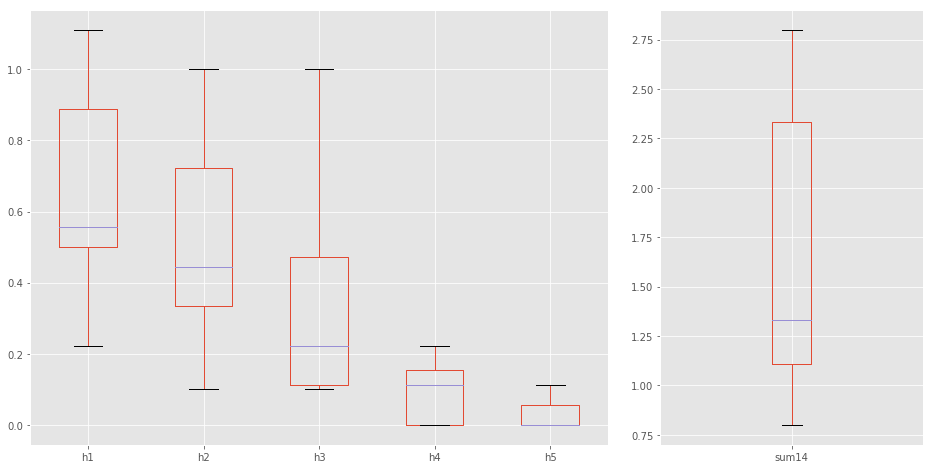

### Results for Team Vs. Scouts

  Number of Data Points: 39


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.488095,0.288690,0.111111,0.000000,0.000000,1.285714
Median,1.000000,0.595238,0.365079,0.000000,0.000000,1.791667
75 Percentile,1.389881,1.000000,0.500000,0.154762,0.105556,3.125000


##### Box Plots

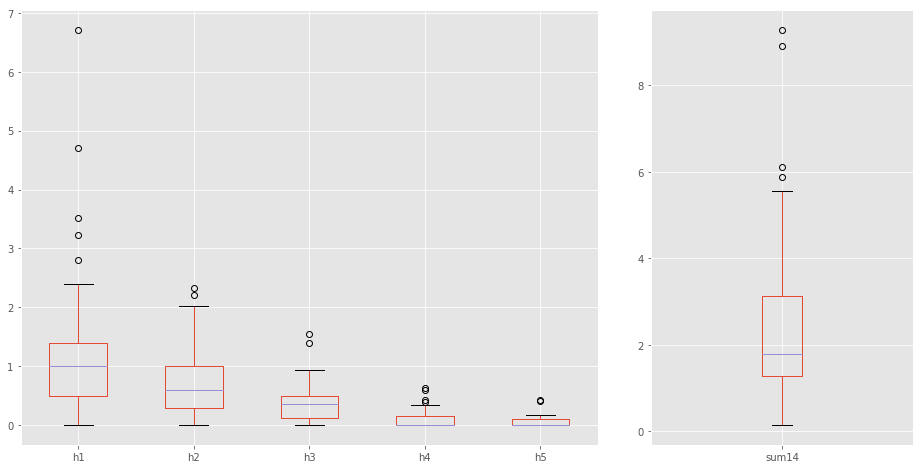

### Results for Team W/ 3S

  Number of Data Points: 12


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.075000,0.000000,0.000000,0.000,0.0,0.111111
Median,0.100000,0.100000,0.000000,0.000,0.0,0.216667
75 Percentile,0.130556,0.133333,0.111111,0.025,0.0,0.425000


##### Box Plots

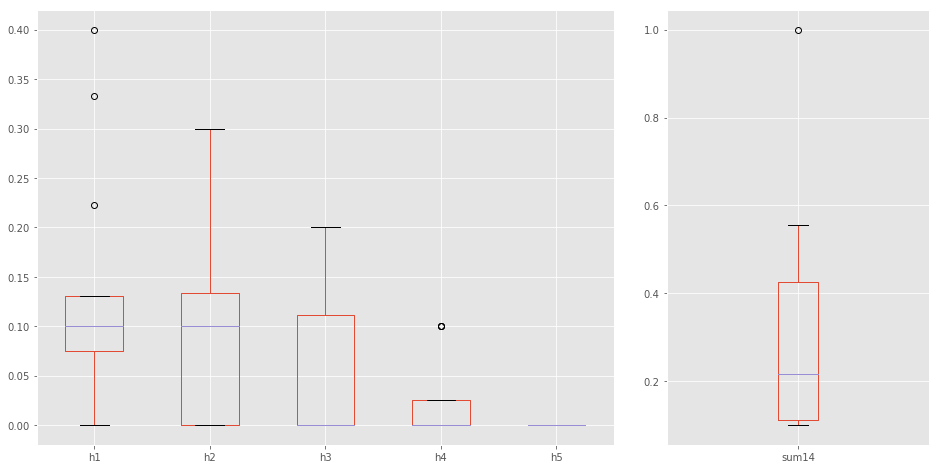

### Results for Tempo/Pap

  Number of Data Points: 1


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.0,0.0,0.0,0.125,0.0,0.125
Median,0.0,0.0,0.0,0.125,0.0,0.125
75 Percentile,0.0,0.0,0.0,0.125,0.0,0.125


##### Box Plots

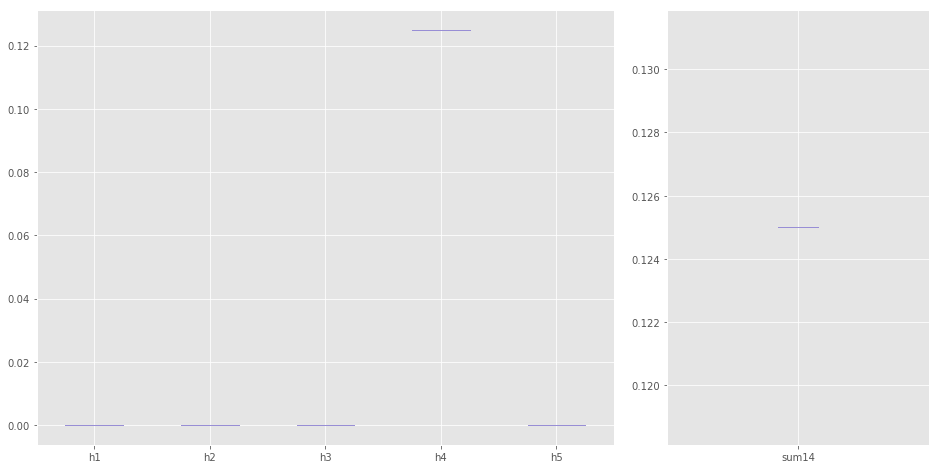

### Results for Vice Pursuit

  Number of Data Points: 2


##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum14
25 Percentile,0.041667,0.041667,0.041667,0.0,0.0,0.208333
Median,0.083333,0.083333,0.083333,0.0,0.0,0.250000
75 Percentile,0.125000,0.125000,0.125000,0.0,0.0,0.291667


##### Box Plots

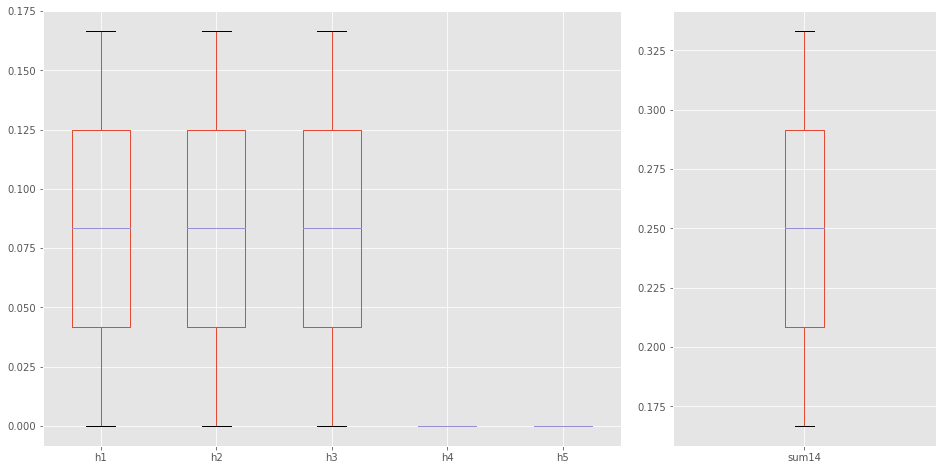

In [134]:
grps = (df_per_activity[df_per_activity.type != 'game']
          .groupby(['event', 'activity'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum14']]
          .sum()
          .groupby(['activity']))
for name, grp in grps:
    printmd('### Results for {}'.format(name.title()))
    #display(grp)
    print('  Number of Data Points: {}'.format(grp.shape[0]))
    # Give the median and interquartile ranges
    printmd('##### Interquartile and Median Values')
    dat = grp.quantile([0.25, 0.50, 0.75])
    dat.index = pd.Index(['25 Percentile', 'Median', '75 Percentile'])
    display(dat)
    printmd('##### Box Plots')
    fig = plt.figure(figsize=(16, 8))
    plt.subplot2grid((1,3), (0,0), colspan=2)
    grp[['h1', 'h2', 'h3', 'h4', 'h5']].boxplot()
    plt.subplot2grid((1,3), (0,2))
    grp[['sum14']].boxplot()
    plt.show()

### Question 5a: What is the exposure to hits before and after break across all positions?

Since this question is asking for data across all positions, we'll use the activity normalized data. Furthermore, the question is asking for the bins to be treated separately, as well as in specific grouping of bins, so we'll add those grouped bins to the data. In the results below, the rows are marked `False` and `True`. These answer the question "is the data from before the break/halftime?" So, `False` data is during the second half of practice/second half of the game and `True` is during the first half of practice/first half of the game.

In [135]:
df_per_activity['sum12'] = (df_per_activity.h1
                          + df_per_activity.h2)
df_per_activity['sum34'] = (df_per_activity.h3
                          + df_per_activity.h4)

(df_per_activity[df_per_activity.type != 'game']
     .groupby(['event', 'before_break'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum12', 'sum34', 'sum14']]
     .sum()
     .groupby(['before_break'])
     .aggregate(np.median))

,h1,h2,h3,h4,h5,sum12,sum34,sum14
before_break,,,,,,,,
False,2.805556,1.866667,0.988889,0.3,0.1,4.361111,1.178571,5.472222
True,2.466667,1.850000,0.535714,0.1,0.0,4.644444,0.666667,5.719841


### Results for After Break

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum12,sum34,sum14
25 Percentile,1.778175,1.333333,0.638889,0.125000,0.000000,3.061310,0.975397,4.653968
Median,2.805556,1.866667,0.988889,0.300000,0.100000,4.361111,1.178571,5.472222
75 Percentile,3.213889,2.194444,1.316667,0.466667,0.211111,5.822222,1.877778,7.341667


##### Box Plots

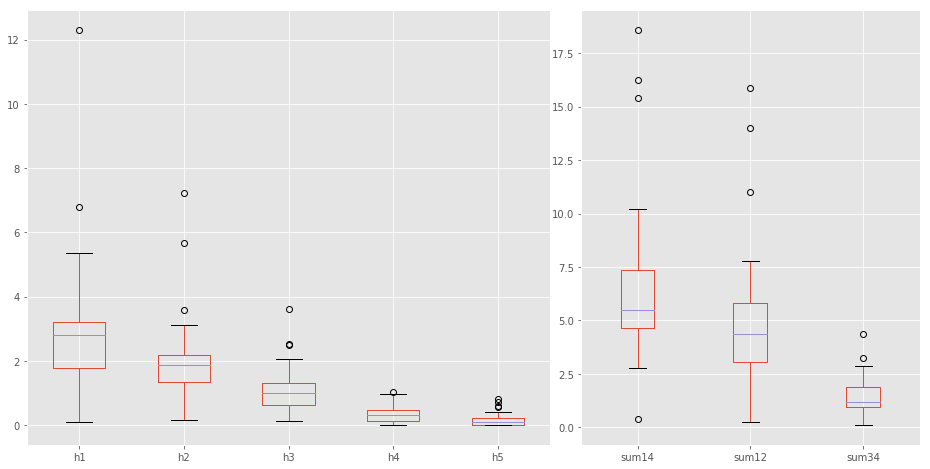

### Results for Before Break

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum12,sum34,sum14
25 Percentile,1.130952,0.788889,0.275000,0.000000,0.000000,2.013889,0.327778,2.316270
Median,2.466667,1.850000,0.535714,0.100000,0.000000,4.644444,0.666667,5.719841
75 Percentile,3.725000,2.491667,1.222222,0.333333,0.118056,6.325000,1.607540,7.529167


##### Box Plots

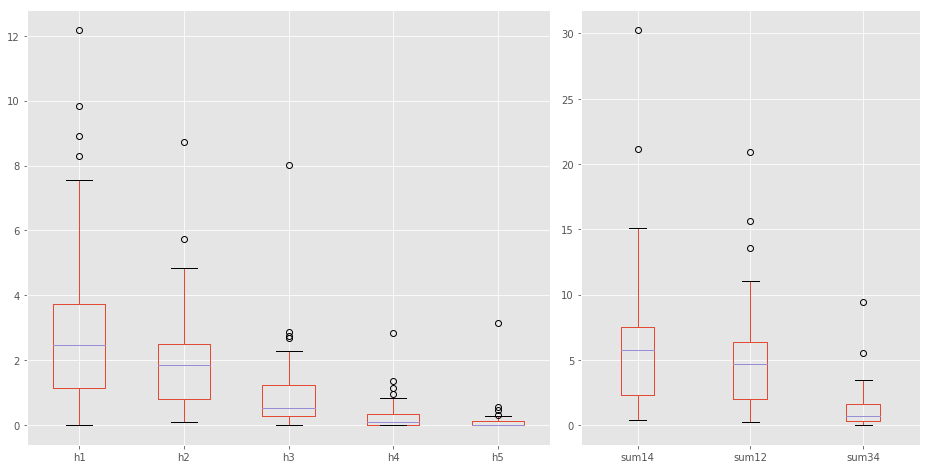

In [141]:
grps = (df_per_activity[df_per_activity.type != 'game']
     .groupby(['event', 'before_break'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum12', 'sum34', 'sum14']]
     .sum()
     .groupby(['before_break']))
for name, grp in grps:
    if name:
        name = 'Before Break'
    else:
        name = 'After Break'
    printmd('### Results for {}'.format(name.title()))
    # Give the median and interquartile ranges
    printmd('##### Interquartile and Median Values')
    dat = grp[['h1', 'h2', 'h3', 'h4', 'h5', 'sum12', 'sum34', 'sum14']].quantile([0.25, 0.50, 0.75])
    dat.index = pd.Index(['25 Percentile', 'Median', '75 Percentile'])
    display(dat)
    printmd('##### Box Plots')
    fig = plt.figure(figsize=(16, 8))
    plt.subplot2grid((1,5), (0,0), colspan=3)
    grp[['h1', 'h2', 'h3', 'h4', 'h5']].boxplot()
    plt.subplot2grid((1,5), (0,3), colspan=3)
    grp[['sum14', 'sum12', 'sum34']].boxplot()
    plt.show()

### Question 5b: What is the exposure to hits before and after halftime across all positions?

Same question as above, this time for game data. However, in this data set the hit data is that has been normalized both by the number of players playing at a given time (offense or defense) and the total length of time the offense or defense played during a given game, accordingly. For this data to be correct, I think that we ought to be normalizing by the total time the offense or defense played during the given half. Let me know what you think.

In [137]:
df_per_time['sum12'] = (df_per_time.h1
                      + df_per_time.h2)
df_per_time['sum34'] = (df_per_time.h3
                      + df_per_time.h4)

(df_per_time[df_per_time.type == 'game']
     .groupby(['event', 'before_break'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum12', 'sum34', 'sum14']]
     .sum()
     .groupby(['before_break'])
     .aggregate(np.median))

,h1,h2,h3,h4,h5,sum12,sum34,sum14
before_break,,,,,,,,
False,0.176409,0.151293,0.114925,0.034566,0.016425,0.323219,0.142314,0.479128
True,0.268242,0.192723,0.127461,0.049618,0.016182,0.444029,0.183138,0.637696


### Results for Second Half

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum12,sum34,sum14
25 Percentile,0.154164,0.141974,0.084856,0.020341,0.014176,0.291096,0.119083,0.443669
Median,0.176409,0.151293,0.114925,0.034566,0.016425,0.323219,0.142314,0.479128
75 Percentile,0.187300,0.171950,0.125506,0.037153,0.021509,0.369089,0.178700,0.505226


##### Box Plots

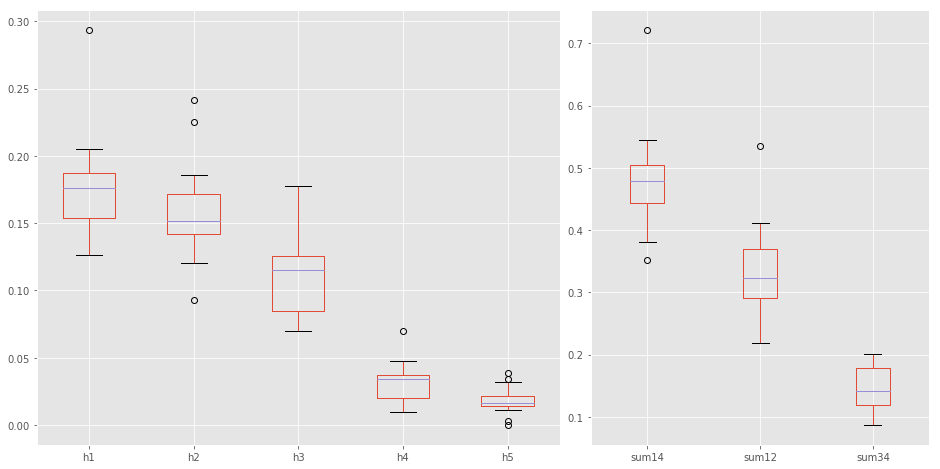

### Results for First Half

##### Interquartile and Median Values

,h1,h2,h3,h4,h5,sum12,sum34,sum14
25 Percentile,0.207052,0.173960,0.108719,0.035926,0.009781,0.362506,0.144816,0.558048
Median,0.268242,0.192723,0.127461,0.049618,0.016182,0.444029,0.183138,0.637696
75 Percentile,0.333695,0.253390,0.137173,0.062528,0.026076,0.604311,0.198589,0.752072


##### Box Plots

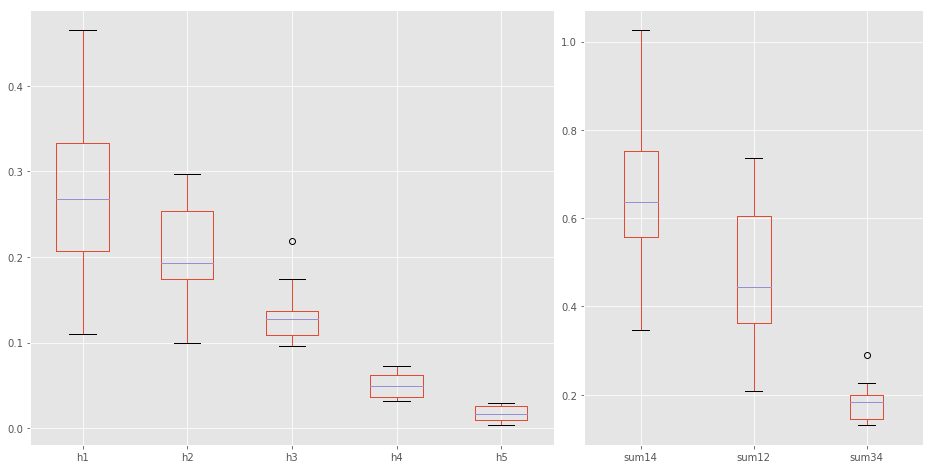

In [142]:
grps = (df_per_time[df_per_time.type == 'game']
     .groupby(['event', 'before_break'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5', 'sum12', 'sum34', 'sum14']]
     .sum()
     .groupby(['before_break']))
for name, grp in grps:
    if name:
        name = 'First Half'
    else:
        name = 'Second Half'
    printmd('### Results for {}'.format(name.title()))
    # Give the median and interquartile ranges
    printmd('##### Interquartile and Median Values')
    dat = grp[['h1', 'h2', 'h3', 'h4', 'h5', 'sum12', 'sum34', 'sum14']].quantile([0.25, 0.50, 0.75])
    dat.index = pd.Index(['25 Percentile', 'Median', '75 Percentile'])
    display(dat)
    printmd('##### Box Plots')
    fig = plt.figure(figsize=(16, 8))
    plt.subplot2grid((1,5), (0,0), colspan=3)
    grp[['h1', 'h2', 'h3', 'h4', 'h5']].boxplot()
    plt.subplot2grid((1,5), (0,3), colspan=3)
    grp[['sum14', 'sum12', 'sum34']].boxplot()
    plt.show()

## Statistical Tests

Here, we'll look at if there is a statistically significant difference between the the number of hits a player receives before and after the break in practice by hit strength. A similar test will be run for games using half time as the delimiter. Finally, we'll compare the hits received by practice type (Tuesday, Wednesday, etc) to determine if a player is at more statisically significant risk of receiving a hit of a given strength during any particular practice.


### Before and After Break in Practice

The first question to answer here is which data set to use. Thinking about it, it seems to me that we will sum the total number to hits before and after the break for each practice. Since there are a different number of people participating in each practice, we ought to normalize by the number of players at each practice - this assumes that each player actually participates in the full practice. Further, since the time before and after the break is (likely) different, we ought to normalize by time before and after the break. Since this can be done by fanagling the data available, I've gone ahead a gathered the data. If you think we ought to be using something different just let me know. 

### First and Second Half of Games

Again, we need to answer the question of what data to use to answer this question. I think that the answer is similar to the answer for practices, but not quite the same since we know that halves are the same length. I think that it is sufficient to normalize only by the number of players participating in a given game. However, to keep the units similar to those in practices, we can also normalize by time. In this case the time will be 30 minutes, which is the length of a half. 